# Bank Targeted Marketing
* John Paul Hernandez Alcala 
* Part Time
* 8/27/2020 
* Eli


## Libraries Used

In [331]:
import pandas as pd
import statistics 
import scipy.stats as stats
import seaborn as sns
from scipy.stats import pointbiserialr
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report
from sklearn.metrics import make_scorer, plot_confusion_matrix, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline
from imblearn.pipeline import make_pipeline as impipemaker
import time
#%matplotlib inline


## Data Science Lifecycle
Like with every project, we must first look to map for our data filled journey:
![DataScienceLifecycle](./Data_Science_Process.png)

We use the above Data Science Lifecyle to structure and organize this project. In this project we will follow this structure. We will see, at times, these steps will be revisited.
## Business Understanding
From above, we see at "01" that we must obtain ask ourselves relevant questions and define objectives:
### Questions
* "What is the main goal of the bank?"
    * **To have a model that accepts some false positive, but minimizes false negatives.**
* "Why did you pick those features as predictors?"
    * **These features will have p-values less than 0.05 and be associated with the clients who subscribed to a term deposit**
* "How confident are you in the predictive quality of the results?"
    * **Because we are only going to use features that have p-values less than 0.05, there is a 5% risk of concluding that these features influence subscribing clients when there is no actual influence.**
* "What are some of the things that could cause the results to be wrong?"
    * **Undetected collinearity, bias variance or inappropriate data exclusion.**

### Objectives
* Clean, explore, and model this dataset with multiple machine learning algorithms to predict who would be a subscribing client.
* Render at least 3 business recommendations that are supported.
* Demonstrate explored methods with benchmarks.
* Present 3 or more relevant visualizations. 
* Compare multiple models that were in and outside class material.
* Design a live demo that changes parameters and shows the output.
* Code following pep-8 standards, with docstrings/comments, and does not repeat itself; also uses cusotm classes methods for tasks.
* Conclusion is present and contains at least 3 recommendations that are business relevant.

## Data Mining
Moving on to "02", we must gather and scrape the data necessary for this project. We will only be using data from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). We import this data into a pandas DataFrame and display the first five entries to ensure correct importation:

### Importing Data

In [17]:
import pandas as pd

df = pd.read_csv('./bank-additional/bank-additional/bank-additional-full.csv', sep=';') # './' means find in home directory or where you saved all your project stuff
df.head() #dispays the first 5 entries

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Key for the Data

In [19]:
# This opens the text file so we can understand what the features mean
with open("./bank-additional/bank-additional/bank-additional-names.txt") as f:
    print(f.read())

ï»¿Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: SÃ©rgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   T

From above, we are able to see a key for all our variables. Here they are again more concisely:

1. age (numeric)
2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
4. education(categorical:"basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
5. default: has credit in default? (categorical: "no","yes","unknown")
6. housing: has housing loan? (categorical: "no","yes","unknown")
7. loan: has personal loan? (categorical: "no","yes","unknown")

_Related with the last contact of the current campaign:_
8. contact: contact communication type (categorical: "cellular","telephone") 
9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

_Other attributes:_
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

_Social and economic context attributes_
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)     
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

_Output variable (desired target):_
21. y - has the client subscribed a term deposit? (binary: "yes","no")


**IMPORTANT NOTE: Below we will split the data into a train and test set for model creation later on. This is to prevent data leakage and to truly make predictive models. Everything we do to the features in the train data, we will also do to the features in the test data.**

In [20]:
rand_state = 24

y = df.y.copy() # Makes copy of target variable to protect original dataframe
X = df.drop(columns='y', axis=1).copy() # Features
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.30, random_state=rand_state)
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.20, random_state=rand_state)

## Data Cleaning and Data Exploration
Next, we will merge "03" and '04'. '03' says we fix inconsistencies within our data and handle missing values. Inconsistencies mean for example the presence of duplicate values or extremely high/low numbers which are indications for absent data, unevenly distributed data, or just plain NaN values (i.e. also means absent data). '04' calls us to form a hypothesis about our defined problems with visualizations from our data. At the conclusion of this section, we will formulate a null and alternative hypothesis.  Here is a look at the data as a whole from the original dataframe:

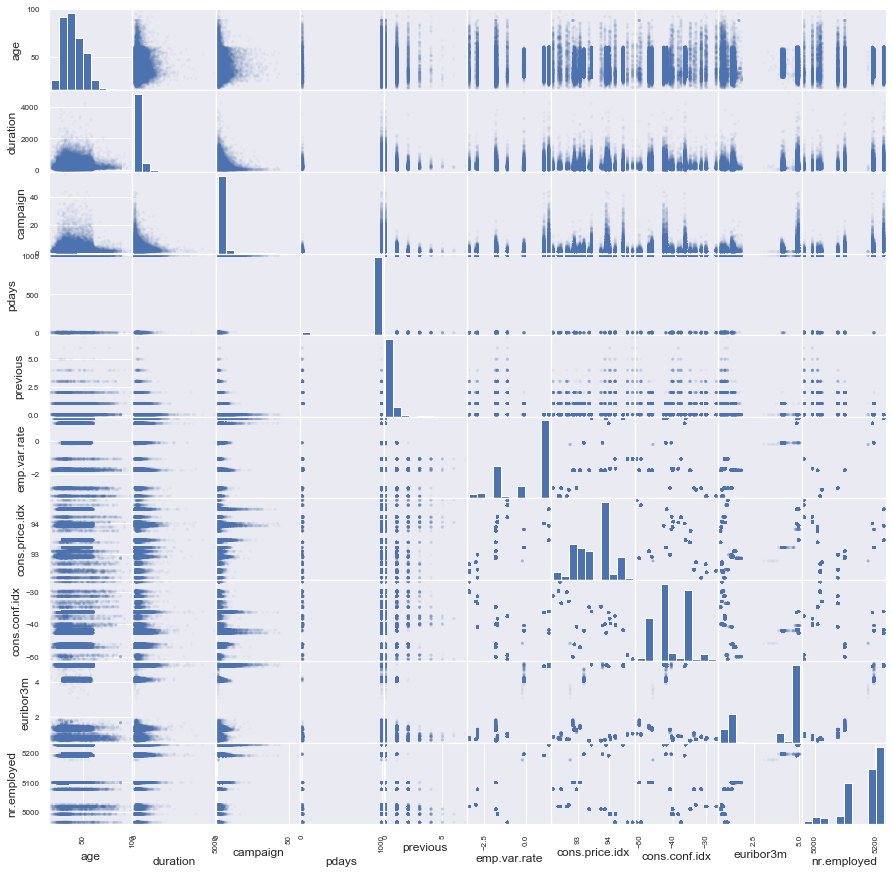

In [21]:
sns.set(context='notebook')
pd.plotting.scatter_matrix(df, alpha=0.05, figsize=[15,15]) #Let's look at the scatter plot of all the features
plt.show()

We will just focus on the X_train_70 for our data cleaning, but we will apply all changes to all train and test data.

In [22]:
X_train_70.info() # tells the number of columns and entries for each column with data type.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28831 entries, 35451 to 899
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28831 non-null  int64  
 1   job             28831 non-null  object 
 2   marital         28831 non-null  object 
 3   education       28831 non-null  object 
 4   default         28831 non-null  object 
 5   housing         28831 non-null  object 
 6   loan            28831 non-null  object 
 7   contact         28831 non-null  object 
 8   month           28831 non-null  object 
 9   day_of_week     28831 non-null  object 
 10  duration        28831 non-null  int64  
 11  campaign        28831 non-null  int64  
 12  pdays           28831 non-null  int64  
 13  previous        28831 non-null  int64  
 14  poutcome        28831 non-null  object 
 15  emp.var.rate    28831 non-null  float64
 16  cons.price.idx  28831 non-null  float64
 17  cons.conf.idx   28831 non-nul

### Continuous Data: Finding the 'weird' columns
From above, we see that all columns have 28831 non-null entires. All our other train and test data will also have no non-null values/objects. Let's look at the stats for each column as well:

NOTE: only works for integer valued features and not categorical features.

In [23]:
X_train_70.describe() # helps us see how skewed the data is by comparing the column's mean to the column's 50% quartile.

age      duration      campaign         pdays      previous  \
count  28831.000000  28831.000000  28831.000000  28831.000000  28831.000000   
mean      40.007110    257.374111      2.572578    961.806770      0.172731   
std       10.426822    257.208633      2.781547    188.539509      0.492673   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    178.000000      2.000000    999.000000      0.000000   
75%       47.000000    318.000000      3.000000    999.000000      0.000000   
max       98.000000   3785.000000     56.000000    999.000000      6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  28831.000000    28831.000000   28831.000000  28831.000000  28831.000000  
mean       0.083736       93.577485     -40.508619      3.623916   5167.110503  
std        1.567752        0.576804       4.603943      1.731858     72.184629  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

From the above, we see that there are extreme values, high STDs, means not close to 50%, and container numbers such as '999'. Let us look at 'age' first, then we will look at the others. 'age' has a high std and extreme max value of 98. Let's take a closer look at it.

#### The 'age' Column

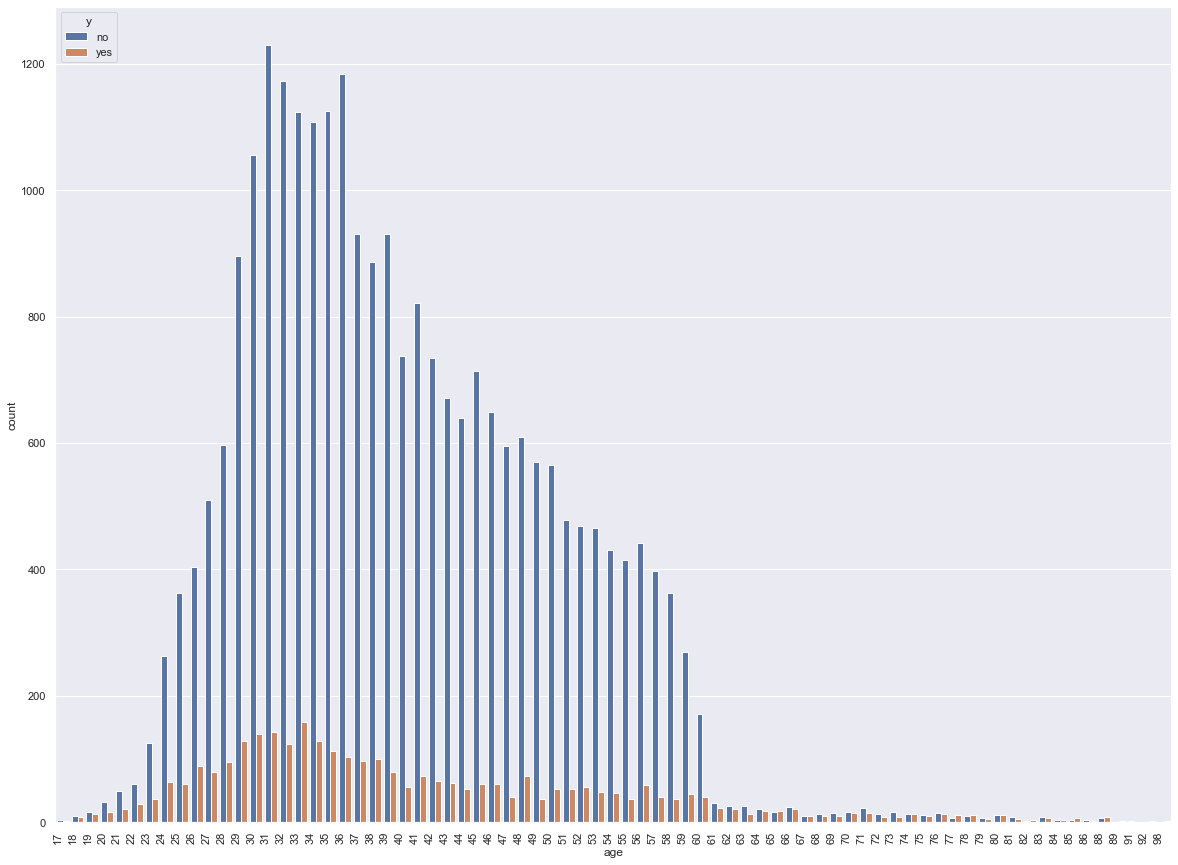

In [24]:
# This graph gives us a little glimps in how 'age' correlates with or target variable, 'y'.
plt.figure(figsize=(20,15))
chart = sns.countplot(x=X_train_70.age, hue=y_train_70, orient="h")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

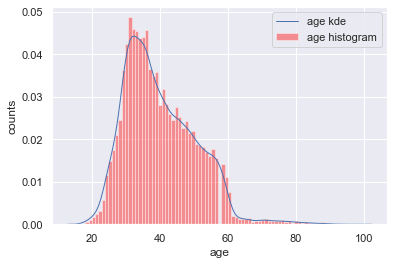

In [25]:
plt.xlabel('age')
plt.ylabel('counts')
col = 'age'
#This shows the distribution of the points
sns.distplot(X_train_70.age, bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

Let us identify the outliers with the Interquartile Method to get as close as possible to a even distribution before imputation and transformation.

In [26]:
def outlier_detection(datacolumn):
    '''
    Input ordered or unordered list of values. These values will be sorted, then quartile 1, 3 and IQR range will be determined.
    Returns lower_bound, and upper_bound of IQR.
    '''
    sorted(datacolumn)
    Q1, Q3 = np.percentile(datacolumn, [25, 75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range, upper_range, IQR

In [27]:
outlier_detection(X_train_70.age) # Lower bound, upper bound, IQR

(9.5, 69.5, 15.0)

In [28]:
outlier_detection(X_test_30.age)

(9.5, 69.5, 15.0)

In [29]:
outlier_detection(X_train_80.age)

(9.5, 69.5, 15.0)

In [30]:
outlier_detection(X_test_20.age)

(9.5, 69.5, 15.0)

NOTE: the lower, upper and IQR are all the same for the test and train data.

In [31]:
lower_bound, upper_bound, iqr = outlier_detection(X_train_70.age) # Detects the outliers
X_train_70.age[(X_train_70.age >= lower_bound) & (X_train_70.age <= upper_bound)].describe() # filters out the outliers

count    28498.000000
mean        39.575865
std          9.670598
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         69.000000
Name: age, dtype: float64

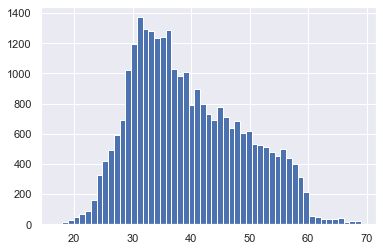

In [32]:
pd.plotting.hist_series(X_train_70.age[(X_train_70.age >= lower_bound) & (X_train_70.age <= upper_bound)], bins='auto')
plt.show()

NOTE: here we may question if we should impute then transform, or transform then impute. In this case, it did not matter because even after getting rid of the outliers, the median still landed on 38 or log(38); so, we will impute then transform.

In [33]:
X_train_70.where((X_train_70.age >= lower_bound) & (X_train_70.age <= upper_bound)
                          , level='age', other=38).age.describe()

count    28831.000000
mean        39.557664
std          9.616060
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         69.000000
Name: age, dtype: float64

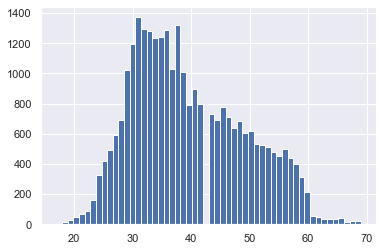

In [34]:
pd.plotting.hist_series(X_train_70.where((X_train_70.age >= lower_bound) & (X_train_70.age <= upper_bound)
                          , level='age', other=38).age, bins='auto')
plt.show()

From above, we can see our data is right skewed, but its mean does not deviate far from 50%. The STD is high, but that can be fixed with transformation. According to (Boston College)[https://fmwww.bc.edu/repec/bocode/t/transint.html], right skews are fixed with log, square root, or reciprocal transformations. We try different methods and see which renders the best two normal distribution.

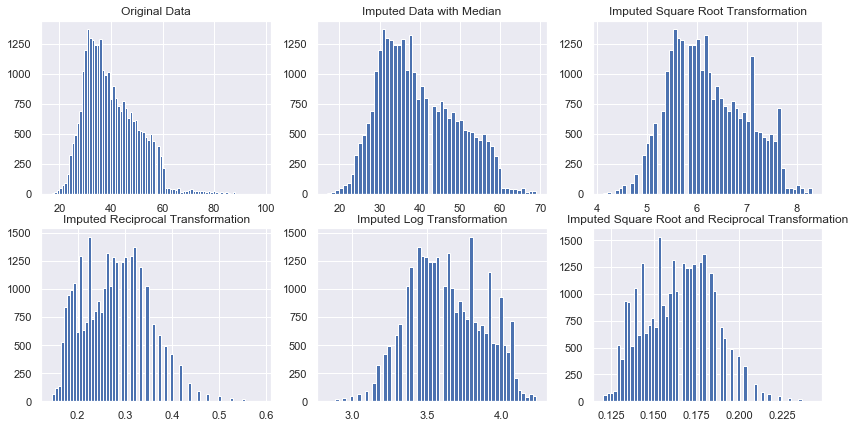

In [35]:
plt.figure(figsize=(14,7))

plt.subplot(231)
ax = pd.plotting.hist_series(X_train_70.age, bins='auto')
ax.set_title('Original Data')

plt.subplot(232)
ax1 = pd.plotting.hist_series(X_train_70.where((X_train_70.age >= lower_bound) & (X_train_70.age <= upper_bound)
                          , level='age', other=38).age, bins='auto')
ax1.set_title('Imputed Data with Median')

plt.subplot(233)
ax2 = pd.plotting.hist_series(np.sqrt(X_train_70.where((X_train_70.age >= lower_bound) & (X_train_70.age <= upper_bound)
                          , level='age', other=38).age), bins='auto')
ax2. set_title('Imputed Square Root Transformation')

plt.subplot(234)
ax3 = pd.plotting.hist_series(X_train_70.where((X_train_70.age >= lower_bound) & (X_train_70.age <= upper_bound)
                          , level='age', other=38).age.apply(lambda x: 10/x), bins='auto')
ax3.set_title('Imputed Reciprocal Transformation')

plt.subplot(235)
ax4 = pd.plotting.hist_series(np.log(X_train_70.where((X_train_70.age >= lower_bound) & (X_train_70.age <= upper_bound)
                          , level='age', other=38).age), bins='auto')
ax4.set_title('Imputed Log Transformation')

plt.subplot(236)
ax5 = pd.plotting.hist_series(np.reciprocal(np.sqrt(X_train_70.where((X_train_70.age >= lower_bound) & (X_train_70.age <= upper_bound)
                          , level='age', other=38).age)), bins='auto')
ax5.set_title('Imputed Square Root and Reciprocal Transformation')

plt.show()

We can check the skewness with Scipy. The one with the value closest to 0 means the one more close to being normally distributed.

In [36]:
# Original data
stats.skew(X_train_70.age)

0.7938648731593336

In [37]:
# Skewness of Imputed Data with Median
stats.skew(X_train_70.where((X_train_70.age >= lower_bound) & (X_train_70.age <= upper_bound)
                          , level='age', other=38).age)

0.45222846782874976

In [38]:
# Skewness of Imputed Square Root Transformation
stats.skew(np.sqrt(X_train_70.where((X_train_70.age >= lower_bound) & (X_train_70.age <= upper_bound)
                          , level='age', other=38).age))

0.22757647022801167

In [39]:
# Skewness of Imputed Reciprocal Transformation
stats.skew(X_train_70.where((X_train_70.age >= lower_bound) & (X_train_70.age <= upper_bound)
                          , level='age', other=38).age.apply(lambda x: 10/x))

0.5667997560633048

In [40]:
# Skewnewss of Imputed Log Transformation
stats.skew(np.log(X_train_70.where((X_train_70.age >= lower_bound) & (X_train_70.age <= upper_bound)
                          , level='age', other=38).age))

-0.01216069254995871

In [41]:
# Skewness of Imputed Square Root and Reciprocal Transformation
stats.skew(np.reciprocal(np.sqrt(X_train_70.where((X_train_70.age >= lower_bound) & (X_train_70.age <= upper_bound)
                          , level='age', other=38).age)))

0.2740064243308138

From above we can see that the best transformation appears to be the log transformation. We can see below how well the data is distributed with the second most evenly distributed transformation, square root transformation transformation.

In [42]:
print('Log Transformation\n', np.log(X_train_70.where((X_train_70.age >= lower_bound) & (X_train_70.age <= upper_bound)
                          , level='age', other=38).age).describe()) 
print('\nSquare Root Transformation \n', np.sqrt(X_train_70.where((X_train_70.age >= lower_bound) & (X_train_70.age <= upper_bound)
                          , level='age', other=38).age).describe())

Log Transformation
 count    28831.000000
mean         3.648424
std          0.242732
min          2.833213
25%          3.465736
50%          3.637586
75%          3.850148
max          4.234107
Name: age, dtype: float64

Square Root Transformation 
 count    28831.000000
mean         6.243664
std          0.757856
min          4.123106
25%          5.656854
50%          6.164414
75%          6.855655
max          8.306624
Name: age, dtype: float64


In [43]:
X_train_70.describe()

age      duration      campaign         pdays      previous  \
count  28831.000000  28831.000000  28831.000000  28831.000000  28831.000000   
mean      40.007110    257.374111      2.572578    961.806770      0.172731   
std       10.426822    257.208633      2.781547    188.539509      0.492673   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    178.000000      2.000000    999.000000      0.000000   
75%       47.000000    318.000000      3.000000    999.000000      0.000000   
max       98.000000   3785.000000     56.000000    999.000000      6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  28831.000000    28831.000000   28831.000000  28831.000000  28831.000000  
mean       0.083736       93.577485     -40.508619      3.623916   5167.110503  
std        1.567752        0.576804       4.603943      1.731858     72.184629  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [44]:
#Here we make an imputation version of all our data
X_train_70_imp = X_train_70.copy()
X_train_70_imp.loc[(X_train_70.age < lower_bound) | (X_train_70.age > upper_bound), 'age'] = 38

X_test_30_imp = X_test_30.copy()
X_test_30_imp.loc[(X_test_30.age < lower_bound) | (X_test_30.age > upper_bound), 'age'] = 38

X_train_80_imp = X_train_80.copy()
X_train_80_imp.loc[(X_train_80.age < lower_bound) | (X_train_80.age > upper_bound), 'age'] = 38

X_test_20_imp = X_test_20.copy()
X_test_20_imp.loc[(X_test_20.age < lower_bound) | (X_test_20.age > upper_bound), 'age'] = 38

# Below we implement the transformations on all the train and test data
X_train_70_log = X_train_70_imp.copy()
X_train_70_log.age = np.log(X_train_70_log.age)

X_train_70_Sqrt = X_train_70_imp.copy()
X_train_70_Sqrt.age = np.sqrt(X_train_70_Sqrt.age)

X_test_30_log = X_test_30_imp.copy()
X_test_30_log.age = np.log(X_test_30_log.age)

X_test_30_Sqrt = X_test_30_imp.copy()
X_test_30_Sqrt.age = np.sqrt(X_test_30_Sqrt.age)



X_train_80_log = X_train_80_imp.copy()
X_train_80_log.age = np.log(X_train_80_log.age)

X_train_80_Sqrt = X_train_80_imp.copy()
X_train_80_Sqrt.age = np.sqrt(X_train_80_Sqrt.age)

X_test_20_log = X_test_20_imp.copy()
X_test_20_log.age = np.log(X_test_20_log.age)

X_test_20_Sqrt = X_test_20_imp.copy()
X_test_20_Sqrt.age = np.sqrt(X_test_20_Sqrt.age)



In [45]:
X_train_70.describe() #This is the original data description

age      duration      campaign         pdays      previous  \
count  28831.000000  28831.000000  28831.000000  28831.000000  28831.000000   
mean      40.007110    257.374111      2.572578    961.806770      0.172731   
std       10.426822    257.208633      2.781547    188.539509      0.492673   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    178.000000      2.000000    999.000000      0.000000   
75%       47.000000    318.000000      3.000000    999.000000      0.000000   
max       98.000000   3785.000000     56.000000    999.000000      6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  28831.000000    28831.000000   28831.000000  28831.000000  28831.000000  
mean       0.083736       93.577485     -40.508619      3.623916   5167.110503  
std        1.567752        0.576804       4.603943      1.731858     72.184629  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [46]:
X_train_70_imp.describe() #This is the imputed data description  NOTE: only column 'age' should be changed.

age      duration      campaign         pdays      previous  \
count  28831.000000  28831.000000  28831.000000  28831.000000  28831.000000   
mean      39.557664    257.374111      2.572578    961.806770      0.172731   
std        9.616060    257.208633      2.781547    188.539509      0.492673   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    178.000000      2.000000    999.000000      0.000000   
75%       47.000000    318.000000      3.000000    999.000000      0.000000   
max       69.000000   3785.000000     56.000000    999.000000      6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  28831.000000    28831.000000   28831.000000  28831.000000  28831.000000  
mean       0.083736       93.577485     -40.508619      3.623916   5167.110503  
std        1.567752        0.576804       4.603943      1.731858     72.184629  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [47]:
X_train_70_log.describe()

age      duration      campaign         pdays      previous  \
count  28831.000000  28831.000000  28831.000000  28831.000000  28831.000000   
mean       3.648424    257.374111      2.572578    961.806770      0.172731   
std        0.242732    257.208633      2.781547    188.539509      0.492673   
min        2.833213      0.000000      1.000000      0.000000      0.000000   
25%        3.465736    102.000000      1.000000    999.000000      0.000000   
50%        3.637586    178.000000      2.000000    999.000000      0.000000   
75%        3.850148    318.000000      3.000000    999.000000      0.000000   
max        4.234107   3785.000000     56.000000    999.000000      6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  28831.000000    28831.000000   28831.000000  28831.000000  28831.000000  
mean       0.083736       93.577485     -40.508619      3.623916   5167.110503  
std        1.567752        0.576804       4.603943      1.731858     72.184629  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

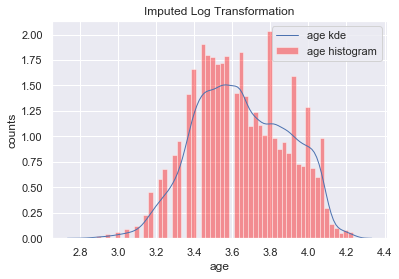

In [48]:
plt.xlabel('age')
plt.ylabel('counts')
plt.title('Imputed Log Transformation')
col = 'age'
#This shows the distribution of the points
sns.distplot(X_train_70_log.age, bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

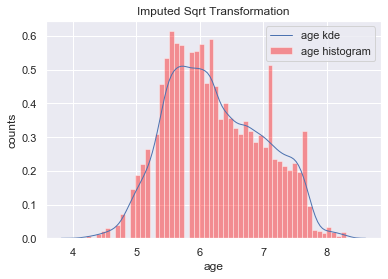

In [49]:
plt.xlabel('age')
plt.ylabel('counts')
plt.title('Imputed Sqrt Transformation')
col = 'age'
#This shows the distribution of the points
sns.distplot(X_train_70_Sqrt.age, bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

In [50]:
df.y.value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

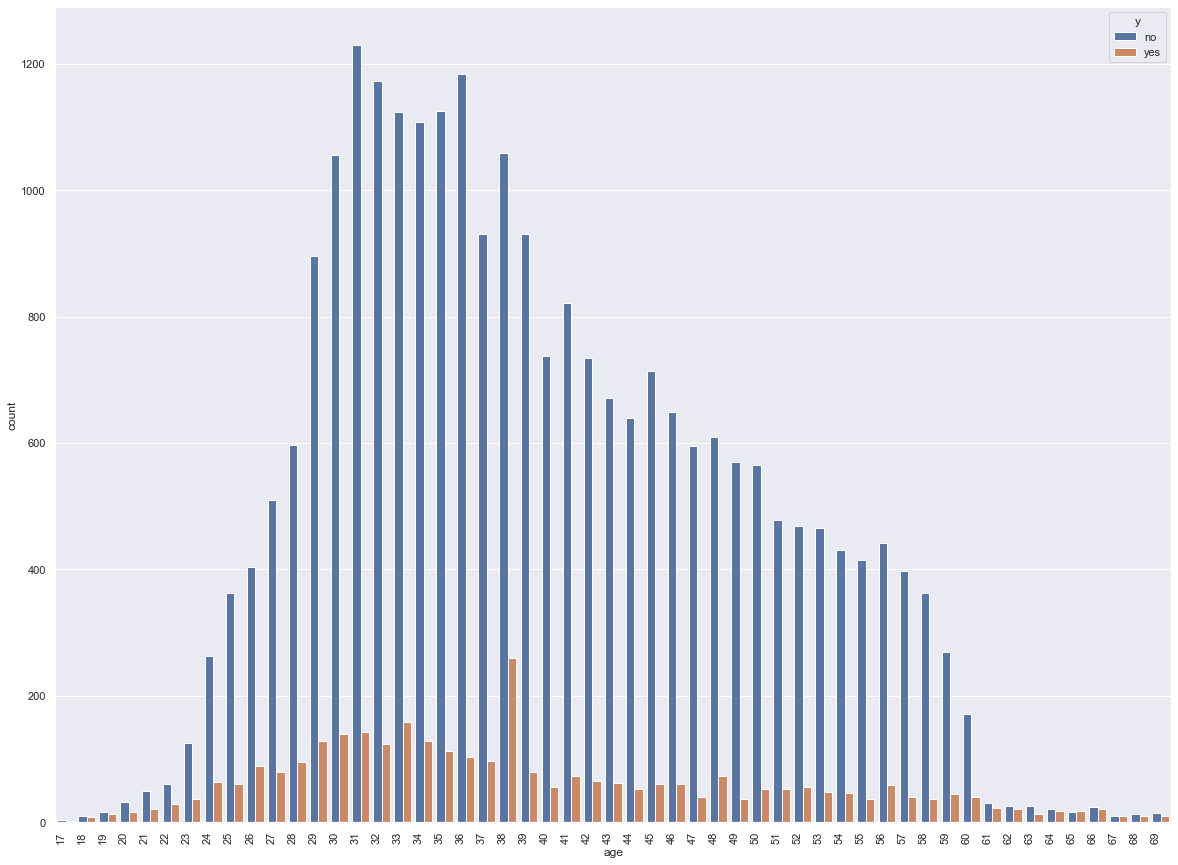

In [51]:
# This graph gives us a little glimps in how 'age' correlates with or target variable, 'y'.
plt.figure(figsize=(20,15))
chart = sns.countplot(x=X_train_70_imp.age, hue=y_train_70, orient="h")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

#### The 'duration' Column
Now that we have transformed 'age', let's us move on to discuss 'duration'.

According to the data source who we will consider to be our business advisor, 'duration' is not known before a call to a client is performed. Also, after the end of the call 'y' is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. As such we will drop this column completely from our data.

In [52]:
# # drop from original untransformed data
# X_train_70.drop(columns='duration', axis=1, inplace=True)
# X_test_30.drop(columns='duration', axis=1, inplace=True)

# X_train_80.drop(columns='duration', axis=1, inplace=True)
# X_test_20.drop(columns='duration', axis=1, inplace=True)

# drop from imputation untransformed data
X_train_70_imp.drop(columns='duration', axis=1, inplace=True)
X_test_30_imp.drop(columns='duration', axis=1, inplace=True)

X_train_80_imp.drop(columns='duration', axis=1, inplace=True)
X_test_20_imp.drop(columns='duration', axis=1, inplace=True)


# drop from log transformed data
X_train_70_log.drop(columns='duration', axis=1, inplace=True)
X_test_30_log.drop(columns='duration', axis=1, inplace=True)

X_train_80_log.drop(columns='duration', axis=1, inplace=True)
X_test_20_log.drop(columns='duration', axis=1, inplace=True)

# drop from sqrt transformed data
X_train_70_Sqrt.drop(columns='duration', axis=1, inplace=True)
X_test_30_Sqrt.drop(columns='duration', axis=1, inplace=True)

X_train_80_Sqrt.drop(columns='duration', axis=1, inplace=True)
X_test_20_Sqrt.drop(columns='duration', axis=1, inplace=True)

In [53]:
X_train_70_Sqrt.head() # Check one to make sure column dropped.

age          job  marital          education  default housing  \
35451  5.567764       admin.  married  university.degree       no      no   
11069  6.480741  blue-collar  married            unknown  unknown      no   
21233  5.916080       admin.   single  university.degree       no      no   
33258  6.480741  blue-collar  married           basic.4y       no      no   
6529   6.480741       admin.   single  university.degree  unknown     yes   

      loan    contact month day_of_week  campaign  pdays  previous  \
35451   no   cellular   may         mon         4    999         0   
11069   no  telephone   jun         wed         3    999         0   
21233   no   cellular   aug         mon         1    999         0   
33258   no  telephone   may         tue         1    999         0   
6529   yes  telephone   may         wed         3    999         0   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
35451  nonexistent          -1.8          92.893          -46.2      1.244   
11069  nonexistent           1.4          94.465          -41.8      4.962   
21233  nonexistent           1.4          93.444          -36.1      4.963   
33258  nonexistent          -1.8          92.893          -46.2      1.291   
6529   nonexistent           1.1          93.994          -36.4      4.857   

       nr.employed  
35451       5099.1  
11069       5228.1  
21233       5228.1  
33258       5099.1  
6529        5191.0

#### The 'campaign' Column
Moving right along to campaign.

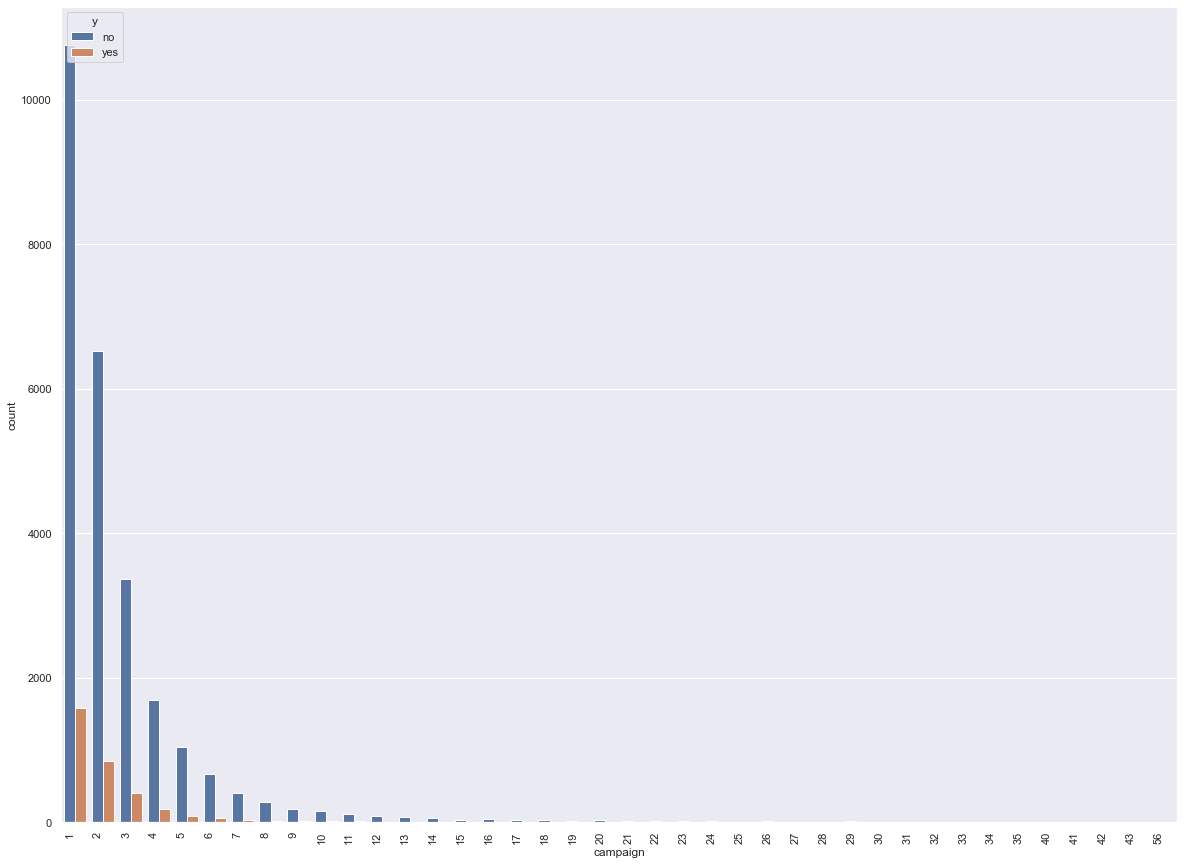

In [54]:
# This graph gives us a little glimps in how 'campaign' correlates with or target variable, 'y'.
plt.figure(figsize=(20,15))
chart = sns.countplot(x=X_train_70.campaign, hue=y_train_70, orient="h")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

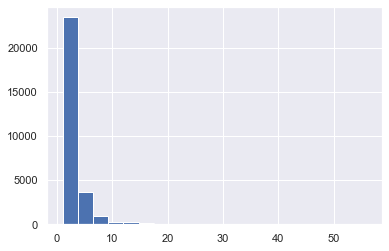

In [55]:
pd.plotting.hist_series(X_train_70.campaign, bins=20) # This shows the distribution of the points 
plt.show()

In [56]:
X_train_70.campaign.value_counts(normalize=True, sort=True, bins=20) #This gives us a closer look at the numeric distribution

(0.944, 3.75]    0.813465
(3.75, 6.5]      0.128508
(6.5, 9.25]      0.031563
(9.25, 12.0]     0.012695
(12.0, 14.75]    0.004232
(14.75, 17.5]    0.003399
(17.5, 20.25]    0.002393
(20.25, 23.0]    0.001110
(25.75, 28.5]    0.000728
(28.5, 31.25]    0.000659
(23.0, 25.75]    0.000590
(31.25, 34.0]    0.000312
(39.5, 42.25]    0.000139
(34.0, 36.75]    0.000104
(42.25, 45.0]    0.000069
(53.25, 56.0]    0.000035
(50.5, 53.25]    0.000000
(36.75, 39.5]    0.000000
(45.0, 47.75]    0.000000
(47.75, 50.5]    0.000000
Name: campaign, dtype: float64

In [57]:
X_train_70.campaign.describe()

count    28831.000000
mean         2.572578
std          2.781547
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

From the above histogram plot, the distribution is not normaly distributed.

Let us again see if we can identify the outliers using Interquartile method.

In [58]:
outlier_detection(X_train_70.campaign) # Lower bound, upper bound, IQR

(-2.0, 6.0, 2.0)

In [59]:
outlier_detection(X_test_30.campaign)

(-2.0, 6.0, 2.0)

In [60]:
outlier_detection(X_train_80.campaign)

(-2.0, 6.0, 2.0)

In [61]:
outlier_detection(X_test_20.campaign)

(-2.0, 6.0, 2.0)

In [62]:
lower_bound, upper_bound, iqr = outlier_detection(X_train_70.campaign) # Detects the outliers
X_train_70.campaign[(X_train_70.campaign >= lower_bound) & (X_train_70.campaign <= upper_bound)].value_counts() # filters out the outliers

1    12328
2     7363
3     3762
4     1872
5     1118
6      715
Name: campaign, dtype: int64

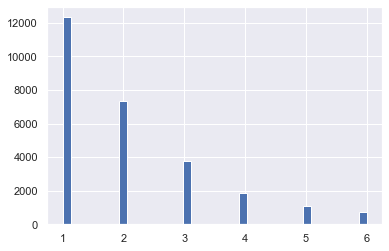

In [63]:
# Plotting the filtered out data
pd.plotting.hist_series(X_train_70.campaign[(X_train_70.campaign >= lower_bound) & (X_train_70.campaign <= upper_bound)], bins='auto')
plt.show()

In [64]:
X_train_70.campaign[(X_train_70.campaign >= lower_bound) & (X_train_70.campaign <= upper_bound)].describe()

count    27158.000000
mean         2.051256
std          1.287381
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: campaign, dtype: float64

From the above histogram, we can see that most of our data is between 1-6. So, we will replace all the outliers with the median value at 50% which is 2. Before we do this, let us take a quick look at how 'campaign' relates to 'y'.

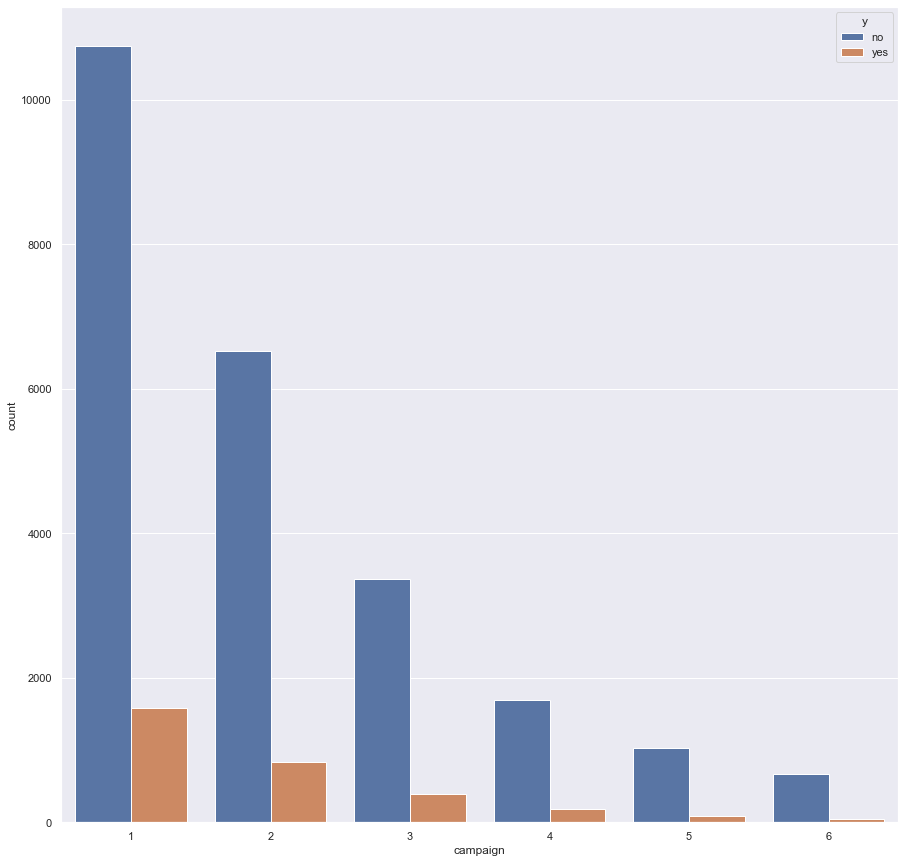

In [65]:
# This graph gives us a little glimps in how 'campaign' correlates with or target variable, 'y'.
plt.figure(figsize=(15,15))
sns.countplot(x=X_train_70.campaign[(X_train_70.campaign >= lower_bound) & (X_train_70.campaign <= upper_bound)]
              , hue=y_train_70[(X_train_70.campaign >= lower_bound) & (X_train_70.campaign <= upper_bound)])
plt.show()

It appears that the proportion of yes/no is changing as we have more calls.

In [66]:
# Here we see the data with outliers excluded.
X_train_70.campaign[(X_train_70.campaign >= lower_bound) & (X_train_70.campaign <= upper_bound)].value_counts()

1    12328
2     7363
3     3762
4     1872
5     1118
6      715
Name: campaign, dtype: int64

In [67]:
# Here we have included the outliers with a median of 2.
X_train_70.where((X_train_70.campaign >= lower_bound) & (X_train_70.campaign <= upper_bound)
                          , level='campaign', other=2).campaign.value_counts()

1    12328
2     9036
3     3762
4     1872
5     1118
6      715
Name: campaign, dtype: int64

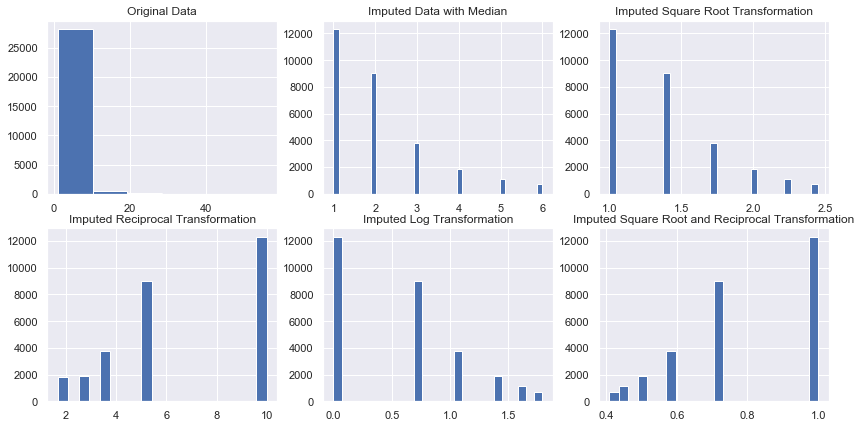

In [68]:
plt.figure(figsize=(14,7))

plt.subplot(231)
ax = pd.plotting.hist_series(X_train_70.campaign, bins=6)
ax.set_title('Original Data')

plt.subplot(232)
ax1 = pd.plotting.hist_series(X_train_70.where((X_train_70.campaign >= lower_bound) & (X_train_70.campaign <= upper_bound)
                          , level='campaign', other=2).campaign, bins='auto')
ax1.set_title('Imputed Data with Median')

plt.subplot(233)
ax2 = pd.plotting.hist_series(np.sqrt(X_train_70.where((X_train_70.campaign >= lower_bound) & (X_train_70.campaign <= upper_bound)
                          , level='campaign', other=2).campaign), bins='auto')
ax2. set_title('Imputed Square Root Transformation')

plt.subplot(234)
ax3 = pd.plotting.hist_series(X_train_70.where((X_train_70.campaign >= lower_bound) & (X_train_70.campaign <= upper_bound)
                          , level='campaign', other=2).campaign.apply(lambda x: 10/x), bins='auto')
ax3.set_title('Imputed Reciprocal Transformation')

plt.subplot(235)
ax4 = pd.plotting.hist_series(np.log(X_train_70.where((X_train_70.campaign >= lower_bound) & (X_train_70.campaign <= upper_bound)
                          , level='campaign', other=2).campaign), bins='auto')
ax4.set_title('Imputed Log Transformation')

plt.subplot(236)
ax5 = pd.plotting.hist_series(np.reciprocal(np.sqrt(X_train_70.where((X_train_70.campaign >= lower_bound) & (X_train_70.campaign <= upper_bound)
                          , level='campaign', other=2).campaign)), bins='auto')
ax5.set_title('Imputed Square Root and Reciprocal Transformation')

plt.show()

In [69]:
# Original Data
stats.skew(X_train_70.campaign)

4.856418882196977

In [70]:
# Imputed Data
stats.skew(X_train_70.where((X_train_70.campaign >= lower_bound) & (X_train_70.campaign <= upper_bound)
                          , level='campaign', other=2).campaign)

1.3482911656238699

In [71]:
# Square Root Transformation
stats.skew(np.sqrt(X_train_70.where((X_train_70.campaign >= lower_bound) & (X_train_70.campaign <= upper_bound)
                          , level='campaign', other=2).campaign))

0.8624146246683578

In [72]:
# Reciprocal Transformation
stats.skew(X_train_70.where((X_train_70.campaign >= lower_bound) & (X_train_70.campaign <= upper_bound)
                          , level='campaign', other=2).campaign.apply(lambda x: 10/x))

0.030977212389606608

In [73]:
# Log Transformation
stats.skew(np.log(X_train_70.where((X_train_70.campaign >= lower_bound) & (X_train_70.campaign <= upper_bound)
                          , level='campaign', other=2).campaign))

0.4584260131441657

In [74]:
# Square Root and Reciprocal Transformation
stats.skew(np.reciprocal(np.sqrt(X_train_70.where((X_train_70.campaign >= lower_bound) & (X_train_70.campaign <= upper_bound)
                          , level='campaign', other=2).campaign)))

-0.16276940267172993

In [75]:
print('Log Transformation\n', np.log(X_train_70.where((X_train_70.campaign >= lower_bound) & (X_train_70.campaign <= upper_bound)
                          , level='campaign', other=2).campaign).describe()) 
print('\nSquare Root Transformation \n', np.sqrt(X_train_70.where((X_train_70.campaign >= lower_bound) & (X_train_70.campaign <= upper_bound)
                          , level='campaign', other=2).campaign).describe())

Log Transformation
 count    28831.000000
mean         0.557451
std          0.549703
min          0.000000
25%          0.000000
50%          0.693147
75%          1.098612
max          1.791759
Name: campaign, dtype: float64

Square Root Transformation 
 count    28831.000000
mean         1.374150
std          0.399998
min          1.000000
25%          1.000000
50%          1.414214
75%          1.732051
max          2.449490
Name: campaign, dtype: float64


In [76]:
#Here we make our imputation permanent on all the data
X_train_70_imp.loc[(X_train_70.campaign < lower_bound) | (X_train_70.campaign > upper_bound), 'campaign'] = 2

X_test_30_imp.loc[(X_test_30.campaign < lower_bound) | (X_test_30.campaign > upper_bound), 'campaign'] = 2

X_train_80_imp.loc[(X_train_80.campaign < lower_bound) | (X_train_80.campaign > upper_bound), 'campaign'] = 2

X_test_20_imp.loc[(X_test_20.campaign < lower_bound) | (X_test_20.campaign > upper_bound), 'campaign'] = 2

# Below we implement the transformations on all the train and test data
X_train_70_log.campaign = np.log(X_train_70_imp.campaign.copy())

X_train_70_Sqrt.campaign = np.sqrt(X_train_70_imp.campaign.copy())

X_test_30_log.campaign = np.log(X_test_30_imp.campaign.copy())

X_test_30_Sqrt.campaign = np.sqrt(X_test_30_imp.campaign.copy())



X_train_80_log.campaign = np.log(X_train_80_imp.campaign.copy())

X_train_80_Sqrt.campaign = np.sqrt(X_train_80_imp.campaign.copy())

X_test_20_log.campaign = np.log(X_test_20_imp.campaign.copy())

X_test_20_Sqrt.campaign = np.sqrt(X_test_20_imp.campaign.copy())



In [77]:
X_train_70.describe() #This is the original data description

age      duration      campaign         pdays      previous  \
count  28831.000000  28831.000000  28831.000000  28831.000000  28831.000000   
mean      40.007110    257.374111      2.572578    961.806770      0.172731   
std       10.426822    257.208633      2.781547    188.539509      0.492673   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    178.000000      2.000000    999.000000      0.000000   
75%       47.000000    318.000000      3.000000    999.000000      0.000000   
max       98.000000   3785.000000     56.000000    999.000000      6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  28831.000000    28831.000000   28831.000000  28831.000000  28831.000000  
mean       0.083736       93.577485     -40.508619      3.623916   5167.110503  
std        1.567752        0.576804       4.603943      1.731858     72.184629  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [78]:
X_train_70_imp.describe() #This is the imputed data description  NOTE: only column 'age' should be changed.

age      campaign         pdays      previous  emp.var.rate  \
count  28831.000000  28831.000000  28831.000000  28831.000000  28831.000000   
mean      39.557664      2.048281    961.806770      0.172731      0.083736   
std        9.616060      1.249527    188.539509      0.492673      1.567752   
min       17.000000      1.000000      0.000000      0.000000     -3.400000   
25%       32.000000      1.000000    999.000000      0.000000     -1.800000   
50%       38.000000      2.000000    999.000000      0.000000      1.100000   
75%       47.000000      3.000000    999.000000      0.000000      1.400000   
max       69.000000      6.000000    999.000000      6.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count    28831.000000   28831.000000  28831.000000  28831.000000  
mean        93.577485     -40.508619      3.623916   5167.110503  
std          0.576804       4.603943      1.731858     72.184629  
min         92.201000     -50.800000      0.634000   4963.600000  
25%         93.075000     -42.700000      1.344000   5099.100000  
50%         93.749000     -41.800000      4.857000   5191.000000  
75%         93.994000     -36.400000      4.961000   5228.100000  
max         94.767000     -26.900000      5.045000   5228.100000

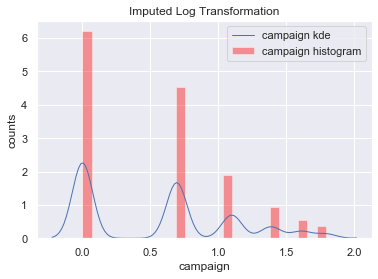

In [79]:
plt.xlabel('campaign')
plt.ylabel('counts')
plt.title('Imputed Log Transformation')
col = 'campaign'
#This shows the distribution of the points
sns.distplot(X_train_70_log.campaign, bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

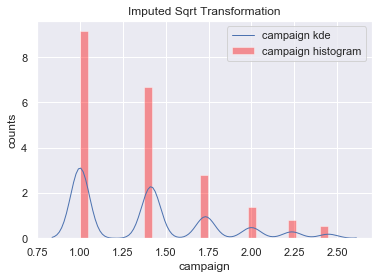

In [80]:
plt.xlabel('campaign')
plt.ylabel('counts')
plt.title('Imputed Sqrt Transformation')
col = 'campaign'
#This shows the distribution of the points
sns.distplot(X_train_70_Sqrt.campaign, bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

NOTE: below is an updated 'campaign' vs. 'y' graph from after imputation.

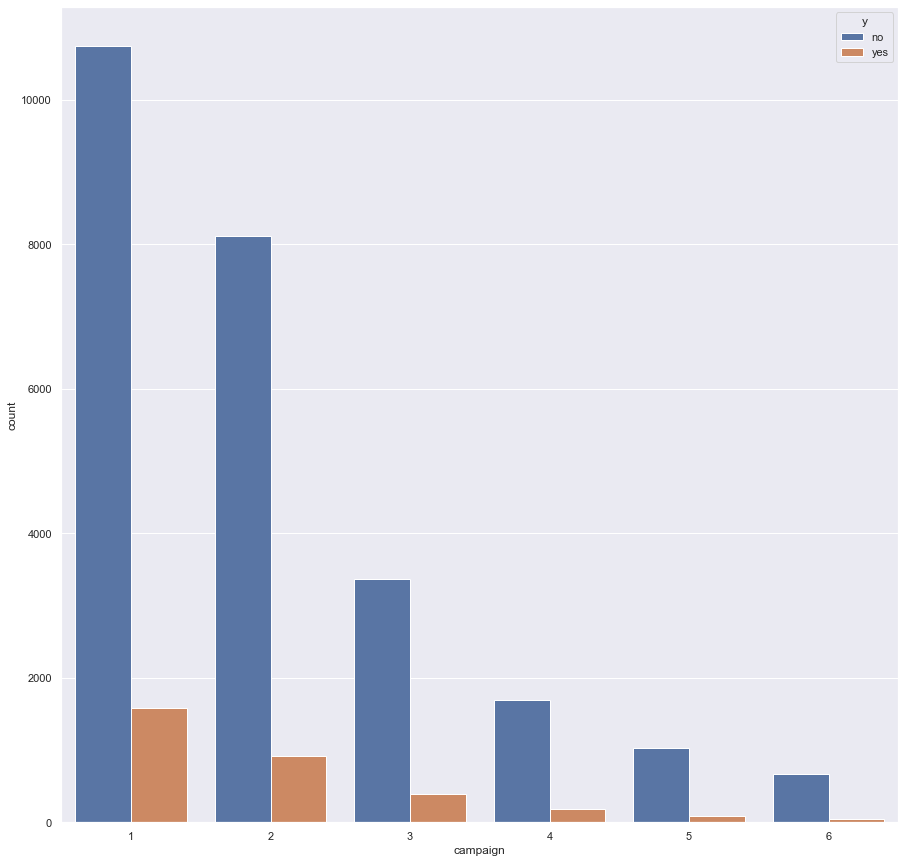

In [81]:
# This graph gives us a little glimps in how 'campaign' correlates with or target variable, 'y'.
plt.figure(figsize=(15,15))
sns.countplot(x=X_train_70_imp.campaign
              , hue=y_train_70)
plt.show()

#### The 'pdays' Column
Now that we have transformed 'campaign', let's us move on to discuss 'pdays'.

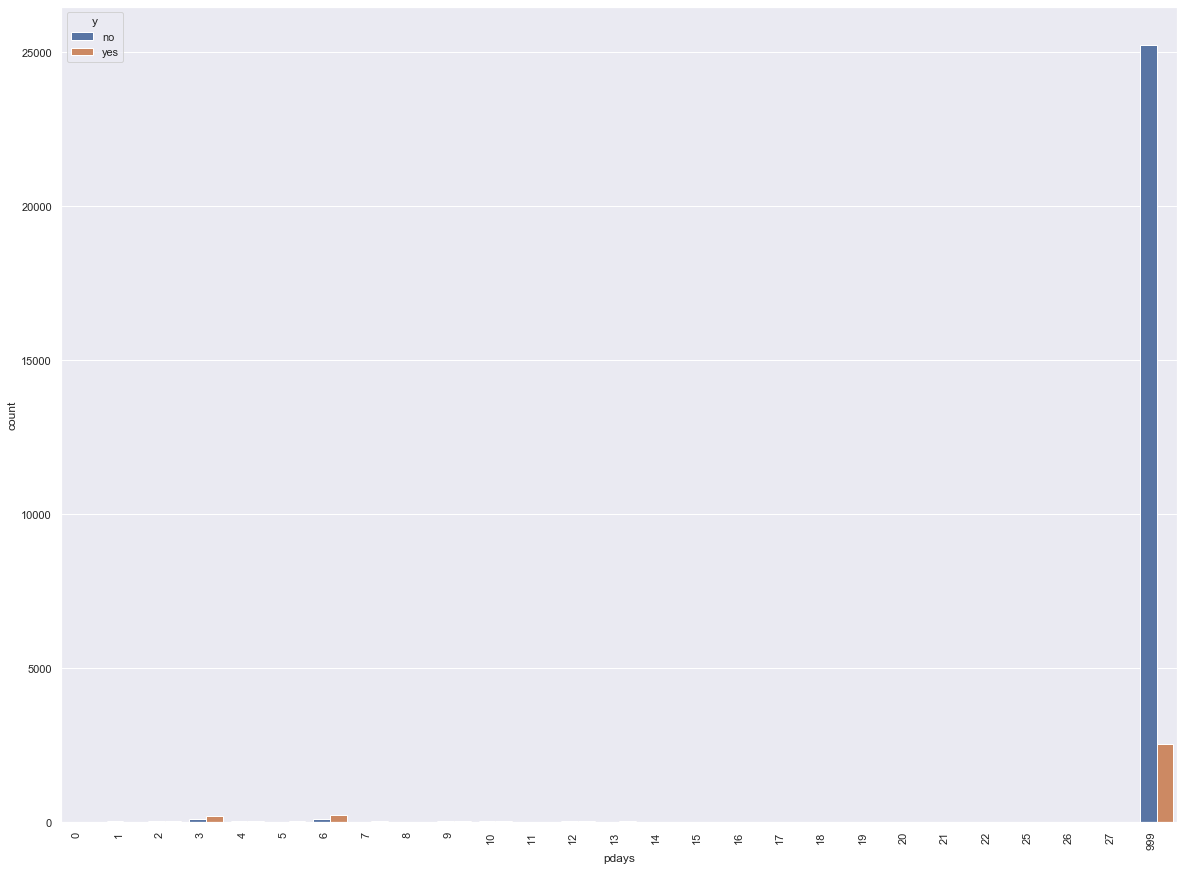

In [82]:
# This graph gives us a little glimps in how 'pdays' correlates with or target variable, 'y'.
plt.figure(figsize=(20,15))
chart = sns.countplot(x=X_train_70.pdays, hue=y_train_70, orient="h")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

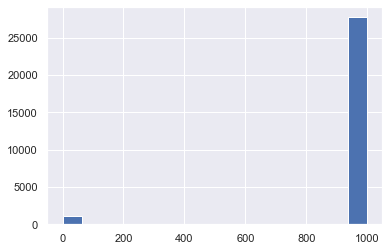

In [83]:
pd.plotting.hist_series(X_train_70.pdays, bins='auto')
plt.show()

In [84]:
X_train_70.pdays.value_counts(normalize=True, sort=True)

999    0.962540
6      0.010718
3      0.010405
4      0.003087
12     0.001526
9      0.001422
2      0.001387
7      0.001353
10     0.001179
5      0.001145
13     0.000832
1      0.000694
15     0.000659
11     0.000624
14     0.000590
8      0.000416
16     0.000347
0      0.000312
17     0.000243
18     0.000208
19     0.000069
22     0.000069
20     0.000035
21     0.000035
25     0.000035
26     0.000035
27     0.000035
Name: pdays, dtype: float64

In [85]:
X_train_70.pdays.describe()

count    28831.000000
mean       961.806770
std        188.539509
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

From the above histogram plot and a quick look at the numeric distribution, we can see that almost 96% of data is unknown (i.e. has 999), 7% of the data is 2, and 2% is 6 and 3. With 96% of our data being that the client was not previously contacted, we can reason to drop this column since the number of days would only be supported by 3% of the data.


In [86]:
outlier_detection(X_train_70.pdays)

(999.0, 999.0, 0.0)

In [87]:
# # drop from original data
# X_train_70.drop(columns='pdays', axis=1, inplace=True)
# X_test_30.drop(columns='pdays', axis=1, inplace=True)

# X_train_80.drop(columns='pdays', axis=1, inplace=True)
# X_test_20.drop(columns='pdays', axis=1, inplace=True)

# drop from imputation untransformed data
X_train_70_imp.drop(columns='pdays', axis=1, inplace=True)
X_test_30_imp.drop(columns='pdays', axis=1, inplace=True)

X_train_80_imp.drop(columns='pdays', axis=1, inplace=True)
X_test_20_imp.drop(columns='pdays', axis=1, inplace=True)

# drop from log transformed data
X_train_70_log.drop(columns='pdays', axis=1, inplace=True)
X_test_30_log.drop(columns='pdays', axis=1, inplace=True)

X_train_80_log.drop(columns='pdays', axis=1, inplace=True)
X_test_20_log.drop(columns='pdays', axis=1, inplace=True)

# drop from sqrt transformed data
X_train_70_Sqrt.drop(columns='pdays', axis=1, inplace=True)
X_test_30_Sqrt.drop(columns='pdays', axis=1, inplace=True)

X_train_80_Sqrt.drop(columns='pdays', axis=1, inplace=True)
X_test_20_Sqrt.drop(columns='pdays', axis=1, inplace=True)

In [88]:
X_train_70_Sqrt.head() # Check one to make sure column dropped.

age          job  marital          education  default housing  \
35451  5.567764       admin.  married  university.degree       no      no   
11069  6.480741  blue-collar  married            unknown  unknown      no   
21233  5.916080       admin.   single  university.degree       no      no   
33258  6.480741  blue-collar  married           basic.4y       no      no   
6529   6.480741       admin.   single  university.degree  unknown     yes   

      loan    contact month day_of_week  campaign  previous     poutcome  \
35451   no   cellular   may         mon  2.000000         0  nonexistent   
11069   no  telephone   jun         wed  1.732051         0  nonexistent   
21233   no   cellular   aug         mon  1.000000         0  nonexistent   
33258   no  telephone   may         tue  1.000000         0  nonexistent   
6529   yes  telephone   may         wed  1.732051         0  nonexistent   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
35451          -1.8          92.893          -46.2      1.244       5099.1  
11069           1.4          94.465          -41.8      4.962       5228.1  
21233           1.4          93.444          -36.1      4.963       5228.1  
33258          -1.8          92.893          -46.2      1.291       5099.1  
6529            1.1          93.994          -36.4      4.857       5191.0

#### The 'previous' Column
Moving right along to 'previous'.

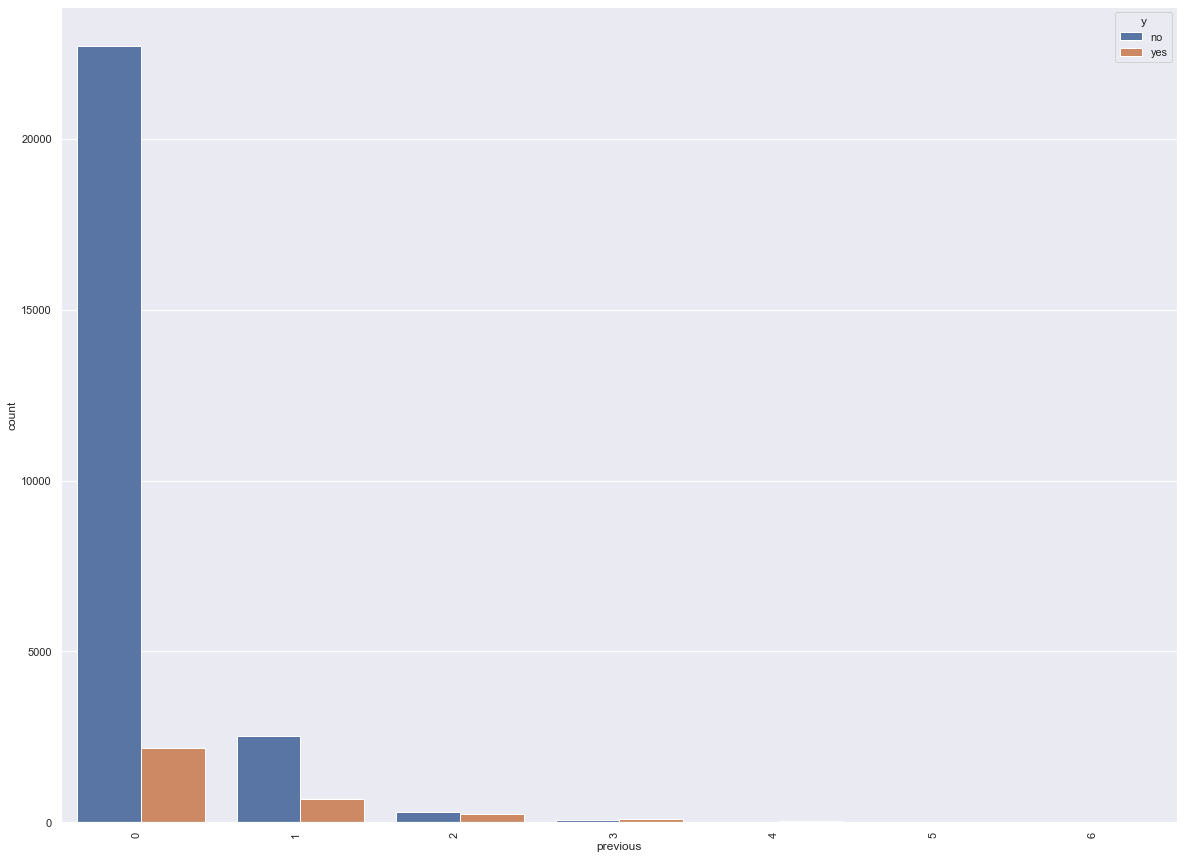

In [89]:
# This graph gives us a little glimps in how 'previous' correlates with or target variable, 'y'.
plt.figure(figsize=(20,15))
chart = sns.countplot(x=X_train_70.previous, hue=y_train_70, orient="h")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

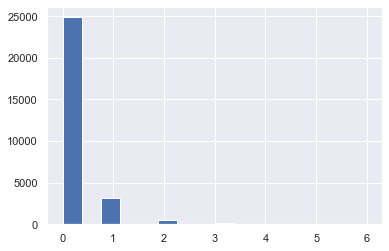

In [90]:
pd.plotting.hist_series(X_train_70.previous, bins='auto')
plt.show()

In [91]:
X_train_70.previous.value_counts(normalize=True, sort=True)

0    0.863203
1    0.111061
2    0.018348
3    0.005376
4    0.001387
5    0.000451
6    0.000173
Name: previous, dtype: float64

In [92]:
X_train_70.previous.describe()

count    28831.000000
mean         0.172731
std          0.492673
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: previous, dtype: float64

In [93]:
y_train_70[X_train_70.previous == 0].value_counts(normalize=True, sort=True)

no     0.913328
yes    0.086672
Name: y, dtype: float64

In [94]:
X_train_70[(y_train_70 == 'yes') | (y_train_70 == 'no')].previous.value_counts(normalize=True, sort=True)

0    0.863203
1    0.111061
2    0.018348
3    0.005376
4    0.001387
5    0.000451
6    0.000173
Name: previous, dtype: float64

From the above info, we see that about 86% of our data is '0' and that about 91% of the '0' result in a 'no'. We cannot get rid of this column because although the data is mainly '0', this could be a default value and there may be a noticable trend with the number of calls done prior to the campaign could lead to more 'yes' results.

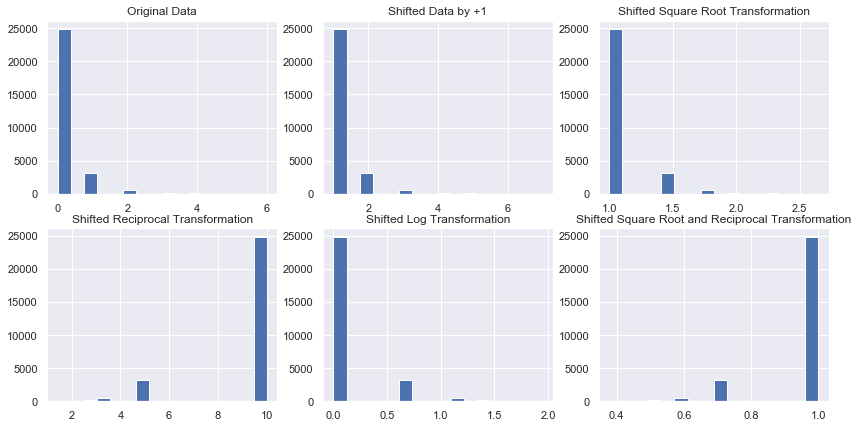

In [95]:
plt.figure(figsize=(14,7))

plt.subplot(231)
ax = pd.plotting.hist_series(X_train_70_imp.previous, bins='auto')
ax.set_title('Original Data')

plt.subplot(232)
ax1 = pd.plotting.hist_series(X_train_70_imp.previous.apply(lambda x: x+1), bins='auto')
ax1.set_title('Shifted Data by +1')

plt.subplot(233)
ax2 = pd.plotting.hist_series(np.sqrt(X_train_70_imp.previous.apply(lambda x: x+1)), bins='auto')
ax2. set_title('Shifted Square Root Transformation')

plt.subplot(234)
ax3 = pd.plotting.hist_series(X_train_70_imp.previous.apply(lambda x: 10/(x+1)), bins='auto')
ax3.set_title('Shifted Reciprocal Transformation')

plt.subplot(235)
ax4 = pd.plotting.hist_series(np.log(X_train_70_imp.previous.apply(lambda x: x+1)), bins='auto')
ax4.set_title('Shifted Log Transformation')

plt.subplot(236)
ax5 = pd.plotting.hist_series(np.reciprocal(np.sqrt(X_train_70_imp.previous.apply(lambda x: x+1))), bins='auto')
ax5.set_title('Shifted Square Root and Reciprocal Transformation')

plt.show()

In [96]:
# Original Data
stats.skew(X_train_70_imp.previous)

3.8024546090755877

In [97]:
# Shifted Data
stats.skew(X_train_70_imp.previous.apply(lambda x: x+1))

3.8024546090755873

In [98]:
# Shifted Square Root Transformation
stats.skew(np.sqrt(X_train_70_imp.previous.apply(lambda x: x+1)))

3.001402671795555

In [99]:
# Shifted Reciprocal Transformation
stats.skew(X_train_70_imp.previous.apply(lambda x: 10/(x+1)))

-2.239323298338072

In [100]:
# Shifted Log Transformation
stats.skew(np.log(X_train_70_imp.previous.apply(lambda x: x+1)))

2.5763441015599517

In [101]:
# Shifted Square Root and Reciprocal Transformation
stats.skew(np.reciprocal(np.sqrt(X_train_70_imp.previous.apply(lambda x: x+1))))

-2.354601388340287

From above, we can see how the transformations affect the skew of the data.

In [102]:
#Here we will not impute the column, since the other 14% of our data could be useful in decision making
# Below we implement the transformations on all the train and test data
X_train_70_log.previous = np.log(X_train_70_imp.previous.copy().apply(lambda x: x+1))

X_train_70_Sqrt.previous = np.sqrt(X_train_70_imp.previous.copy().apply(lambda x: x+1))

X_test_30_log.previous = np.log(X_test_30_imp.previous.copy().apply(lambda x: x+1))

X_test_30_Sqrt.previous = np.sqrt(X_test_30_imp.previous.copy().apply(lambda x: x+1))



X_train_80_log.previous = np.log(X_train_80_imp.previous.copy().apply(lambda x: x+1))

X_train_80_Sqrt.previous = np.sqrt(X_train_80_imp.previous.copy().apply(lambda x: x+1))

X_test_20_log.previous = np.log(X_test_20_imp.previous.copy().apply(lambda x: x+1))

X_test_20_Sqrt.previous = np.sqrt(X_test_20_imp.previous.copy().apply(lambda x: x+1))


In [103]:
X_train_70.describe() #This is the original data description

age      duration      campaign         pdays      previous  \
count  28831.000000  28831.000000  28831.000000  28831.000000  28831.000000   
mean      40.007110    257.374111      2.572578    961.806770      0.172731   
std       10.426822    257.208633      2.781547    188.539509      0.492673   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    178.000000      2.000000    999.000000      0.000000   
75%       47.000000    318.000000      3.000000    999.000000      0.000000   
max       98.000000   3785.000000     56.000000    999.000000      6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  28831.000000    28831.000000   28831.000000  28831.000000  28831.000000  
mean       0.083736       93.577485     -40.508619      3.623916   5167.110503  
std        1.567752        0.576804       4.603943      1.731858     72.184629  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [104]:
X_train_70_imp.describe() #This is the imputed data description  NOTE: 'previous' should not be changed.

age      campaign      previous  emp.var.rate  cons.price.idx  \
count  28831.000000  28831.000000  28831.000000  28831.000000    28831.000000   
mean      39.557664      2.048281      0.172731      0.083736       93.577485   
std        9.616060      1.249527      0.492673      1.567752        0.576804   
min       17.000000      1.000000      0.000000     -3.400000       92.201000   
25%       32.000000      1.000000      0.000000     -1.800000       93.075000   
50%       38.000000      2.000000      0.000000      1.100000       93.749000   
75%       47.000000      3.000000      0.000000      1.400000       93.994000   
max       69.000000      6.000000      6.000000      1.400000       94.767000   

       cons.conf.idx     euribor3m   nr.employed  
count   28831.000000  28831.000000  28831.000000  
mean      -40.508619      3.623916   5167.110503  
std         4.603943      1.731858     72.184629  
min       -50.800000      0.634000   4963.600000  
25%       -42.700000      1.344000   5099.100000  
50%       -41.800000      4.857000   5191.000000  
75%       -36.400000      4.961000   5228.100000  
max       -26.900000      5.045000   5228.100000

C:\Users\johnh\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


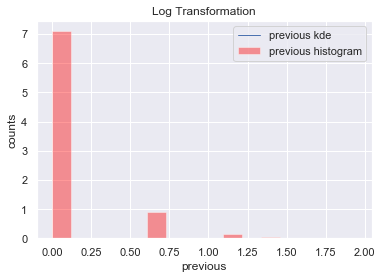

In [105]:
plt.xlabel('previous')
plt.ylabel('counts')
plt.title('Log Transformation')
col = 'previous'
#This shows the distribution of the points
sns.distplot(X_train_70_log.previous, bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

C:\Users\johnh\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


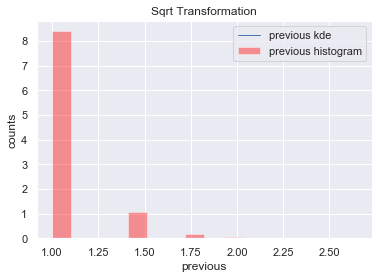

In [106]:
plt.xlabel('previous')
plt.ylabel('counts')
plt.title('Sqrt Transformation')
col = 'previous'
#This shows the distribution of the points
sns.distplot(X_train_70_Sqrt.previous, bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

#### The 'emp.var.rate' Column
Now we move on to 'emp.var.rate'

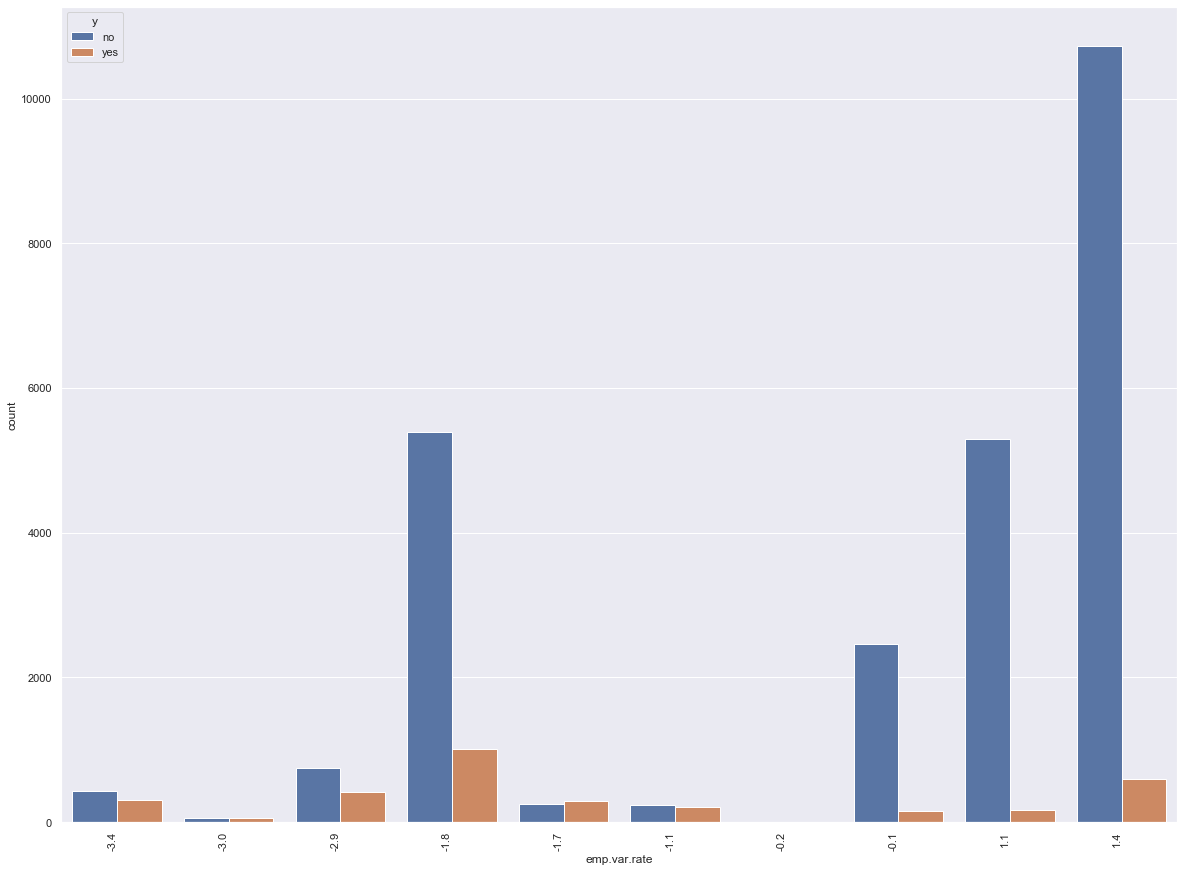

In [107]:
# This graph gives us a little glimps in how 'emp.var.rate' correlates with or target variable, 'y'.
plt.figure(figsize=(20,15))
chart = sns.countplot(x=X_train_70['emp.var.rate'], hue=y_train_70, orient="h")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

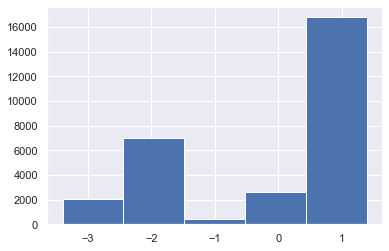

In [108]:
pd.plotting.hist_series(X_train_70['emp.var.rate'], bins=5)
plt.show()

In [109]:
outlier_detection(X_train_70['emp.var.rate'])

(-6.6000000000000005, 6.200000000000001, 3.2)

We can see from above that this data is not evenly distributed, and imputation by replacement of the median will not change anything here.

It appears that there is a variability with this variable; therefore, it is necessary to keep it. Let us again look at how transforming changines the distribution of the data and the skewness of each.

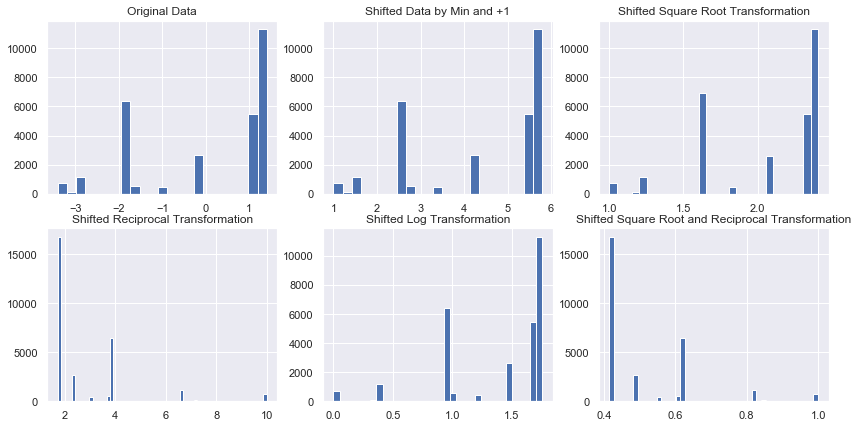

In [110]:
plt.figure(figsize=(14,7))

plt.subplot(231)
ax = pd.plotting.hist_series(X_train_70['emp.var.rate'], bins='auto')
ax.set_title('Original Data')

plt.subplot(232)
ax1 = pd.plotting.hist_series(X_train_70['emp.var.rate'].apply(lambda x: x-X_train_70['emp.var.rate'].min()+1), bins='auto')
ax1.set_title('Shifted Data by Min and +1')

plt.subplot(233)
ax2 = pd.plotting.hist_series(np.sqrt(X_train_70['emp.var.rate'].apply(lambda x: x-X_train_70['emp.var.rate'].min()+1)), bins='auto')
ax2. set_title('Shifted Square Root Transformation')

plt.subplot(234)
ax3 = pd.plotting.hist_series(X_train_70['emp.var.rate'].apply(lambda x: x-X_train_70['emp.var.rate'].min()+1).apply(lambda x: 10/x), bins='auto')
ax3.set_title('Shifted Reciprocal Transformation')

plt.subplot(235)
ax4 = pd.plotting.hist_series(np.log(X_train_70['emp.var.rate'].apply(lambda x: x-X_train_70['emp.var.rate'].min()+1)), bins='auto')
ax4.set_title('Shifted Log Transformation')

plt.subplot(236)
ax5 = pd.plotting.hist_series(np.reciprocal(np.sqrt(X_train_70['emp.var.rate'].apply(lambda x: x-X_train_70['emp.var.rate'].min()+1))), bins='auto')
ax5.set_title('Shifted Square Root and Reciprocal Transformation')

plt.show()

In [111]:
# Original Data
stats.skew(X_train_70['emp.var.rate'])

-0.7253463086586078

In [112]:
# Shifted Data
stats.skew(X_train_70['emp.var.rate'].apply(lambda x: x-X_train_70['emp.var.rate'].min()+1))

-0.7253463086586069

In [113]:
# Shifted Square Root Transformation
stats.skew(np.sqrt(X_train_70['emp.var.rate'].apply(lambda x: x-X_train_70['emp.var.rate'].min()+1)))

-0.9249243391879789

In [114]:
# Shifted Reciprocal Transformation
stats.skew(X_train_70['emp.var.rate'].apply(lambda x: x-X_train_70['emp.var.rate'].min()+1).apply(lambda x: 10/x))

2.432674054901938

In [115]:
# Shifted Log Transformation
stats.skew(np.log(X_train_70['emp.var.rate'].apply(lambda x: x-X_train_70['emp.var.rate'].min()+1)))

-1.2521116933607104

In [116]:
# Shifted Square Root and Reciprocal Transformation
stats.skew(np.reciprocal(np.sqrt(X_train_70['emp.var.rate'].apply(lambda x: x-X_train_70['emp.var.rate'].min()+1))))

1.756050088438043

From above, we see that the best transformations appear to be none and square root!

In [117]:
print('Original Data\n', X_train_70['emp.var.rate'].describe()) 
print('\nSquare Root Transformation \n', np.sqrt(X_train_70['emp.var.rate'].apply(lambda x: x-X_train_70['emp.var.rate'].min()+1)).describe())

Original Data
 count    28831.000000
mean         0.083736
std          1.567752
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

Square Root Transformation 
 count    28831.000000
mean         2.076597
std          0.414110
min          1.000000
25%          1.612452
50%          2.345208
75%          2.408319
max          2.408319
Name: emp.var.rate, dtype: float64


In [118]:
#Here we perform no imputation since Interquartile method identified no outliers.
# Below we implement the transformations on all the train and test data
X_train_70_log['emp.var.rate'] = np.log(X_train_70['emp.var.rate'].copy().apply(lambda x: x-X_train_70['emp.var.rate'].min()+1))

X_train_70_Sqrt['emp.var.rate'] = np.sqrt(X_train_70['emp.var.rate'].copy().apply(lambda x: x-X_train_70['emp.var.rate'].min()+1))

X_test_30_log['emp.var.rate'] = np.log(X_test_30['emp.var.rate'].copy().apply(lambda x: x-X_test_30['emp.var.rate'].min()+1))

X_test_30_Sqrt['emp.var.rate'] = np.sqrt(X_test_30['emp.var.rate'].copy().apply(lambda x: x-X_test_30['emp.var.rate'].min()+1))



X_train_80_log['emp.var.rate'] = np.log(X_train_80['emp.var.rate'].copy().apply(lambda x: x-X_train_80['emp.var.rate'].min()+1))

X_train_80_Sqrt['emp.var.rate'] = np.sqrt(X_train_80['emp.var.rate'].copy().apply(lambda x: x-X_train_80['emp.var.rate'].min()+1))

X_test_20_log['emp.var.rate'] = np.log(X_test_20['emp.var.rate'].copy().apply(lambda x: x-X_test_20['emp.var.rate'].min()+1))

X_test_20_Sqrt['emp.var.rate'] = np.sqrt(X_test_20['emp.var.rate'].copy().apply(lambda x: x-X_test_20['emp.var.rate'].min()+1))




In [119]:
X_train_70.describe() #This is the original data description

age      duration      campaign         pdays      previous  \
count  28831.000000  28831.000000  28831.000000  28831.000000  28831.000000   
mean      40.007110    257.374111      2.572578    961.806770      0.172731   
std       10.426822    257.208633      2.781547    188.539509      0.492673   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    178.000000      2.000000    999.000000      0.000000   
75%       47.000000    318.000000      3.000000    999.000000      0.000000   
max       98.000000   3785.000000     56.000000    999.000000      6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  28831.000000    28831.000000   28831.000000  28831.000000  28831.000000  
mean       0.083736       93.577485     -40.508619      3.623916   5167.110503  
std        1.567752        0.576804       4.603943      1.731858     72.184629  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [120]:
X_train_70_imp.describe() #This is the imputed data description  NOTE:'emp.var.rate' should not be changed.

age      campaign      previous  emp.var.rate  cons.price.idx  \
count  28831.000000  28831.000000  28831.000000  28831.000000    28831.000000   
mean      39.557664      2.048281      0.172731      0.083736       93.577485   
std        9.616060      1.249527      0.492673      1.567752        0.576804   
min       17.000000      1.000000      0.000000     -3.400000       92.201000   
25%       32.000000      1.000000      0.000000     -1.800000       93.075000   
50%       38.000000      2.000000      0.000000      1.100000       93.749000   
75%       47.000000      3.000000      0.000000      1.400000       93.994000   
max       69.000000      6.000000      6.000000      1.400000       94.767000   

       cons.conf.idx     euribor3m   nr.employed  
count   28831.000000  28831.000000  28831.000000  
mean      -40.508619      3.623916   5167.110503  
std         4.603943      1.731858     72.184629  
min       -50.800000      0.634000   4963.600000  
25%       -42.700000      1.344000   5099.100000  
50%       -41.800000      4.857000   5191.000000  
75%       -36.400000      4.961000   5228.100000  
max       -26.900000      5.045000   5228.100000

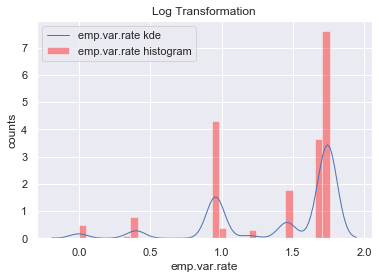

In [121]:
plt.xlabel('emp.var.rate')
plt.ylabel('counts')
plt.title('Log Transformation')
col = 'emp.var.rate'
#This shows the distribution of the points
sns.distplot(X_train_70_log['emp.var.rate'], bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

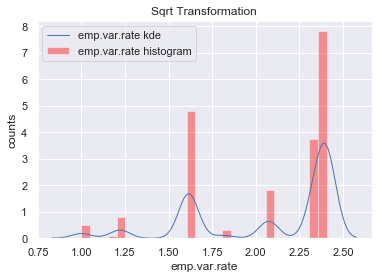

In [122]:
plt.xlabel('emp.var.rate')
plt.ylabel('counts')
plt.title('Sqrt Transformation')
col = 'emp.var.rate'
#This shows the distribution of the points
sns.distplot(X_train_70_Sqrt['emp.var.rate'], bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

#### The 'cons.price.idx' Column
Now we move on to 'cons.price.idx'

In [123]:
pd.plotting.hist_series(X_train_70['cons.price.idx'], bins=8)
plt.show()

In [124]:
X_train_70['cons.price.idx'].describe()

count    28831.000000
mean        93.577485
std          0.576804
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

In [125]:
outlier_detection(X_train_70['cons.price.idx'])

(91.69650000000001, 95.3725, 0.9189999999999969)

NOTE: as we saw above, the lower, upper and IQR are all the same for the test and train data.

We can see from above that this data is not evenly distributed, and imputation by replacement of the median will not change anything here.

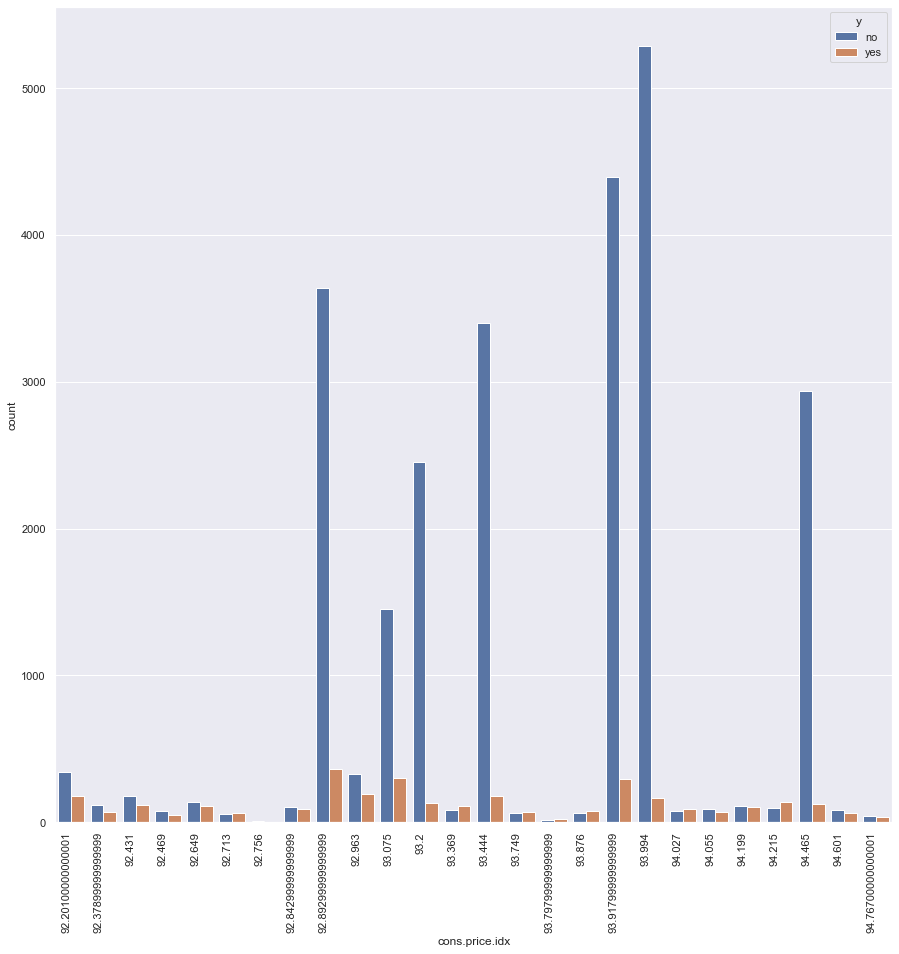

In [126]:
# This graph gives us a little glimps in how 'cons.price.idx' correlates with or target variable, 'y'.
plt.figure(figsize=(15,15))
chart = sns.countplot(x=X_train_70['cons.price.idx'], hue=y_train_70, orient="h")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

It appears that there is a variability with this variable; therefore, it is necessary to keep it. Let us again look at how transforming changines the distribution of the data and the skewness of each.

In [127]:
plt.figure(figsize=(14,7))

plt.subplot(231)
ax = pd.plotting.hist_series(X_train_70['cons.price.idx'], bins='auto')
ax.set_title('Original Data')

# plt.subplot(232)
# ax1 = pd.plotting.hist_series(X_train_70['cons.price.idx'], bins=6)
# ax1.set_title('Shifted Data by Min and +1')

plt.subplot(233)
ax2 = pd.plotting.hist_series(np.sqrt(X_train_70['cons.price.idx']), bins='auto')
ax2. set_title('Square Root Transformation')

plt.subplot(234)
ax3 = pd.plotting.hist_series(X_train_70['cons.price.idx'].apply(lambda x: 10/x), bins='auto')
ax3.set_title('Reciprocal Transformation')

plt.subplot(235)
ax4 = pd.plotting.hist_series(np.log(X_train_70['cons.price.idx']), bins='auto')
ax4.set_title('Log Transformation')

plt.subplot(236)
ax5 = pd.plotting.hist_series(np.reciprocal(np.sqrt(X_train_70['cons.price.idx'])), bins='auto')
ax5.set_title('Square Root and Reciprocal Transformation')

plt.show()

In [128]:
# Original Data
stats.skew(X_train_70['cons.price.idx'])

-0.23016183268342597

In [129]:
# Square Root Transformation
stats.skew(np.sqrt(X_train_70['cons.price.idx']))

-0.2353242776907198

In [130]:
# Shifted Reciprocal Transformation
stats.skew(X_train_70['cons.price.idx'].apply(lambda x: 10/x))

0.2508609770934369

In [131]:
# Shifted Log Transformation
stats.skew(np.log(X_train_70['cons.price.idx']))

-0.2404948772565909

In [132]:
# Shifted Square Root and Reciprocal Transformation
stats.skew(np.reciprocal(np.sqrt(X_train_70['cons.price.idx'])))

0.24567374055663485

From above, we see that the skew result of the transformations

In [133]:
#Here we perform no imputation since Interquartile method identified no outliers.
# Below we implement the transformations on all the train and test data
X_train_70_log['cons.price.idx'] = np.log(X_train_70['cons.price.idx'].copy())

X_train_70_Sqrt['cons.price.idx'] = np.sqrt(X_train_70['cons.price.idx'].copy())

X_test_30_log['cons.price.idx'] = np.log(X_test_30['cons.price.idx'].copy())

X_test_30_Sqrt['cons.price.idx'] = np.sqrt(X_test_30['cons.price.idx'].copy())



X_train_80_log['cons.price.idx'] = np.log(X_train_80['cons.price.idx'])

X_train_80_Sqrt['cons.price.idx'] = np.sqrt(X_train_80['cons.price.idx'])

X_test_20_log['cons.price.idx'] = np.log(X_test_20['cons.price.idx'])

X_test_20_Sqrt['cons.price.idx'] = np.sqrt(X_test_20['cons.price.idx'])




In [134]:
X_train_70.describe() #This is the original data description

age      duration      campaign         pdays      previous  \
count  28831.000000  28831.000000  28831.000000  28831.000000  28831.000000   
mean      40.007110    257.374111      2.572578    961.806770      0.172731   
std       10.426822    257.208633      2.781547    188.539509      0.492673   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    178.000000      2.000000    999.000000      0.000000   
75%       47.000000    318.000000      3.000000    999.000000      0.000000   
max       98.000000   3785.000000     56.000000    999.000000      6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  28831.000000    28831.000000   28831.000000  28831.000000  28831.000000  
mean       0.083736       93.577485     -40.508619      3.623916   5167.110503  
std        1.567752        0.576804       4.603943      1.731858     72.184629  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [135]:
X_train_70_imp.describe() #This is the imputed data description  NOTE: 'cons.price.idx' should not be changed.

age      campaign      previous  emp.var.rate  cons.price.idx  \
count  28831.000000  28831.000000  28831.000000  28831.000000    28831.000000   
mean      39.557664      2.048281      0.172731      0.083736       93.577485   
std        9.616060      1.249527      0.492673      1.567752        0.576804   
min       17.000000      1.000000      0.000000     -3.400000       92.201000   
25%       32.000000      1.000000      0.000000     -1.800000       93.075000   
50%       38.000000      2.000000      0.000000      1.100000       93.749000   
75%       47.000000      3.000000      0.000000      1.400000       93.994000   
max       69.000000      6.000000      6.000000      1.400000       94.767000   

       cons.conf.idx     euribor3m   nr.employed  
count   28831.000000  28831.000000  28831.000000  
mean      -40.508619      3.623916   5167.110503  
std         4.603943      1.731858     72.184629  
min       -50.800000      0.634000   4963.600000  
25%       -42.700000      1.344000   5099.100000  
50%       -41.800000      4.857000   5191.000000  
75%       -36.400000      4.961000   5228.100000  
max       -26.900000      5.045000   5228.100000

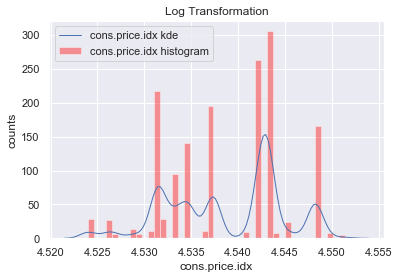

In [136]:
plt.xlabel('cons.price.idx')
plt.ylabel('counts')
plt.title('Log Transformation')
col = 'cons.price.idx'
#This shows the distribution of the points
sns.distplot(X_train_70_log['cons.price.idx'], bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

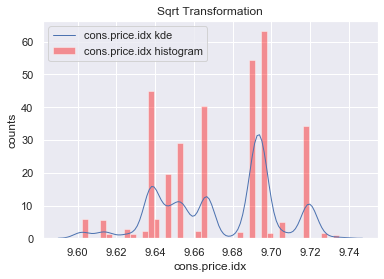

In [137]:
plt.xlabel('cons.price.idx')
plt.ylabel('counts')
plt.title('Sqrt Transformation')
col = 'cons.price.idx'
#This shows the distribution of the points
sns.distplot(X_train_70_Sqrt['cons.price.idx'], bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

#### The 'cons.conf.idx' Column
Now we move on to 'cons.conf.idx'

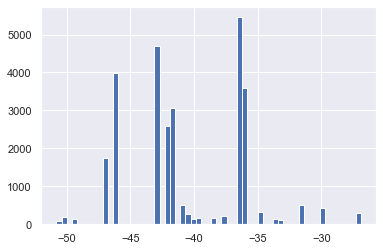

In [138]:
pd.plotting.hist_series(X_train_70['cons.conf.idx'], bins='auto')
plt.show()

In [139]:
X_train_70['cons.conf.idx'].value_counts(sort=True)

-36.4    5456
-42.7    4687
-46.2    3997
-36.1    3579
-41.8    3062
-42.0    2587
-47.1    1755
-31.4     521
-40.8     519
-26.9     300
-30.1     248
-40.3     232
-37.5     216
-34.8     195
-50.0     188
-29.8     184
-38.3     167
-39.8     153
-40.0     144
-49.5     142
-34.6     128
-33.6     128
-33.0     118
-50.8      80
-40.4      39
-45.9       6
Name: cons.conf.idx, dtype: int64

In [140]:
X_train_70['cons.conf.idx'].describe()

count    28831.000000
mean       -40.508619
std          4.603943
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

In [141]:
outlier_detection(X_train_70['cons.conf.idx'])

(-52.150000000000006, -26.949999999999992, 6.300000000000004)

We can see from above that this data is not evenly distributed, and imputation by replacement of the median will not change anything here.

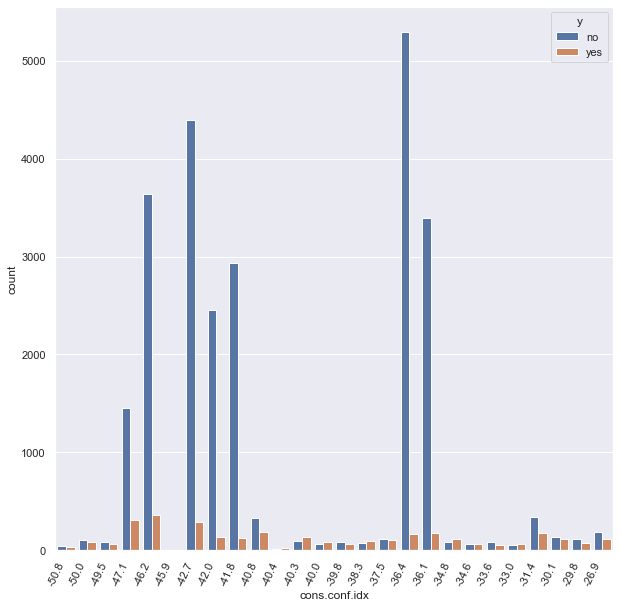

In [142]:
# This graph gives us a little glimps in how 'emp.var.rate' correlates with or target variable, 'y'.
plt.figure(figsize=(10,10))
chart = sns.countplot(x=X_train_70['cons.conf.idx'], hue=y_train_70, orient="h")
chart.set_xticklabels(chart.get_xticklabels(), rotation=65, horizontalalignment='right')
plt.show()

It appears that there is a variability with this variable; therefore, it is necessary to keep it. Let us again look at how transforming changines the distribution of the data and the skewness of each.

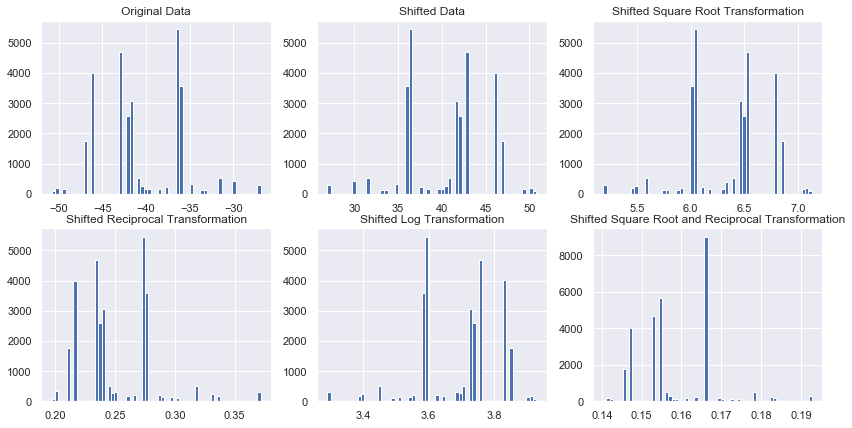

In [143]:
plt.figure(figsize=(14,7))

plt.subplot(231)
ax = pd.plotting.hist_series(X_train_70['cons.conf.idx'], bins='auto')
ax.set_title('Original Data')

plt.subplot(232)
ax1 = pd.plotting.hist_series(X_train_70['cons.conf.idx'].apply(lambda x: -1*x), bins='auto')
ax1.set_title('Shifted Data')

plt.subplot(233)
ax2 = pd.plotting.hist_series(np.sqrt(X_train_70['cons.conf.idx'].apply(lambda x: -1*x)), bins='auto')
ax2. set_title('Shifted Square Root Transformation')

plt.subplot(234)
ax3 = pd.plotting.hist_series(X_train_70['cons.conf.idx'].apply(lambda x: -10/x), bins='auto')
ax3.set_title('Shifted Reciprocal Transformation')

plt.subplot(235)
ax4 = pd.plotting.hist_series(np.log(X_train_70['cons.conf.idx'].apply(lambda x: -1*x)), bins='auto')
ax4.set_title('Shifted Log Transformation')

plt.subplot(236)
ax5 = pd.plotting.hist_series(np.reciprocal(np.sqrt(X_train_70['cons.conf.idx'].apply(lambda x: -1*x))), bins='auto')
ax5.set_title('Shifted Square Root and Reciprocal Transformation')

plt.show()

In [144]:
# Original Data
stats.skew(X_train_70['cons.conf.idx'])

0.30107112434531746

In [145]:
# Square Root Transformation
stats.skew(np.sqrt(X_train_70['cons.conf.idx'].apply(lambda x: -1*x)))

-0.44746088231021425

In [146]:
# Shifted Reciprocal Transformation
stats.skew(X_train_70['cons.conf.idx'].apply(lambda x: -10/x))

0.9934272128142432

In [147]:
# Shifted Log Transformation
stats.skew(np.log(X_train_70['cons.conf.idx'].apply(lambda x: -1*x)))

-0.6096148251501323

In [148]:
# Shifted Square Root and Reciprocal Transformation
stats.skew(np.reciprocal(np.sqrt(X_train_70['cons.conf.idx'].apply(lambda x: -1*x))))

0.7905768496867797

From above, we see that the skew result of the transformations

In [149]:
#Here we perform no imputation since Interquartile method identified no outliers.
# Below we implement the transformations on all the train and test data
X_train_70_log['cons.conf.idx'] = np.log(X_train_70['cons.conf.idx'].copy().apply(lambda x: -1*x))

X_train_70_Sqrt['cons.conf.idx'] = np.sqrt(X_train_70['cons.conf.idx'].copy().apply(lambda x: -1*x))

X_test_30_log['cons.conf.idx'] = np.log(X_test_30['cons.conf.idx'].copy().apply(lambda x: -1*x))

X_test_30_Sqrt['cons.conf.idx'] = np.sqrt(X_test_30['cons.conf.idx'].copy().apply(lambda x: -1*x))



X_train_80_log['cons.conf.idx'] = np.log(X_train_80['cons.conf.idx'].copy().apply(lambda x: -1*x))

X_train_80_Sqrt['cons.conf.idx'] = np.sqrt(X_train_80['cons.conf.idx'].copy().apply(lambda x: -1*x))

X_test_20_log['cons.conf.idx'] = np.log(X_test_20['cons.conf.idx'].copy().apply(lambda x: -1*x))

X_test_20_Sqrt['cons.conf.idx'] = np.sqrt(X_test_20['cons.conf.idx'].copy().apply(lambda x: -1*x))




In [150]:
X_train_70.describe() #This is the original data description

age      duration      campaign         pdays      previous  \
count  28831.000000  28831.000000  28831.000000  28831.000000  28831.000000   
mean      40.007110    257.374111      2.572578    961.806770      0.172731   
std       10.426822    257.208633      2.781547    188.539509      0.492673   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    178.000000      2.000000    999.000000      0.000000   
75%       47.000000    318.000000      3.000000    999.000000      0.000000   
max       98.000000   3785.000000     56.000000    999.000000      6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  28831.000000    28831.000000   28831.000000  28831.000000  28831.000000  
mean       0.083736       93.577485     -40.508619      3.623916   5167.110503  
std        1.567752        0.576804       4.603943      1.731858     72.184629  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [151]:
X_train_70_imp.describe() #This is the imputed data description  NOTE: 'cons.conf.idx' should not be changed.

age      campaign      previous  emp.var.rate  cons.price.idx  \
count  28831.000000  28831.000000  28831.000000  28831.000000    28831.000000   
mean      39.557664      2.048281      0.172731      0.083736       93.577485   
std        9.616060      1.249527      0.492673      1.567752        0.576804   
min       17.000000      1.000000      0.000000     -3.400000       92.201000   
25%       32.000000      1.000000      0.000000     -1.800000       93.075000   
50%       38.000000      2.000000      0.000000      1.100000       93.749000   
75%       47.000000      3.000000      0.000000      1.400000       93.994000   
max       69.000000      6.000000      6.000000      1.400000       94.767000   

       cons.conf.idx     euribor3m   nr.employed  
count   28831.000000  28831.000000  28831.000000  
mean      -40.508619      3.623916   5167.110503  
std         4.603943      1.731858     72.184629  
min       -50.800000      0.634000   4963.600000  
25%       -42.700000      1.344000   5099.100000  
50%       -41.800000      4.857000   5191.000000  
75%       -36.400000      4.961000   5228.100000  
max       -26.900000      5.045000   5228.100000

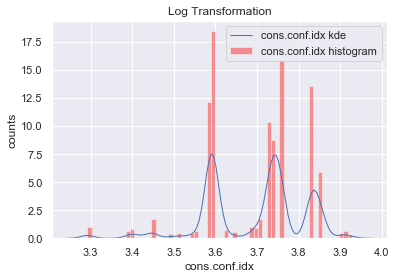

In [152]:
plt.xlabel('cons.conf.idx')
plt.ylabel('counts')
plt.title('Log Transformation')
col = 'cons.conf.idx'
#This shows the distribution of the points
sns.distplot(X_train_70_log['cons.conf.idx'], bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

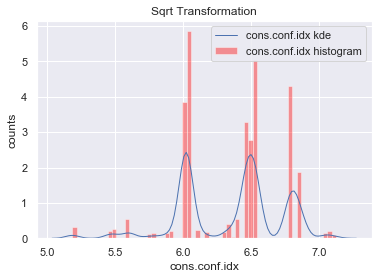

In [153]:
plt.xlabel('cons.conf.idx')
plt.ylabel('counts')
plt.title('Sqrt Transformation')
col = 'cons.conf.idx'
#This shows the distribution of the points
sns.distplot(X_train_70_Sqrt['cons.conf.idx'], bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

#### The 'euribor3m' Column
Now we move on to 'euribor3m'

In [154]:
pd.plotting.hist_series(X_train_70['euribor3m'], bins='auto')
plt.show()

In [155]:
X_train_70['euribor3m'].value_counts(sort=True)

4.857    1999
4.962    1789
4.963    1721
4.961    1331
4.856     849
         ... 
3.329       1
1.574       1
4.921       1
3.853       1
3.488       1
Name: euribor3m, Length: 308, dtype: int64

In [156]:
X_train_70['euribor3m'].describe()

count    28831.000000
mean         3.623916
std          1.731858
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

In [157]:
outlier_detection(X_train_70['euribor3m'])

(-4.081499999999999, 10.3865, 3.617)

We can see from above that this data is not evenly distributed, and imputation by replacement of the median will not change anything here.

In [158]:
# This graph gives us a little glimps in how 'euribor3m' correlates with or target variable, 'y'.
plt.figure(figsize=(15,15))
sns.countplot(x=X_train_70['euribor3m'], hue=y_train_70, orient="h")
plt.show()

It appears that there is a variability with this variable; therefore, it is necessary to keep it. Let us again look at how transforming changines the distribution of the data and the skewness of each.

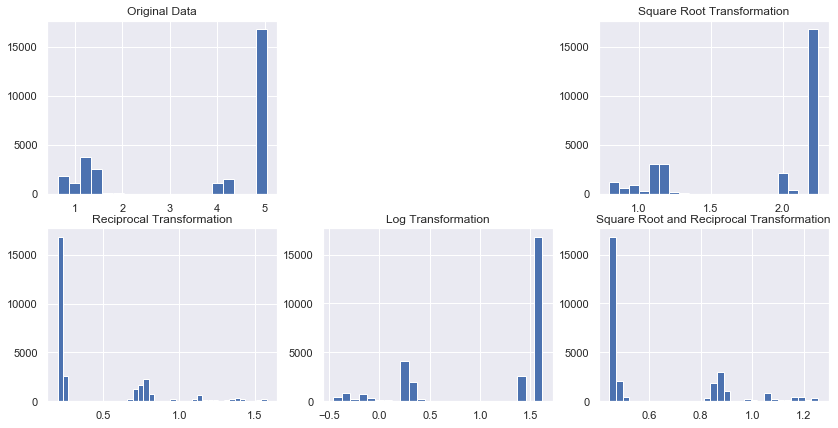

In [159]:
plt.figure(figsize=(14,7))

plt.subplot(231)
ax = pd.plotting.hist_series(X_train_70['euribor3m'], bins='auto')
ax.set_title('Original Data')

# plt.subplot(232)
# ax1 = pd.plotting.hist_series(X_train_70['euribor3m'].apply(lambda x: -1*x), bins=8)
# ax1.set_title('Shifted Data')

plt.subplot(233)
ax2 = pd.plotting.hist_series(np.sqrt(X_train_70['euribor3m']), bins='auto')
ax2. set_title('Square Root Transformation')

plt.subplot(234)
ax3 = pd.plotting.hist_series(X_train_70['euribor3m'].apply(lambda x: 1/x), bins='auto')
ax3.set_title('Reciprocal Transformation')

plt.subplot(235)
ax4 = pd.plotting.hist_series(np.log(X_train_70['euribor3m']), bins='auto')
ax4.set_title('Log Transformation')

plt.subplot(236)
ax5 = pd.plotting.hist_series(np.reciprocal(np.sqrt(X_train_70['euribor3m'])), bins='auto')
ax5.set_title('Square Root and Reciprocal Transformation')

plt.show()

In [160]:
# Original Data
stats.skew(X_train_70['euribor3m'])

-0.713584058916141

In [161]:
# Square Root Transformation
stats.skew(np.sqrt(X_train_70['euribor3m']))

-0.7721633925386211

In [162]:
# Shifted Reciprocal Transformation
stats.skew(X_train_70['euribor3m'].apply(lambda x: 10/x))

1.3462101353985836

In [163]:
# Shifted Log Transformation
stats.skew(np.log(X_train_70['euribor3m']))

-0.8730942179710471

In [164]:
# Shifted Square Root and Reciprocal Transformation
stats.skew(np.reciprocal(np.sqrt(X_train_70['euribor3m'])))

1.0535564031172338

From above, we see that the skew result of the transformations

In [165]:
#Here we perform no imputation since Interquartile method identified no outliers.
# Below we implement the transformations on all the train and test data
X_train_70_log['euribor3m'] = np.log(X_train_70['euribor3m'].copy())

X_train_70_Sqrt['euribor3m'] = np.sqrt(X_train_70['euribor3m'].copy())

X_test_30_log['euribor3m'] = np.log(X_test_30['euribor3m'].copy())

X_test_30_Sqrt['euribor3m'] = np.sqrt(X_test_30['euribor3m'].copy())



X_train_80_log['euribor3m'] = np.log(X_train_80['euribor3m'].copy())

X_train_80_Sqrt['euribor3m'] = np.sqrt(X_train_80['euribor3m'].copy())

X_test_20_log['euribor3m'] = np.log(X_test_20['euribor3m'].copy())

X_test_20_Sqrt['euribor3m'] = np.sqrt(X_test_20['euribor3m'].copy())




In [166]:
X_train_70.describe() #This is the original data description

age      duration      campaign         pdays      previous  \
count  28831.000000  28831.000000  28831.000000  28831.000000  28831.000000   
mean      40.007110    257.374111      2.572578    961.806770      0.172731   
std       10.426822    257.208633      2.781547    188.539509      0.492673   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    178.000000      2.000000    999.000000      0.000000   
75%       47.000000    318.000000      3.000000    999.000000      0.000000   
max       98.000000   3785.000000     56.000000    999.000000      6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  28831.000000    28831.000000   28831.000000  28831.000000  28831.000000  
mean       0.083736       93.577485     -40.508619      3.623916   5167.110503  
std        1.567752        0.576804       4.603943      1.731858     72.184629  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [167]:
X_train_70_imp.describe() #This is the imputed data description  NOTE: 'euribor3m' should not be changed.

age      campaign      previous  emp.var.rate  cons.price.idx  \
count  28831.000000  28831.000000  28831.000000  28831.000000    28831.000000   
mean      39.557664      2.048281      0.172731      0.083736       93.577485   
std        9.616060      1.249527      0.492673      1.567752        0.576804   
min       17.000000      1.000000      0.000000     -3.400000       92.201000   
25%       32.000000      1.000000      0.000000     -1.800000       93.075000   
50%       38.000000      2.000000      0.000000      1.100000       93.749000   
75%       47.000000      3.000000      0.000000      1.400000       93.994000   
max       69.000000      6.000000      6.000000      1.400000       94.767000   

       cons.conf.idx     euribor3m   nr.employed  
count   28831.000000  28831.000000  28831.000000  
mean      -40.508619      3.623916   5167.110503  
std         4.603943      1.731858     72.184629  
min       -50.800000      0.634000   4963.600000  
25%       -42.700000      1.344000   5099.100000  
50%       -41.800000      4.857000   5191.000000  
75%       -36.400000      4.961000   5228.100000  
max       -26.900000      5.045000   5228.100000

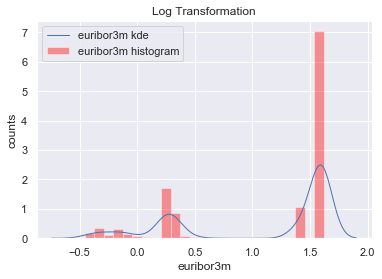

In [168]:
plt.xlabel('euribor3m')
plt.ylabel('counts')
plt.title('Log Transformation')
col = 'euribor3m'
#This shows the distribution of the points
sns.distplot(X_train_70_log['euribor3m'], bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

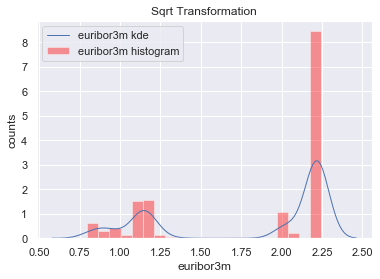

In [169]:
plt.xlabel('euribor3m')
plt.ylabel('counts')
plt.title('Sqrt Transformation')
col = 'euribor3m'
#This shows the distribution of the points
sns.distplot(X_train_70_Sqrt['euribor3m'], bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

#### The 'nr.employed' Column
Now we move on to 'nr.employed'

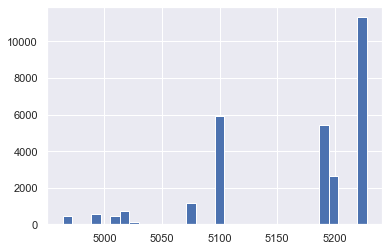

In [170]:
pd.plotting.hist_series(X_train_70['nr.employed'], bins='auto')
plt.show()

In [171]:
X_train_70['nr.employed'].value_counts(sort=True)

5228.1    11328
5099.1     5940
5191.0     5456
5195.8     2626
5076.2     1168
5017.5      732
4991.6      552
5008.7      467
4963.6      438
5023.5      118
5176.3        6
Name: nr.employed, dtype: int64

In [172]:
X_train_70['nr.employed'].describe()

count    28831.000000
mean      5167.110503
std         72.184629
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

In [173]:
outlier_detection(X_train_70['nr.employed'])

(4905.6, 5421.6, 129.0)

We can see from above that this data is not evenly distributed, and imputation by replacement of the median will not change anything here.

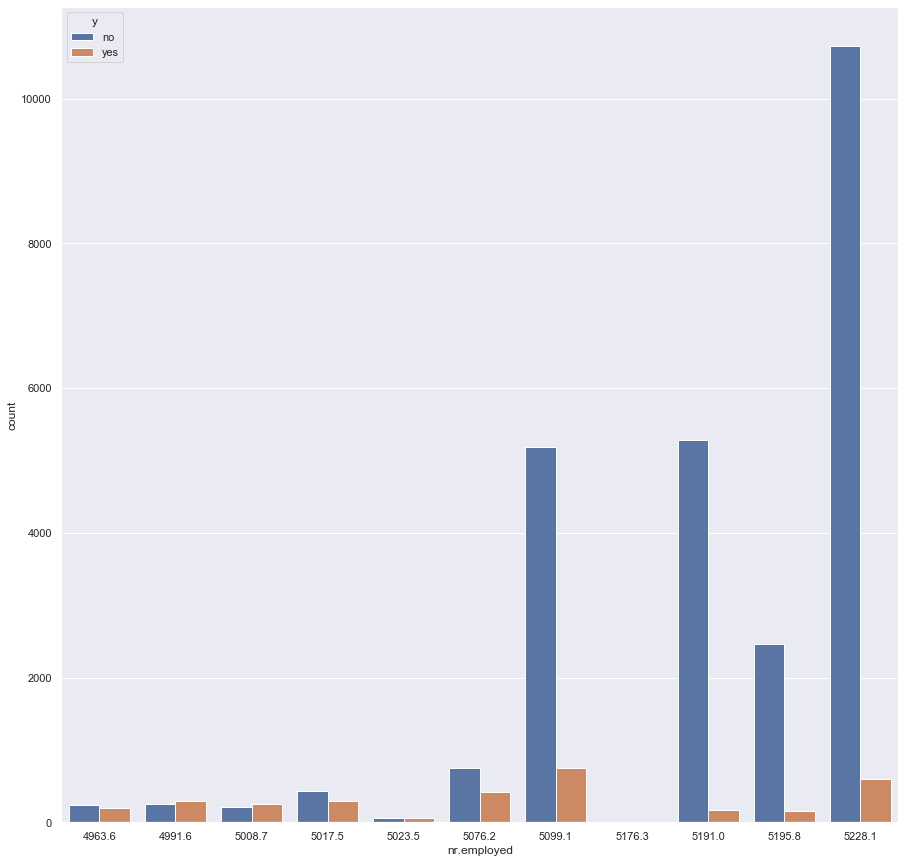

In [174]:
# This graph gives us a little glimps in how 'nr.employed' correlates with or target variable, 'y'.
plt.figure(figsize=(15,15))
sns.countplot(x=X_train_70['nr.employed'], hue=y_train_70, orient="h")
plt.show()

It appears that there is a variability with this variable; therefore, it is necessary to keep it. Let us again look at how transforming changines the distribution of the data and the skewness of each.

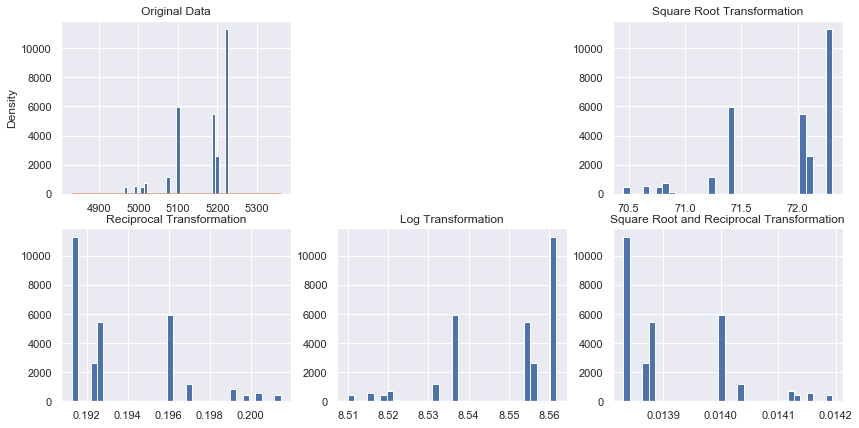

In [175]:
plt.figure(figsize=(14,7))

plt.subplot(231)
ax = pd.plotting.hist_series(X_train_70['nr.employed'], bins='auto')
X_train_70['nr.employed'].plot.kde()
ax.set_title('Original Data')

# plt.subplot(232)
# ax1 = pd.plotting.hist_series(X_train_70['euribor3m'].apply(lambda x: -1*x), bins=8)
# ax1.set_title('Shifted Data')

plt.subplot(233)
ax2 = pd.plotting.hist_series(np.sqrt(X_train_70['nr.employed']), bins='auto')
ax2. set_title('Square Root Transformation')

plt.subplot(234)
ax3 = pd.plotting.hist_series(X_train_70['nr.employed'].apply(lambda x: 1000/x), bins='auto')
ax3.set_title('Reciprocal Transformation')

plt.subplot(235)
ax4 = pd.plotting.hist_series(np.log(X_train_70['nr.employed']), bins='auto')
ax4.set_title('Log Transformation')

plt.subplot(236)
ax5 = pd.plotting.hist_series(np.reciprocal(np.sqrt(X_train_70['nr.employed'])), bins='auto')
ax5.set_title('Square Root and Reciprocal Transformation')

plt.show()

In [176]:
# Original Data
stats.skew(X_train_70['nr.employed'])

-1.04884073545675

In [177]:
# Square Root Transformation
stats.skew(np.sqrt(X_train_70['nr.employed']))

-1.0584924782030087

In [178]:
# Shifted Reciprocal Transformation
stats.skew(X_train_70['nr.employed'].apply(lambda x: 1/x))

1.088015424894736

In [179]:
# Shifted Log Transformation
stats.skew(np.log(X_train_70['nr.employed']))

-1.068238417350391

In [180]:
# Shifted Square Root and Reciprocal Transformation
stats.skew(np.reciprocal(np.sqrt(X_train_70['nr.employed'])))

1.078079192792431

From above, we see that the skew result of the transformations

In [181]:
#Here we perform no imputation since Interquartile method identified no outliers.
# Below we implement the transformations on all the train and test data
X_train_70_log['nr.employed'] = np.log(X_train_70['nr.employed'].copy())

X_train_70_Sqrt['nr.employed'] = np.sqrt(X_train_70['nr.employed'].copy())

X_test_30_log['nr.employed'] = np.log(X_test_30['nr.employed'].copy())

X_test_30_Sqrt['nr.employed'] = np.sqrt(X_test_30['nr.employed'].copy())



X_train_80_log['nr.employed'] = np.log(X_train_80['nr.employed'].copy())

X_train_80_Sqrt['nr.employed'] = np.sqrt(X_train_80['nr.employed'].copy())

X_test_20_log['nr.employed'] = np.log(X_test_20['nr.employed'].copy())

X_test_20_Sqrt['nr.employed'] = np.sqrt(X_test_20['nr.employed'].copy())




In [182]:
X_train_70.describe() #This is the original data description

age      duration      campaign         pdays      previous  \
count  28831.000000  28831.000000  28831.000000  28831.000000  28831.000000   
mean      40.007110    257.374111      2.572578    961.806770      0.172731   
std       10.426822    257.208633      2.781547    188.539509      0.492673   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    178.000000      2.000000    999.000000      0.000000   
75%       47.000000    318.000000      3.000000    999.000000      0.000000   
max       98.000000   3785.000000     56.000000    999.000000      6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  28831.000000    28831.000000   28831.000000  28831.000000  28831.000000  
mean       0.083736       93.577485     -40.508619      3.623916   5167.110503  
std        1.567752        0.576804       4.603943      1.731858     72.184629  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [183]:
X_train_70_imp.describe() #This is the imputed data description  NOTE: 'nr.employed' should not be changed.

age      campaign      previous  emp.var.rate  cons.price.idx  \
count  28831.000000  28831.000000  28831.000000  28831.000000    28831.000000   
mean      39.557664      2.048281      0.172731      0.083736       93.577485   
std        9.616060      1.249527      0.492673      1.567752        0.576804   
min       17.000000      1.000000      0.000000     -3.400000       92.201000   
25%       32.000000      1.000000      0.000000     -1.800000       93.075000   
50%       38.000000      2.000000      0.000000      1.100000       93.749000   
75%       47.000000      3.000000      0.000000      1.400000       93.994000   
max       69.000000      6.000000      6.000000      1.400000       94.767000   

       cons.conf.idx     euribor3m   nr.employed  
count   28831.000000  28831.000000  28831.000000  
mean      -40.508619      3.623916   5167.110503  
std         4.603943      1.731858     72.184629  
min       -50.800000      0.634000   4963.600000  
25%       -42.700000      1.344000   5099.100000  
50%       -41.800000      4.857000   5191.000000  
75%       -36.400000      4.961000   5228.100000  
max       -26.900000      5.045000   5228.100000

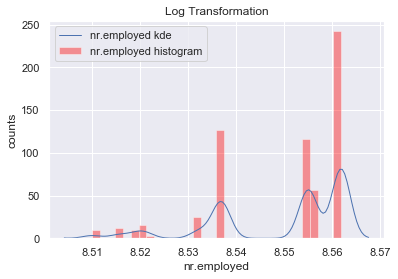

In [184]:
plt.xlabel('nr.employed')
plt.ylabel('counts')
plt.title('Log Transformation')
col = 'nr.employed'
#This shows the distribution of the points
sns.distplot(X_train_70_log['nr.employed'], bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

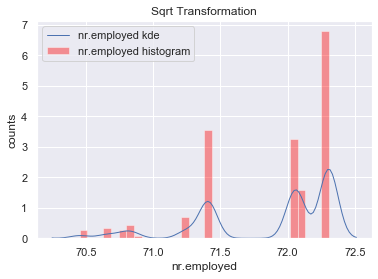

In [185]:
plt.xlabel('nr.employed')
plt.ylabel('counts')
plt.title('Sqrt Transformation')
col = 'nr.employed'
#This shows the distribution of the points
sns.distplot(X_train_70_Sqrt['nr.employed'], bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

### Categorical Data: Object Variables
We have cleaned our continuous values, but as we can see below we have multiple variables that are objects that may need to be cleaned up as well or converted to a different data type.

In [186]:
X_train_70.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [187]:
X_train_70.select_dtypes(include='object')

job  marital            education  default housing loan  \
35451       admin.  married    university.degree       no      no   no   
11069  blue-collar  married              unknown  unknown      no   no   
21233       admin.   single    university.degree       no      no   no   
33258  blue-collar  married             basic.4y       no      no   no   
6529        admin.   single    university.degree  unknown     yes  yes   
...            ...      ...                  ...      ...     ...  ...   
6500    technician  married    university.degree       no      no  yes   
21633       admin.   single    university.degree       no      no  yes   
19857       admin.   single    university.degree       no      no   no   
14528  blue-collar  married              unknown  unknown     yes  yes   
899     technician  married  professional.course       no     yes   no   

         contact month day_of_week     poutcome  
35451   cellular   may         mon  nonexistent  
11069  telephone   jun         wed  nonexistent  
21233   cellular   aug         mon  nonexistent  
33258  telephone   may         tue  nonexistent  
6529   telephone   may         wed  nonexistent  
...          ...   ...         ...          ...  
6500   telephone   may         wed  nonexistent  
21633   cellular   aug         tue  nonexistent  
19857   cellular   aug         fri  nonexistent  
14528   cellular   jul         tue  nonexistent  
899    telephone   may         wed  nonexistent  

[28831 rows x 10 columns]

We will go through each of these variables and see which ones need cleaning as well. Generally, if we have unknown data that makes up less than 3% of the total data, we will use impute with the mode of the data column. If we have unknown data that is greater than 3% of the total data, we will count it as a separate category.
#### The 'job' Column
Let's first look at the 'job' column:

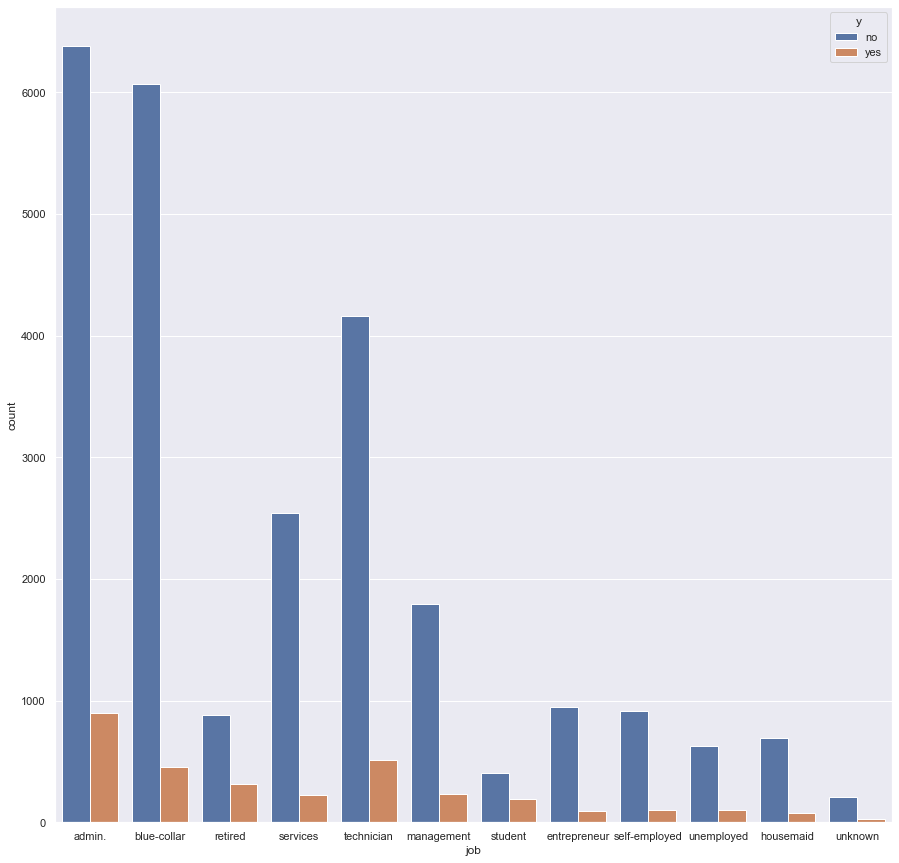

In [188]:
# This graph gives us a little glimps in how 'job' correlates with or target variable, 'y'.
plt.figure(figsize=(15,15))
sns.countplot(x=X_train_70['job'], hue=y_train_70, orient="h")
plt.show()

In [189]:
X_train_70.job.value_counts(sort=True, ascending=False)

admin.           7277
blue-collar      6523
technician       4667
services         2759
management       2023
retired          1197
entrepreneur     1039
self-employed    1021
housemaid         771
unemployed        728
student           594
unknown           232
Name: job, dtype: int64

In [190]:
# Unknown is this much of the total data
print(round(len(X_train_70[X_train_70.job == 'unknown'])/len(X_train_70) * 100, 4), '%')

0.8047 %


Here we will use the mode for imputation because using the mean or median does not make sense.

In [191]:
X_train_70.replace(to_replace={'job':'unknown'}, value='admin.').job.value_counts(sort=True, ascending=False)

admin.           7509
blue-collar      6523
technician       4667
services         2759
management       2023
retired          1197
entrepreneur     1039
self-employed    1021
housemaid         771
unemployed        728
student           594
Name: job, dtype: int64

In [192]:
X_train_70_imp.job = X_train_70.replace(to_replace={'job':'unknown'}, value='admin.').job
X_train_70_imp.job.value_counts(sort=True, ascending=False)

admin.           7509
blue-collar      6523
technician       4667
services         2759
management       2023
retired          1197
entrepreneur     1039
self-employed    1021
housemaid         771
unemployed        728
student           594
Name: job, dtype: int64

In [193]:
# Do the imputation on the rest of the test train data sets
X_test_30_imp.job = X_test_30.replace(to_replace={'job':'unknown'}, value='admin.').job

X_train_80_imp.job = X_train_80.replace(to_replace={'job':'unknown'}, value='admin.').job
X_test_20_imp.job = X_test_20.replace(to_replace={'job':'unknown'}, value='admin.').job

# Apply changes to log and sqrt data sets
X_train_70_log.job = X_train_70_imp.job
X_train_70_Sqrt.job = X_train_70_imp.job
X_test_30_log.job = X_test_30_imp.job
X_test_30_Sqrt.job = X_test_30_imp.job


X_train_80_log.job = X_train_80_imp.job
X_train_80_Sqrt.job = X_train_80_imp.job
X_test_20_log.job = X_test_20_imp.job
X_test_20_Sqrt.job = X_test_20_imp.job



In [194]:
# check random sqrt data set for no 'unknown' values
X_train_80_Sqrt.job.value_counts(sort=True, ascending=False)

admin.           8603
blue-collar      7440
technician       5343
services         3165
management       2311
retired          1365
entrepreneur     1182
self-employed    1164
housemaid         864
unemployed        829
student           684
Name: job, dtype: int64

#### The 'marital' Column
Next, the 'martial' column

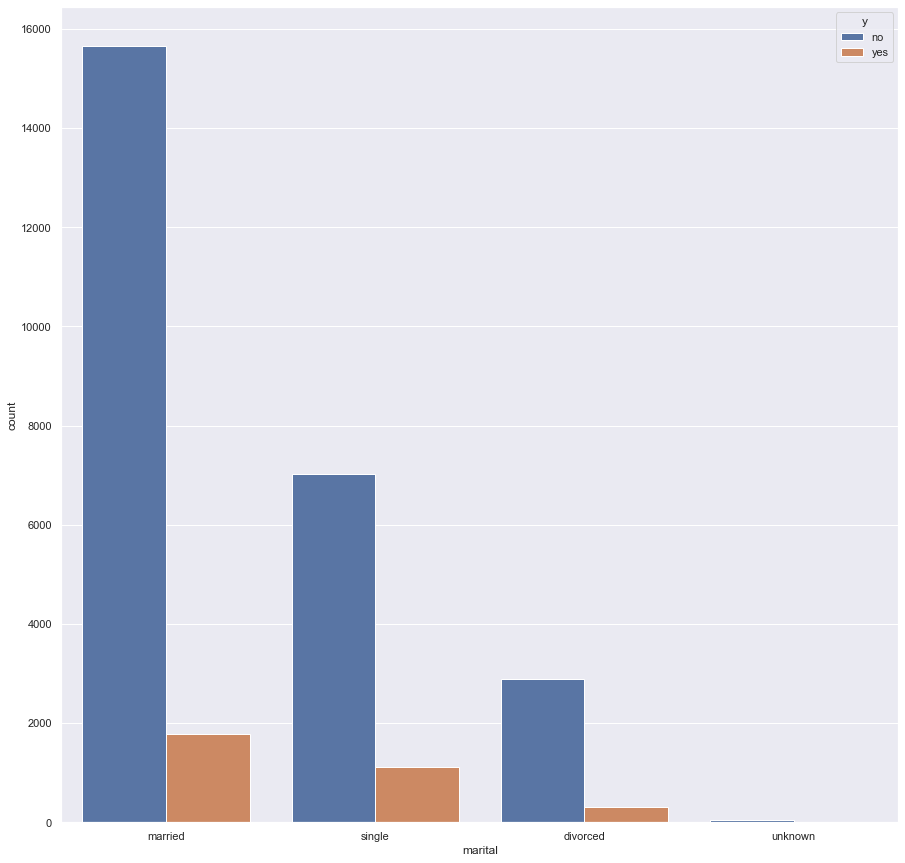

In [195]:
# This graph gives us a little glimps in how 'martial' correlates with or target variable, 'y'.
plt.figure(figsize=(15,15))
sns.countplot(x=X_train_70['marital'], hue=y_train_70, orient="h")
plt.show()

In [196]:
X_train_70.marital.value_counts(sort=True, ascending=False)

married     17433
single       8132
divorced     3215
unknown        51
Name: marital, dtype: int64

In [197]:
# Unknown is this much of the total data
print(round(len(X_train_70[X_train_70.marital == 'unknown'])/len(X_train_70) * 100, 4), '%')

0.1769 %


Here we will use the mode for imputation because using the mean or median does not make sense.

In [198]:
X_train_70.replace(to_replace={'marital':'unknown'}, value='married').marital.value_counts(sort=True, ascending=False)

married     17484
single       8132
divorced     3215
Name: marital, dtype: int64

In [199]:
X_train_70_imp.marital = X_train_70.replace(to_replace={'marital':'unknown'}, value='married').marital
X_train_70_imp.marital.value_counts(sort=True, ascending=False)

married     17484
single       8132
divorced     3215
Name: marital, dtype: int64

In [200]:
# Do the imputation on the rest of the test train data sets
X_test_30_imp.marital = X_test_30.replace(to_replace={'marital':'unknown'}, value='married').marital

X_train_80_imp.marital = X_train_80.replace(to_replace={'marital':'unknown'}, value='married').marital
X_test_20_imp.marital = X_test_20.replace(to_replace={'marital':'unknown'}, value='married').marital

# Apply changes to log and sqrt data sets
X_train_70_log.marital = X_train_70_imp.marital
X_train_70_Sqrt.marital = X_train_70_imp.marital
X_test_30_log.marital = X_test_30_imp.marital
X_test_30_Sqrt.marital = X_test_30_imp.marital


X_train_80_log.marital = X_train_80_imp.marital
X_train_80_Sqrt.marital = X_train_80_imp.marital
X_test_20_log.marital = X_test_20_imp.marital
X_test_20_Sqrt.marital = X_test_20_imp.marital



In [201]:
# check random sqrt data set for no 'unknown' values
X_train_80_Sqrt.marital.value_counts(sort=True, ascending=False)

married     19967
single       9321
divorced     3662
Name: marital, dtype: int64

#### The 'education' Column
Now the 'educaiton' column

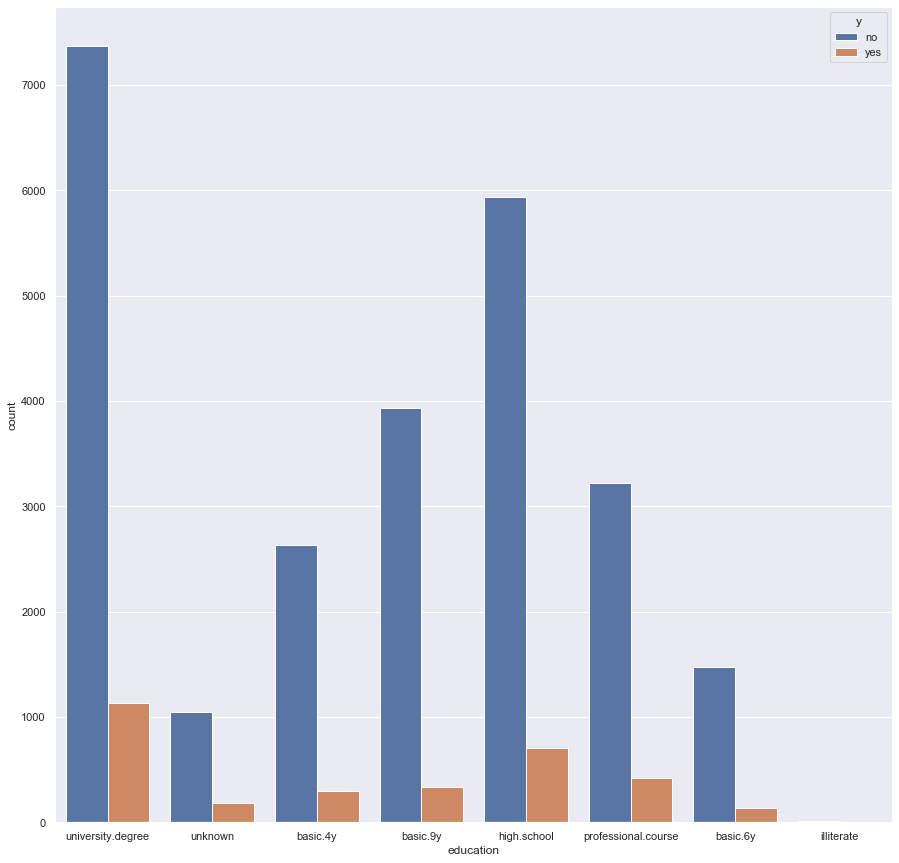

In [202]:
# This graph gives us a little glimps in how 'education' correlates with or target variable, 'y'.
plt.figure(figsize=(15,15))
sns.countplot(x=X_train_70['education'], hue=y_train_70, orient="h")
plt.show()

In [203]:
X_train_70.education.value_counts(sort=True, ascending=False)

university.degree      8506
high.school            6645
basic.9y               4272
professional.course    3638
basic.4y               2925
basic.6y               1606
unknown                1225
illiterate               14
Name: education, dtype: int64

In [204]:
# Unknown is this much of the total data
print(round(len(X_train_70[X_train_70.education == 'unknown'])/len(X_train_70) * 100, 4), '%')

4.2489 %


In [205]:
# illiterate is this much of the total data
print(round(len(X_train_70[X_train_70.education == 'illiterate'])/len(X_train_70) * 100, 4), '%')

0.0486 %


Here we will use the mode for imputation of 'illiterate' instead of 'unknown' as we have done thus far because the 'illiterate' category only accounts for 0.0486%, and the 'unknown' category is bigger than an actual definite category.

In [206]:
X_train_70.replace(to_replace={'education':'illiterate'}, value='university.degree').education.value_counts(sort=True, ascending=False)

university.degree      8520
high.school            6645
basic.9y               4272
professional.course    3638
basic.4y               2925
basic.6y               1606
unknown                1225
Name: education, dtype: int64

In [207]:
X_train_70_imp.education = X_train_70.replace(to_replace={'education':'illiterate'}, value='university.degree').education
X_train_70_imp.education.value_counts(sort=True, ascending=False)

university.degree      8520
high.school            6645
basic.9y               4272
professional.course    3638
basic.4y               2925
basic.6y               1606
unknown                1225
Name: education, dtype: int64

In [208]:
# Do the imputation on the rest of the test train data sets
X_test_30_imp.education = X_test_30.replace(to_replace={'education':'illiterate'}, value='university.degree').education

X_train_80_imp.education = X_train_80.replace(to_replace={'education':'illiterate'}, value='university.degree').education
X_test_20_imp.education = X_test_20.replace(to_replace={'education':'illiterate'}, value='university.degree').education

# Apply changes to log and sqrt data sets
X_train_70_log.education = X_train_70_imp.education
X_train_70_Sqrt.education = X_train_70_imp.education
X_test_30_log.education = X_test_30_imp.education
X_test_30_Sqrt.education = X_test_30_imp.education


X_train_80_log.education = X_train_80_imp.education
X_train_80_Sqrt.education = X_train_80_imp.education
X_test_20_log.education = X_test_20_imp.education
X_test_20_Sqrt.education = X_test_20_imp.education



In [209]:
# check random sqrt data set for no 'illiterate' values
X_train_80_Sqrt.education.value_counts(sort=True, ascending=False)

university.degree      9695
high.school            7620
basic.9y               4853
professional.course    4182
basic.4y               3363
basic.6y               1820
unknown                1417
Name: education, dtype: int64

#### The 'default' Column
Now the 'default' column

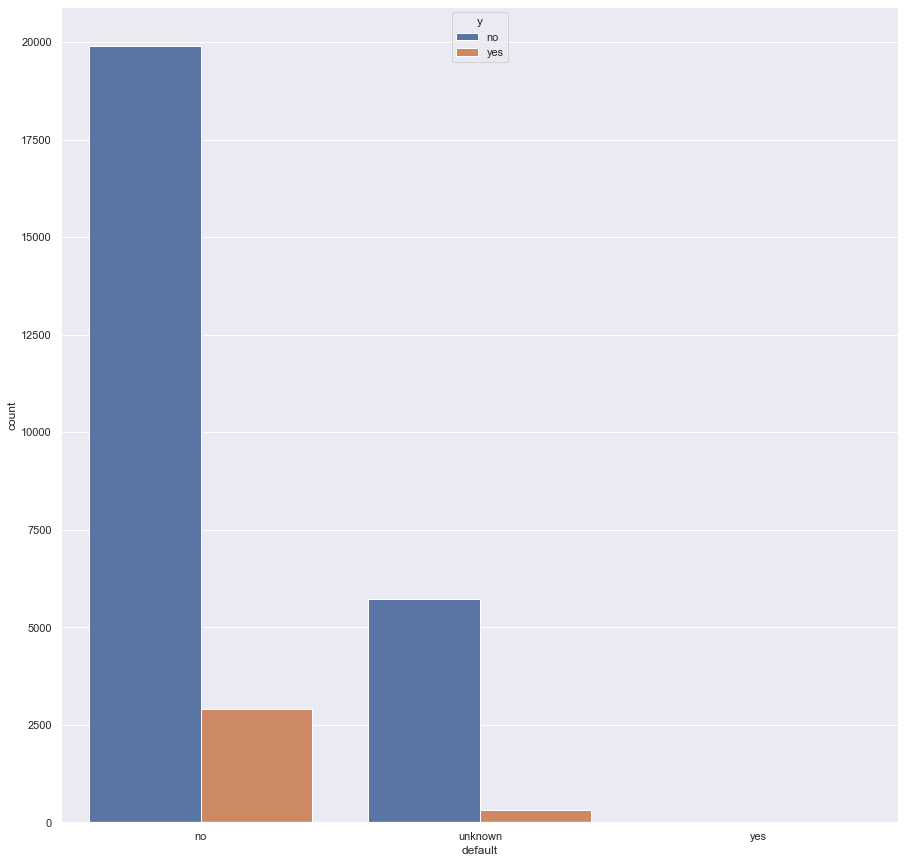

In [210]:
# This graph gives us a little glimps in how 'default' correlates with or target variable, 'y'.
plt.figure(figsize=(15,15))
sns.countplot(x=X_train_70['default'], hue=y_train_70, orient="h")
plt.show()

In [211]:
X_train_70.default.value_counts(sort=True, ascending=False)

no         22802
unknown     6027
yes            2
Name: default, dtype: int64

In [212]:
# 'yes' is this much of the total data
print(round(len(X_train_70[X_train_70.default == 'unknown'])/len(X_train_70) * 100, 4), '%')

20.9046 %


In [213]:
# 'yes' is this much of the total data
print(round(len(X_train_70[X_train_70.default == 'yes'])/len(X_train_70) * 100, 4), '%')

0.0069 %


Here we will use the mode for imputation of 'yes' instead of 'unknown' as we have done thus far because the 'yes' category only accounts for 0.0069%, and the 'unknown' category is bigger than an actual definite category.

In [214]:
X_train_70.replace(to_replace={'default':'yes'}, value='no').default.value_counts(sort=True, ascending=False)

no         22804
unknown     6027
Name: default, dtype: int64

In [215]:
X_train_70_imp.default = X_train_70.replace(to_replace={'default':'yes'}, value='no').default
X_train_70_imp.default.value_counts(sort=True, ascending=False)

no         22804
unknown     6027
Name: default, dtype: int64

In [216]:
# Do the imputation on the rest of the test train data sets
X_test_30_imp.default = X_test_30.replace(to_replace={'default':'yes'}, value='no').default

X_train_80_imp.default = X_train_80.replace(to_replace={'default':'yes'}, value='no').default
X_test_20_imp.default = X_test_20.replace(to_replace={'default':'yes'}, value='no').default

# Apply changes to log and sqrt data sets
X_train_70_log.default = X_train_70_imp.default
X_train_70_Sqrt.default = X_train_70_imp.default
X_test_30_log.default = X_test_30_imp.default
X_test_30_Sqrt.default = X_test_30_imp.default


X_train_80_log.default = X_train_80_imp.default
X_train_80_Sqrt.default = X_train_80_imp.default
X_test_20_log.default = X_test_20_imp.default
X_test_20_Sqrt.default = X_test_20_imp.default



In [217]:
# check random sqrt data set for no 'yes' values
X_train_80_Sqrt.default.value_counts(sort=True, ascending=False)

no         26072
unknown     6878
Name: default, dtype: int64

#### The 'housing' Column
Next, the 'housing' column

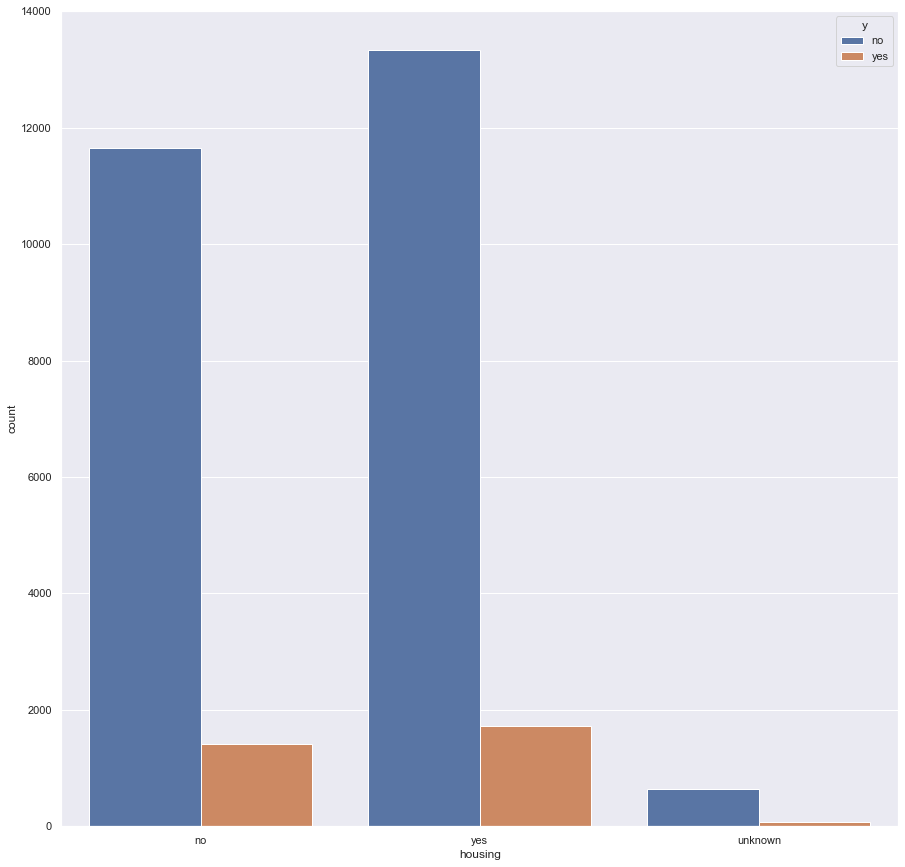

In [218]:
# This graph gives us a little glimps in how 'housing' correlates with or target variable, 'y'.
plt.figure(figsize=(15,15))
sns.countplot(x=X_train_70['housing'], hue=y_train_70, orient="h")
plt.show()

In [219]:
X_train_70.housing.value_counts(sort=True, ascending=False)

yes        15056
no         13070
unknown      705
Name: housing, dtype: int64

In [220]:
# Unknown is this much of the total data
print(round(len(X_train_70[X_train_70.housing == 'unknown'])/len(X_train_70) * 100, 4), '%')

2.4453 %


Here we will use the mode for imputation because using the mean or median does not make sense.

In [221]:
X_train_70.replace(to_replace={'housing':'unknown'}, value='yes').housing.value_counts(sort=True, ascending=False)

yes    15761
no     13070
Name: housing, dtype: int64

In [222]:
X_train_70_imp.housing = X_train_70.replace(to_replace={'housing':'unknown'}, value='yes').housing
X_train_70_imp.housing.value_counts(sort=True, ascending=False)

yes    15761
no     13070
Name: housing, dtype: int64

In [223]:
# Do the imputation on the rest of the test train data sets
X_test_30_imp.housing = X_test_30.replace(to_replace={'housing':'unknown'}, value='yes').housing

X_train_80_imp.housing = X_train_80.replace(to_replace={'housing':'unknown'}, value='yes').housing
X_test_20_imp.housing = X_test_20.replace(to_replace={'housing':'unknown'}, value='yes').housing

# Apply changes to log and sqrt data sets
X_train_70_log.housing = X_train_70_imp.housing
X_train_70_Sqrt.housing = X_train_70_imp.housing
X_test_30_log.housing = X_test_30_imp.housing
X_test_30_Sqrt.housing = X_test_30_imp.housing


X_train_80_log.housing = X_train_80_imp.housing
X_train_80_Sqrt.housing = X_train_80_imp.housing
X_test_20_log.housing = X_test_20_imp.housing
X_test_20_Sqrt.housing = X_test_20_imp.housing



In [224]:
# check random sqrt data set for no 'unknown' values
X_train_80_Sqrt.housing.value_counts(sort=True, ascending=False)

yes    18036
no     14914
Name: housing, dtype: int64

#### The 'loan' Column
Next, the 'loan' column

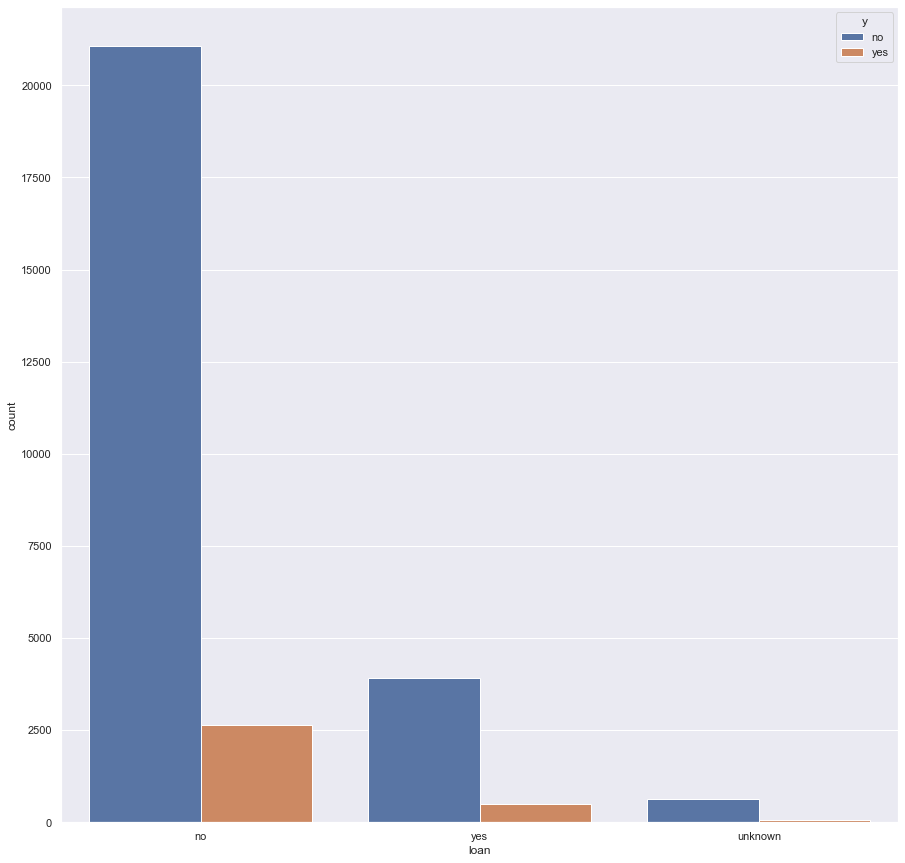

In [225]:
# This graph gives us a little glimps in how 'loan' correlates with or target variable, 'y'.
plt.figure(figsize=(15,15))
sns.countplot(x=X_train_70['loan'], hue=y_train_70, orient="h")
plt.show()

In [226]:
X_train_70.loan.value_counts(sort=True, ascending=False)

no         23707
yes         4419
unknown      705
Name: loan, dtype: int64

In [227]:
# Unknown is this much of the total data
print(round(len(X_train_70[X_train_70.loan == 'unknown'])/len(X_train_70) * 100, 4), '%')

2.4453 %


Here we will use the mode for imputation because using the mean or median does not make sense.

In [228]:
X_train_70.replace(to_replace={'loan':'unknown'}, value='no').loan.value_counts(sort=True, ascending=False)

no     24412
yes     4419
Name: loan, dtype: int64

In [229]:
X_train_70_imp.loan = X_train_70.replace(to_replace={'loan':'unknown'}, value='no').loan
X_train_70_imp.loan.value_counts(sort=True, ascending=False)

no     24412
yes     4419
Name: loan, dtype: int64

In [230]:
# Do the imputation on the rest of the test train data sets
X_test_30_imp.loan = X_test_30.replace(to_replace={'loan':'unknown'}, value='no').loan

X_train_80_imp.loan = X_train_80.replace(to_replace={'loan':'unknown'}, value='no').loan
X_test_20_imp.loan = X_test_20.replace(to_replace={'loan':'unknown'}, value='no').loan

# Apply changes to log and sqrt data sets
X_train_70_log.loan = X_train_70_imp.loan
X_train_70_Sqrt.loan = X_train_70_imp.loan
X_test_30_log.loan = X_test_30_imp.loan
X_test_30_Sqrt.loan = X_test_30_imp.loan


X_train_80_log.loan = X_train_80_imp.loan
X_train_80_Sqrt.loan = X_train_80_imp.loan
X_test_20_log.loan = X_test_20_imp.loan
X_test_20_Sqrt.loan = X_test_20_imp.loan


In [231]:
# check random sqrt data set for no 'unknown' values
X_train_80_Sqrt.loan.value_counts(sort=True, ascending=False)

no     27921
yes     5029
Name: loan, dtype: int64

#### The 'contact' Column
Next, the 'contact' column

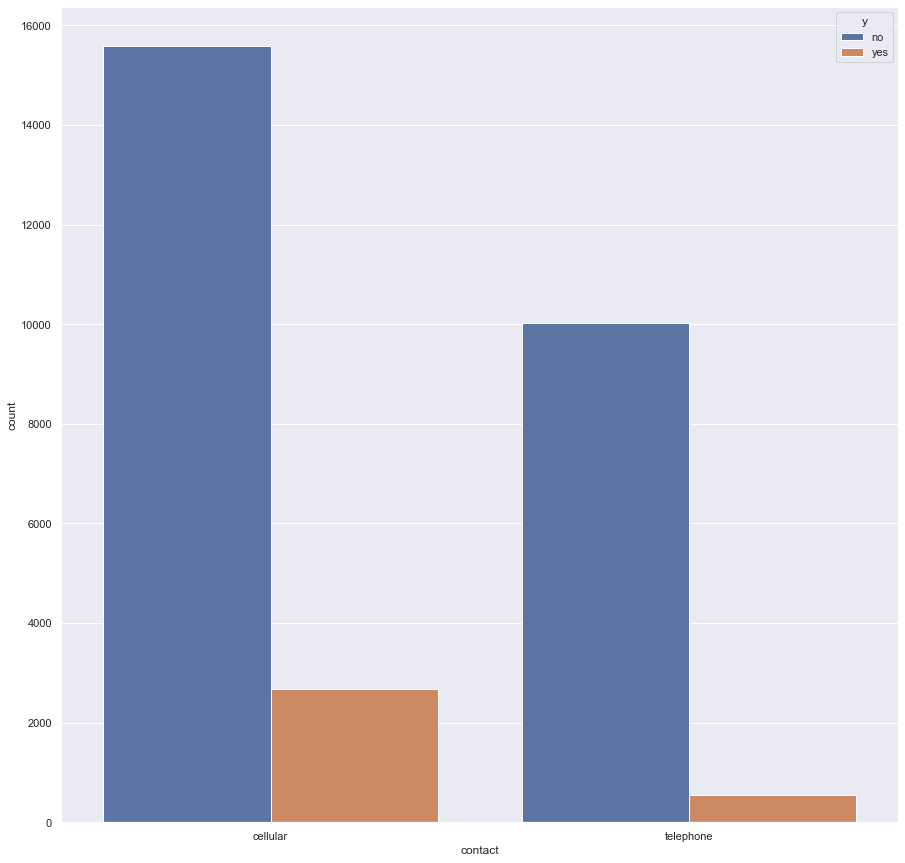

In [232]:
# This graph gives us a little glimps in how 'contact' correlates with or target variable, 'y'.
plt.figure(figsize=(15,15))
sns.countplot(x=X_train_70['contact'], hue=y_train_70, orient="h")
plt.show()

Here, no imputation is needed since there is no 'unknown' category, and the unknown category is bigger than an actual category.

In [233]:
X_train_70.contact.value_counts(sort=True, ascending=False) # Here is the distribution for reference.

cellular     18258
telephone    10573
Name: contact, dtype: int64

#### The 'month' Column
Next, the 'month' column

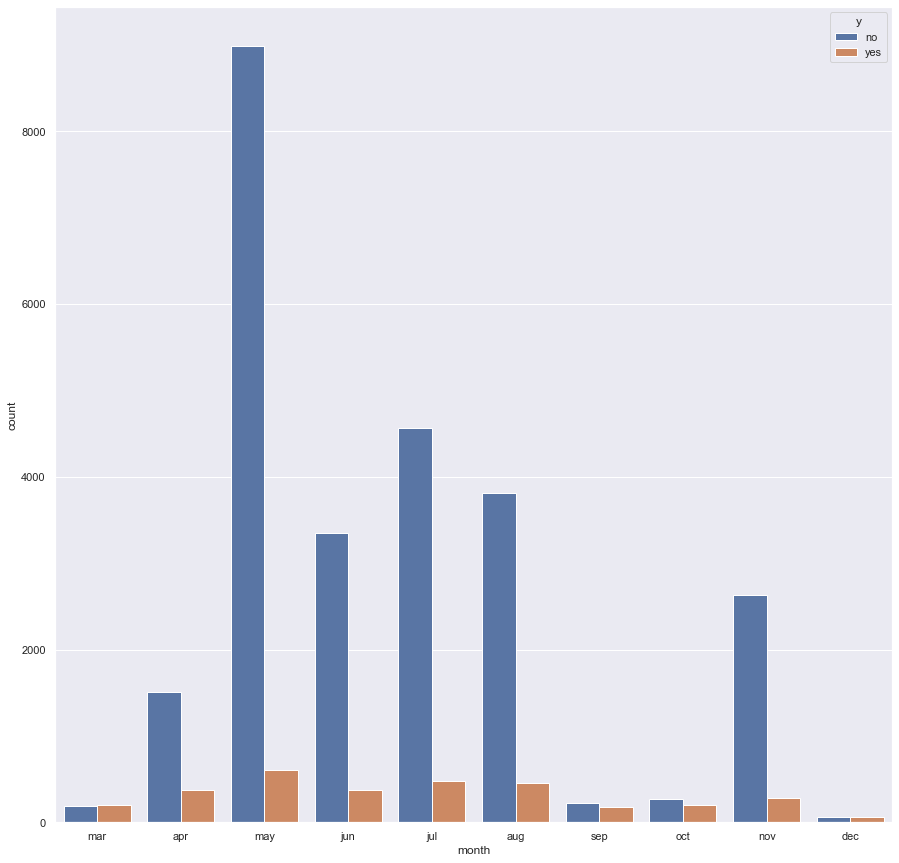

In [234]:
# This graph gives us a little glimps in how 'month' correlates with or target variable, 'y'.
plt.figure(figsize=(15,15))
sns.countplot(x=X_train_70['month'], hue=y_train_70, orient="h", 
              order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.show()

Here, no imputation is needed since there is no 'unknown' category.

In [235]:
X_train_70.month.value_counts(sort=True, ascending=False) # Here is the distribution for reference.

may    9597
jul    5047
aug    4267
jun    3734
nov    2915
apr    1883
oct     481
sep     400
mar     383
dec     124
Name: month, dtype: int64

#### The 'day_of_week' Column
Next, the 'day_of_week' column

In [236]:
# This graph gives us a little glimps in how 'day_of_week' correlates with or target variable, 'y'.
plt.figure(figsize=(15,15))
sns.countplot(x=X_train_70['day_of_week'], hue=y_train_70, orient="h")
plt.show()

Here, no imputation is needed since there is no 'unknown' category.

In [237]:
X_train_70.day_of_week.value_counts(sort=True, ascending=False) # Here is the distribution for reference.

thu    6048
mon    5866
wed    5727
tue    5637
fri    5553
Name: day_of_week, dtype: int64

#### The 'poutcome' Column
Next, the 'poutcome' column

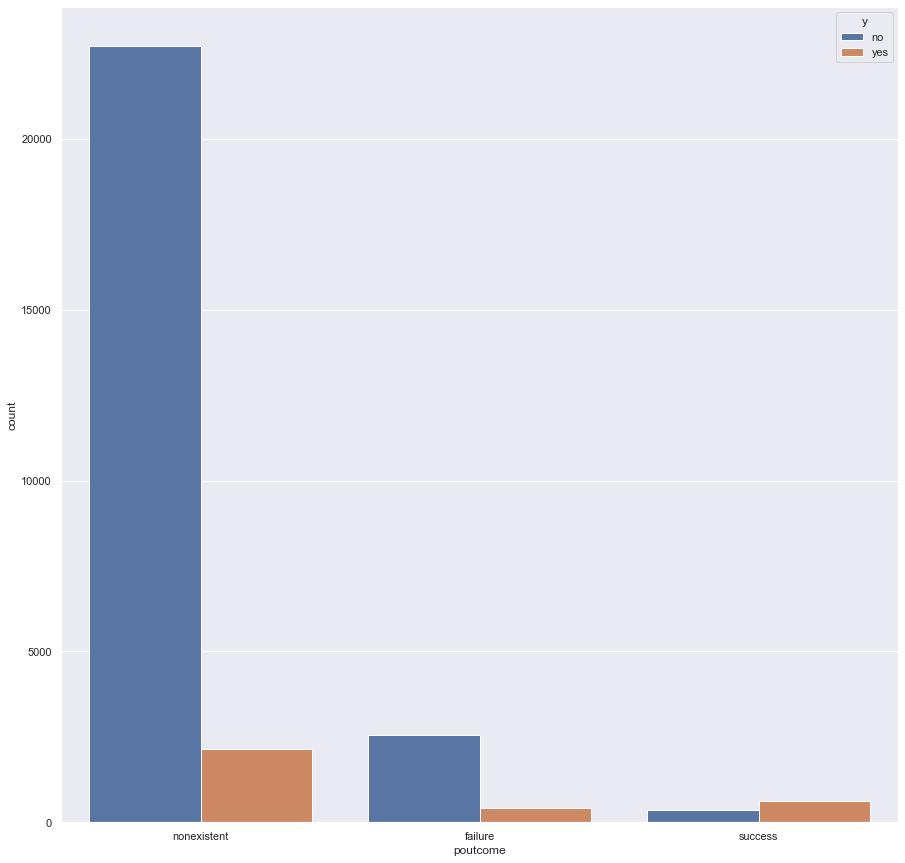

In [238]:
# This graph gives us a little glimps in how 'poutcome' correlates with or target variable, 'y'.
plt.figure(figsize=(15,15))
sns.countplot(x=X_train_70['poutcome'], hue=y_train_70, orient="h")
plt.show()

Here, no imputation is needed since there is no 'unknown' category.

In [239]:
X_train_70.poutcome.value_counts(sort=True, ascending=False) # Here is the distribution for reference.

nonexistent    24887
failure         2974
success          970
Name: poutcome, dtype: int64

In [240]:
# Below shows the number of 'unknown' str values in each column
X_train_70.select_dtypes(include='object').apply(lambda x: x.str.count('unknown')).sum() #Before imputation of unknown values

job             232
marital          51
education      1225
default        6027
housing         705
loan            705
contact           0
month             0
day_of_week       0
poutcome          0
dtype: int64

In [241]:
# Below shows the number of 'unknown' str values in each column
X_train_70_imp.select_dtypes(include='object').apply(lambda x: x.str.count('unknown')).sum() #after imputation of select columns

job               0
marital           0
education      1225
default        6027
housing           0
loan              0
contact           0
month             0
day_of_week       0
poutcome          0
dtype: int64

In [242]:
# Below shows the number of 'unknown' str values in each column
X_train_80_Sqrt.select_dtypes(include='object').apply(lambda x: x.str.count('unknown')).sum() #after imputation of select columns

job               0
marital           0
education      1417
default        6878
housing           0
loan              0
contact           0
month             0
day_of_week       0
poutcome          0
dtype: int64

From above, we see that only 'education' and 'default' have 'unknown' values remaining which confirms what we did above.

### More Data Exploration
#### The 'job', 'education', and 'y' Columns Bar Graphs
We will take a quick look at 'job', 'education', and 'y' columns to get a better idea who would open a term deposit

In [243]:
# First we have to join together our target variable, 'y', and the 'job' and 'education' features.
pd.concat([X_train_70_imp.loc[:, ['job', 'education']], y_train_70], axis=1)

job            education   y
35451       admin.    university.degree  no
11069  blue-collar              unknown  no
21233       admin.    university.degree  no
33258  blue-collar             basic.4y  no
6529        admin.    university.degree  no
...            ...                  ...  ..
6500    technician    university.degree  no
21633       admin.    university.degree  no
19857       admin.    university.degree  no
14528  blue-collar              unknown  no
899     technician  professional.course  no

[28831 rows x 3 columns]

Thanks to [Serenity](https://stackoverflow.com/questions/44880444/how-to-increase-the-font-size-of-the-legend-in-my-seaborn-plot#comment101763170_44882373), [Martin](https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib), and inspiration from [Tarek Dib](https://github.com/TarekDib03/titanic-EDA/blob/master/Titanic%20-%20Project.ipynb), we are able to create the below visuals:

In [244]:
sns.set(font_scale=1.5) #this sets the font size of the graph
graph = sns.catplot(x='education', hue='job', row='y', orient="h",
            data=pd.concat([X_train_70_imp.loc[:, ['job', 'education']], y_train_70], axis=1),
            kind='count', height=5, aspect=2.25, sharey=True, row_order=['yes', 'no'])
plt.setp(graph._legend.get_title(), fontsize=20) #this resizes the legend font size

# here we rotate all the labels
for axes in graph.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right')
    axes.set_title(axes.get_title().split()[-1].title())
    
plt.show()

From the above graph we can kind of see that 'unknown', 'basic.4y', 'basic.9y', 'high.school', 'professional.course', 'basic.6y' had more success than the other 'education' values. We will confrim this below:

In [245]:
# Here we group the data by 'job' and 'education', and we see if we can extract the specific 'yes' and 'no' distribution
# for a certain 'job' and 'education'
pd.concat([X_train_70_imp.loc[:, ['job', 'education']], y_train_70], 
          axis=1).groupby(by=['education', 'job']).get_group(('university.degree', 'admin.'))['y'].value_counts()

no     3485
yes     556
Name: y, dtype: int64

In [246]:
# We replicate what we observe from above by first creating our group dataframe
df_group = pd.concat([X_train_70_imp.loc[:, ['job', 'education']], y_train_70], 
          axis=1)

# Here we group all the data
group = df_group.groupby(by=['education', 'job'])

# Below we loop through all the different values for the 'education' and 'job' column
for education in df_group.education.unique():
    for job in df_group.job.unique():
        
        # Here we get the number of 'yes' and 'no's
        result = pd.concat([X_train_70_imp.loc[:,['job', 'education']], y_train_70],
                            axis=1).groupby(by=['education', 'job']).get_group((education, job))['y'].value_counts()
        
        if len(result) == 2: # if there are both 'yes' and 'no' values, continue
            if result.index[0] == 'yes': # if the first value are 'yes' values, continue
                percent = round((result[0])/(result[0]+result[1])*100.0, 2) # percent of 'yes' values i.e. yes/(yes+no) * 100
                if percent >= 30: #if percent is greater than 30% continue
                    print(education, job, percent, '% {}'.format(result.index[0]))
            elif result.index[1] == 'yes':# if the second value are 'yes' values, continue
                percent = round((result[1])/(result[0]+result[1])*100.0, 2) # percent of 'yes' values i.e. yes/(yes+no) * 100
                if percent >= 30:  #if percent is greater than 30% continue
                    print(education, job, percent, '% {}'.format(result.index[1]))
        elif result.index[0] == 'yes': #if the one (and only) value is 'yes', continue
            percent = round(result[0]/result[0] * 100.0, 2) # percent of 'yes' values i.e. yes/(yes+no) * 100
            if percent >= 30:#if percent is greater than 30% continue
                print(education, job, percent, '% {}'.format(result.index[0]))

unknown retired 32.35 % yes
unknown student 36.59 % yes
unknown unemployed 30.0 % yes
basic.4y retired 30.0 % yes
basic.4y student 37.5 % yes
basic.9y student 33.87 % yes
high.school student 32.24 % yes
professional.course student 47.83 % yes
basic.6y student 55.56 % yes


In [247]:
# Here we double check that 5/9 is ~ 56% for 'basic.6y' and 'student'
result = pd.concat([X_train_70_imp.loc[:,['job', 'education']], y_train_70],
                            axis=1).groupby(by=['education', 'job']).get_group(('unknown', 'student'))['y'].value_counts()
result

no     78
yes    45
Name: y, dtype: int64

In [248]:
# Here we narrow our initial graph to three top 'job' values
sns.set(font_scale=1.5)
graph = sns.catplot(x='education', hue='job', row='y', orient="h",
            data=pd.concat([X_train_70_imp.loc[:, ['job', 'education']], y_train_70], axis=1),
            kind='count', height=5, aspect=2.25, sharey=True, hue_order=['retired', 'student', 'unemployed'],
            order=['unknown', 'basic.4y', 'basic.9y', 'high.school', 'professional.course', 'basic.6y'], row_order=['yes', 'no'])
plt.setp(graph._legend.get_title(), fontsize=20)
for axes in graph.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right')
    axes.set_title(axes.get_title().split()[-1].title())
    
plt.show()

In [249]:
# Here we make a dataframe of those top 3 job and education pairs
data = pd.concat([X_train_70_imp.loc[:, ['job', 'education']], y_train_70], axis=1)
data_y = data[data['y']=='yes']
data_y

job            education    y
39488        retired             basic.4y  yes
35117     management    university.degree  yes
40574     management    university.degree  yes
34364  self-employed  professional.course  yes
37133     management    university.degree  yes
...              ...                  ...  ...
27818        retired             basic.4y  yes
14553    blue-collar             basic.4y  yes
26246    blue-collar             basic.9y  yes
36166     management    university.degree  yes
36169        retired    university.degree  yes

[3207 rows x 3 columns]

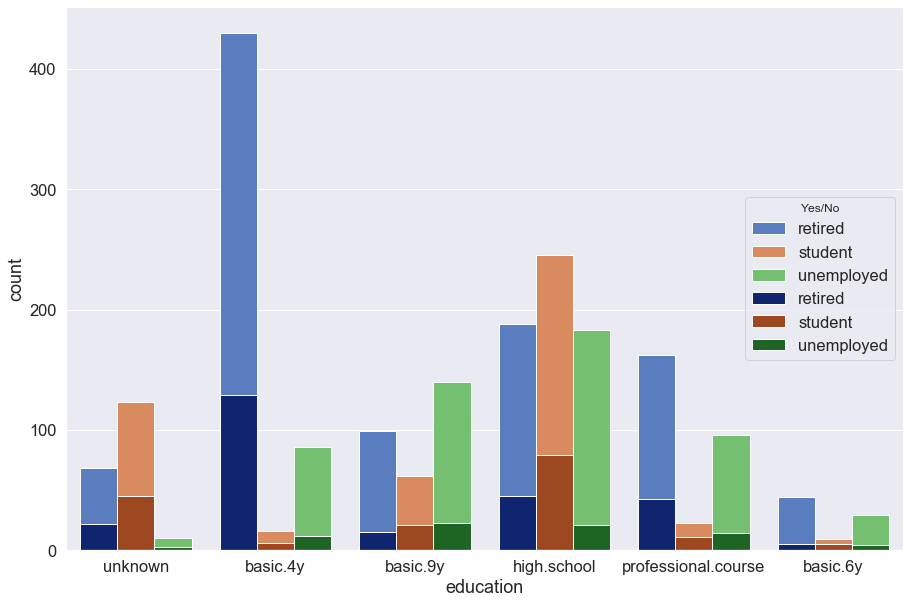

In [250]:
# Here we show the amount of 'yes' out of total counts
plt.figure(figsize=(15,10))
sns.set(style='darkgrid', font_scale=1.5)
graph = sns.countplot(x='education', hue='job', data=data,
             hue_order=['retired', 'student', 'unemployed'],
             order=['unknown', 'basic.4y', 'basic.9y', 'high.school', 'professional.course', 'basic.6y'], palette='muted')
sns.countplot(x='education', hue='job', data=data_y,
             hue_order=['retired', 'student', 'unemployed'],
             order=['unknown', 'basic.4y', 'basic.9y', 'high.school', 'professional.course', 'basic.6y'], 
             palette=sns.color_palette('dark'))
plt.legend(loc=5).set_title('Yes')
plt.show()

In [251]:
# Here we are able to get the 'freq','count', 'top' for each job-education pair.
grouped = data.groupby(['education', 'job'], as_index=False).describe()
grouped

job                             education                            y  \
   count unique            top  freq     count unique       top  freq count   
0     98      1         admin.    98        98      1  basic.4y    98    98   
1   1605      1    blue-collar  1605      1605      1  basic.4y  1605  1605   
2    100      1   entrepreneur   100       100      1  basic.4y   100   100   
3    333      1      housemaid   333       333      1  basic.4y   333   333   
4     61      1     management    61        61      1  basic.4y    61    61   
..   ...    ...            ...   ...       ...    ...       ...   ...   ...   
72    23      1  self-employed    23        23      1   unknown    23    23   
73   106      1       services   106       106      1   unknown   106   106   
74   123      1        student   123       123      1   unknown   123   123   
75   136      1     technician   136       136      1   unknown   136   136   
76    10      1     unemployed    10        10      1   unknown    10    10   

                     
   unique top  freq  
0       2  no    87  
1       2  no  1522  
2       2  no    94  
3       2  no   299  
4       2  no    57  
..    ...  ..   ...  
72      2  no    21  
73      2  no    92  
74      2  no    78  
75      2  no   118  
76      2  no     7  

[77 rows x 12 columns]

In [252]:
# Extract the columns for column renaming
grouped.columns

MultiIndex([(      'job',  'count'),
            (      'job', 'unique'),
            (      'job',    'top'),
            (      'job',   'freq'),
            ('education',  'count'),
            ('education', 'unique'),
            ('education',    'top'),
            ('education',   'freq'),
            (        'y',  'count'),
            (        'y', 'unique'),
            (        'y',    'top'),
            (        'y',   'freq')],
           )

In [253]:
# Create new column names
new_col_names = []
for level, index in grouped.columns:

        new_col_names.append(level+'_'+index)

new_col_names

['job_count',
 'job_unique',
 'job_top',
 'job_freq',
 'education_count',
 'education_unique',
 'education_top',
 'education_freq',
 'y_count',
 'y_unique',
 'y_top',
 'y_freq']

In [254]:
# Set new column names
grouped.columns = new_col_names
grouped

job_count job_unique        job_top job_freq education_count  \
0         98          1         admin.       98              98   
1       1605          1    blue-collar     1605            1605   
2        100          1   entrepreneur      100             100   
3        333          1      housemaid      333             333   
4         61          1     management       61              61   
..       ...        ...            ...      ...             ...   
72        23          1  self-employed       23              23   
73       106          1       services      106             106   
74       123          1        student      123             123   
75       136          1     technician      136             136   
76        10          1     unemployed       10              10   

   education_unique education_top education_freq y_count y_unique y_top y_freq  
0                 1      basic.4y             98      98        2    no     87  
1                 1      basic.4y           1605    1605        2    no   1522  
2                 1      basic.4y            100     100        2    no     94  
3                 1      basic.4y            333     333        2    no    299  
4                 1      basic.4y             61      61        2    no     57  
..              ...           ...            ...     ...      ...   ...    ...  
72                1       unknown             23      23        2    no     21  
73                1       unknown            106     106        2    no     92  
74                1       unknown            123     123        2    no     78  
75                1       unknown            136     136        2    no    118  
76                1       unknown             10      10        2    no      7  

[77 rows x 12 columns]

In [255]:
# We see that a majority of 'y_top' is 'no'
grouped['y_top'].value_counts()

no     76
yes     1
Name: y_top, dtype: int64

In [256]:
grouped[grouped['y_top']=='yes'] # this is the index where the single 'yes' for 'y_top' occurs

job_count job_unique  job_top job_freq education_count education_unique  \
19         9          1  student        9               9                1   

   education_top education_freq y_count y_unique y_top y_freq  
19      basic.6y              9       9        2   yes      5

In [257]:
# Here we get a precentage of 'no' that occur in the total count
grouped.loc[:, 'no'] = np.array(grouped['y_freq'])/np.array(grouped['y_count'])

In [258]:
# Here we get a precentage of 'yes' that occur in the total count
grouped.loc[19, 'no'] = 1-grouped.loc[19, 'no']

In [259]:
grouped[grouped['y_top']=='yes'] # we show how we added a new column with precentage of 'no'

job_count job_unique  job_top job_freq education_count education_unique  \
19         9          1  student        9               9                1   

   education_top education_freq y_count y_unique y_top y_freq        no  
19      basic.6y              9       9        2   yes      5  0.444444

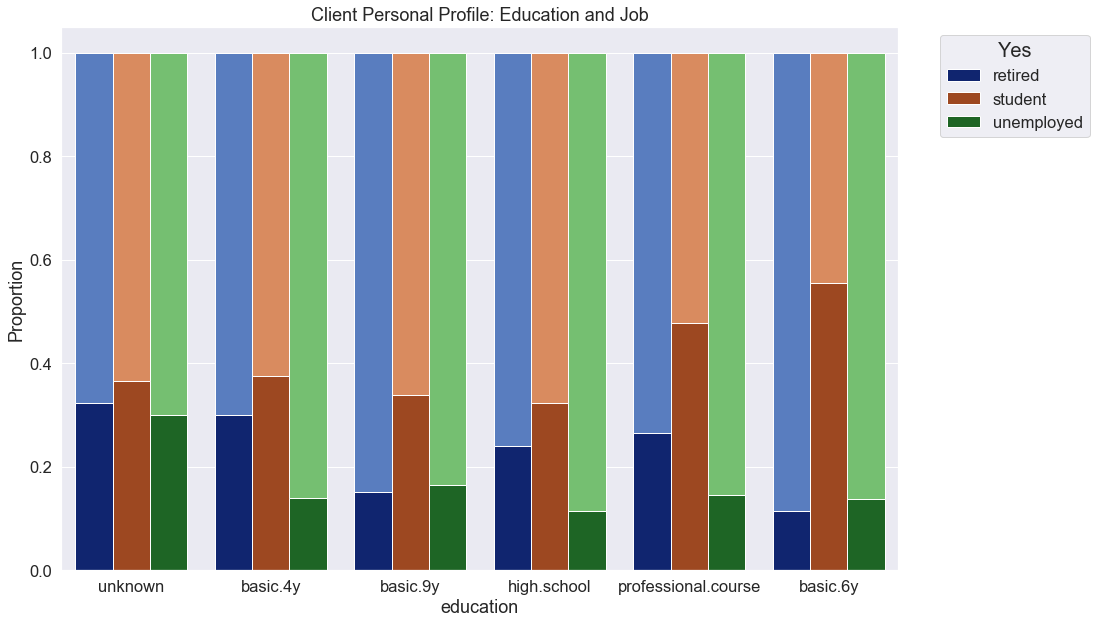

In [261]:
plt.figure(figsize=(15,10))
sns.set(style='darkgrid', font_scale=1.5)
chart = sns.barplot(x='education_top', y=grouped.job_unique, hue='job_top', data=grouped,
             hue_order=['retired', 'student', 'unemployed'],
             order=['unknown', 'basic.4y', 'basic.9y', 'high.school', 'professional.course', 'basic.6y'], palette='muted')
sns.barplot(x='education_top', y=1-np.array(grouped.no), hue='job_top', data=grouped,
             hue_order=['retired', 'student', 'unemployed'],
             order=['unknown', 'basic.4y', 'basic.9y', 'high.school', 'professional.course', 'basic.6y'], 
             palette=sns.color_palette('dark'), ax=chart)

#Below we must extract the handles and labels from our data to limit which ones are seen in our legend
artist_labels, legened_labels = chart.get_legend_handles_labels() # This outputs handles, and labels
plt.legend(bbox_to_anchor=(1.04,1), handles=artist_labels[3:6], labels=legened_labels[3:6], loc="upper left", title='Yes', 
           title_fontsize=20)

plt.title('Client Personal Profile: Education and Job')
plt.xlabel('education')
plt.ylabel('Proportion')
plt.show()

plt.figure(figsize=(15,10))
sns.set(style='darkgrid', font_scale=1.5)
graph = sns.countplot(x='education', hue='job', data=data,
             hue_order=['retired', 'student', 'unemployed'],
             order=['unknown', 'basic.4y', 'basic.9y', 'high.school', 'professional.course', 'basic.6y'], palette='muted')
sns.countplot(x='education', hue='job', data=data_y,
             hue_order=['retired', 'student', 'unemployed'],
             order=['unknown', 'basic.4y', 'basic.9y', 'high.school', 'professional.course', 'basic.6y'], 
             palette=sns.color_palette('dark'))
#Below we must extract the handles and labels from our data to limit which ones are seen in our legend
artist_labels, legened_labels = graph.get_legend_handles_labels() # This outputs handles, and labels
plt.legend(bbox_to_anchor=(1.04,1), handles=artist_labels[3:6], labels=legened_labels[3:6], loc="upper left", title='Yes', 
           title_fontsize=20)
plt.title('Client Personal Profile: Education and Job Count')
plt.show()

From this graph, we can see that we have >= 30% chance of the below individuals with the 'job'-'eduation' pair will sign up for a term deposit:

1. unknown retired 32.35%
2. unknown student 36.59% 
3. unknown unemployed 30.0%


4. basic.4y retired 30.0%
5. basic.4y student 37.5%


6. basic.9y student 33.87%


7. high.school student 32.24%
8. professional.course student 47.83%


9. basic.6y student 55.56%

#### The 'age', 'job', and 'education' Columns Violin Plots
continuing what we learned from above, let us visualize the distribution of 'age' for 'job' and 'education'

In [262]:
# First we have to join together our target variable, 'y', and the 'job' and 'age' features.
pd.concat([X_train_70_imp.loc[:, ['age', 'job', 'education']], y_train_70], axis=1)

age          job            education   y
35451   31       admin.    university.degree  no
11069   42  blue-collar              unknown  no
21233   35       admin.    university.degree  no
33258   42  blue-collar             basic.4y  no
6529    42       admin.    university.degree  no
...    ...          ...                  ...  ..
6500    34   technician    university.degree  no
21633   45       admin.    university.degree  no
19857   30       admin.    university.degree  no
14528   39  blue-collar              unknown  no
899     46   technician  professional.course  no

[28831 rows x 4 columns]

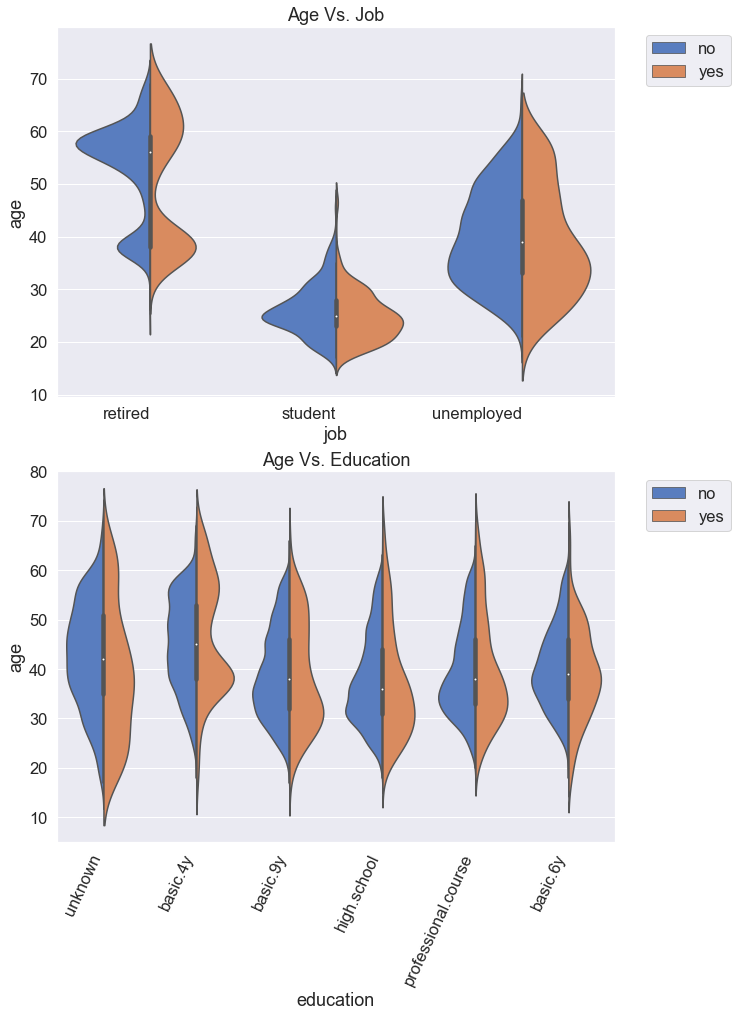

In [263]:
plt.figure(figsize=(10,15))
ax1 = plt.subplot(2,1,1)
chart = sns.violinplot(x="job", y="age", hue="y", 
               data=pd.concat([X_train_70_imp.loc[:, ['age', 'job', 'education']], y_train_70], axis=1),
                       palette="muted", split=True, order=['retired', 'student', 'unemployed'], ax=ax1)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.title('Age Vs. Job')

ax2 = plt.subplot(2,1,2)
chart = sns.violinplot(x="education", y="age", hue="y", 
               data=pd.concat([X_train_70_imp.loc[:, ['age', 'job', 'education']], y_train_70], axis=1), palette="muted", 
                       split=True,
                       order=['unknown', 'basic.4y', 'basic.9y', 'high.school', 'professional.course', 'basic.6y'], ax=ax2)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
chart.set_xticklabels(chart.get_xticklabels(), rotation=65, horizontalalignment='right')
plt.title('Age Vs. Education')

plt.show()

From the above, we can uncover which 'age' range would be most likely to be within that >= 30% chance of the individuals with the 'job'-'eduation' pair that will sign up for a term deposit.

#### The 'previous',  'month', and 'y' Columns Combined Point Plot and Bar Graphs
Finally, we will look at if calling a potential client an increasing amount of times on certain months leads to more term deposits opened.

In [264]:
# First we have to join together our target variable, 'y', and the 'job' and 'age' features.
pd.concat([X_train_70_imp.loc[:, ['previous', 'month']], y_train_70], axis=1)

previous month   y
35451         0   may  no
11069         0   jun  no
21233         0   aug  no
33258         0   may  no
6529          0   may  no
...         ...   ...  ..
6500          0   may  no
21633         0   aug  no
19857         0   aug  no
14528         0   jul  no
899           0   may  no

[28831 rows x 3 columns]

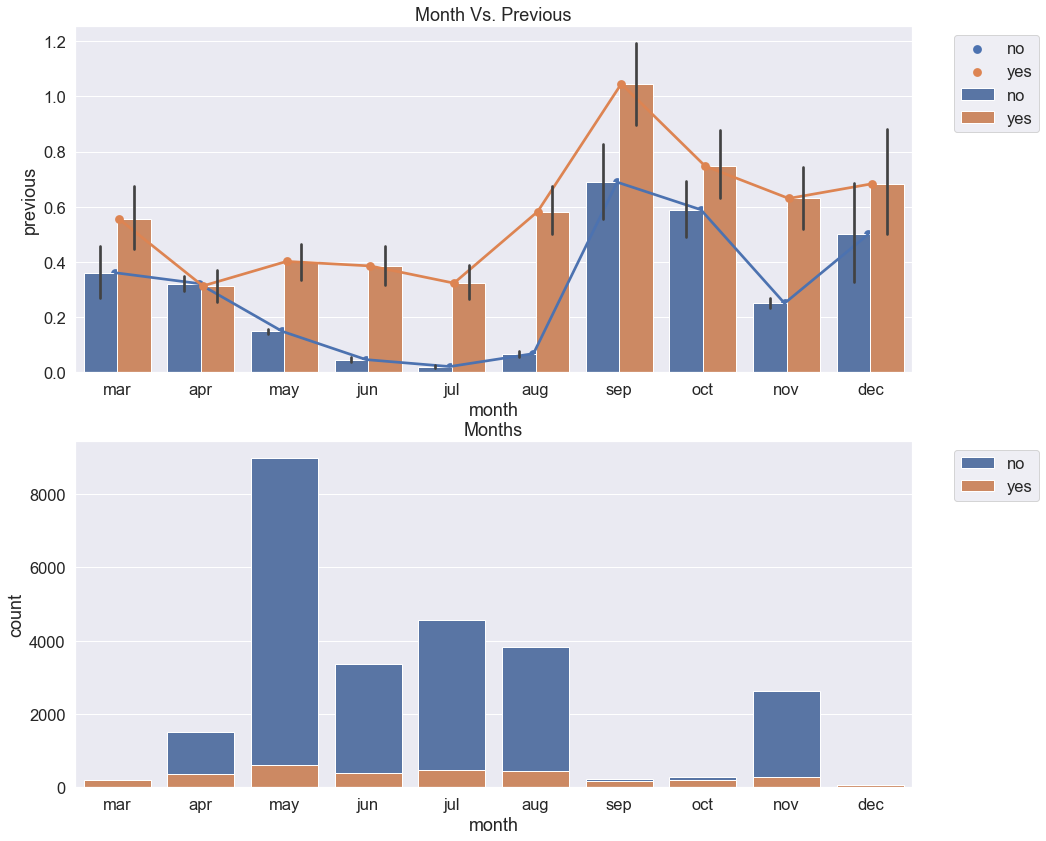

In [265]:
plt.figure(figsize=(15,14))
ax1 = plt.subplot(2,1,1)
sns.pointplot('month', 'previous', hue='y', 
              data=pd.concat([X_train_70_imp.loc[:, ['previous', 'month']], y_train_70], axis=1),
             order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
             dodge=True, ax=ax1, ci=None)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Month Vs. Previous')

# ax2 = plt.subplot(2,1,1)
sns.barplot(x='month', y='previous', hue='y', data=pd.concat([X_train_70_imp.loc[:, ['previous', 'month']], y_train_70], axis=1), 
              order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ax=ax1)
plt.title('Month Vs. Previous')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax3 = plt.subplot(2,1,2)
sns.countplot(x=X_train_70_imp.month, hue=y_train_70, orient="h", 
              order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ax=ax3, dodge=False)
plt.title('Months')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

From above, we see that when more calls are made in certain months, there is a noticeable likelihood that a client will request a term deposit. For example, in september, october and november. Therefore, it appears to be advisable to call more during these months.

## Feature Engineering
Moving on to '05', we are tasked with selecting important features and constructing more meaningful ones using our data.

### Transforming Categorical Variables
we will go ahead and transform all our categorical variables with One Hot Encoding. NOTE: we could use label encoding, but we would have to assume ordinal factors that are not really clear for each variable. Doing one hot encoding does not biased our models which can happen with ordinal data.

In [266]:
# Here we look at the data types
X_train_70_imp.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [267]:
# Create our dummies for only X_Train_70_imp
catvar1 =  X_train_70_imp.select_dtypes(include='object').columns
dummies1 = pd.get_dummies(X_train_70_imp[catvar1], prefix=catvar1, columns=catvar1, drop_first=True)
dummies1

job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
35451                0                 0              0               0   
11069                1                 0              0               0   
21233                0                 0              0               0   
33258                1                 0              0               0   
6529                 0                 0              0               0   
...                ...               ...            ...             ...   
6500                 0                 0              0               0   
21633                0                 0              0               0   
19857                0                 0              0               0   
14528                1                 0              0               0   
899                  0                 0              0               0   

       job_retired  job_self-employed  job_services  job_student  \
35451            0                  0             0            0   
11069            0                  0             0            0   
21233            0                  0             0            0   
33258            0                  0             0            0   
6529             0                  0             0            0   
...            ...                ...           ...          ...   
6500             0                  0             0            0   
21633            0                  0             0            0   
19857            0                  0             0            0   
14528            0                  0             0            0   
899              0                  0             0            0   

       job_technician  job_unemployed  ...  month_may  month_nov  month_oct  \
35451               0               0  ...          1          0          0   
11069               0               0  ...          0          0          0   
21233               0               0  ...          0          0          0   
33258               0               0  ...          1          0          0   
6529                0               0  ...          1          0          0   
...               ...             ...  ...        ...        ...        ...   
6500                1               0  ...          1          0          0   
21633               0               0  ...          0          0          0   
19857               0               0  ...          0          0          0   
14528               0               0  ...          0          0          0   
899                 1               0  ...          1          0          0   

       month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
35451          0                1                0                0   
11069          0                0                0                0   
21233          0                1                0                0   
33258          0                0                0                1   
6529           0                0                0                0   
...          ...              ...              ...              ...   
6500           0                0                0                0   
21633          0                0                0                1   
19857          0                0                0                0   
14528          0                0                0                1   
899            0                0                0                0   

       day_of_week_wed  poutcome_nonexistent  poutcome_success  
35451                0                     1                 0  
11069                1                     1                 0  
21233                0                     1                 0  
33258                0                     1                 0  
6529                 1                     1                 0  
...                ...                   ...               ...  
6500                 1          

In [268]:
# below we drop the original values, so we can replace them with their dummy value equivalent
preprocessed1 = X_train_70_imp.copy()
preprocessed1 = preprocessed1.drop(catvar1, axis=1)
preprocessed1

age  campaign  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
35451   31         4         0          -1.8          92.893          -46.2   
11069   42         3         0           1.4          94.465          -41.8   
21233   35         1         0           1.4          93.444          -36.1   
33258   42         1         0          -1.8          92.893          -46.2   
6529    42         3         0           1.1          93.994          -36.4   
...    ...       ...       ...           ...             ...            ...   
6500    34         1         0           1.1          93.994          -36.4   
21633   45         2         0           1.4          93.444          -36.1   
19857   30         1         0           1.4          93.444          -36.1   
14528   39         4         0           1.4          93.918          -42.7   
899     46         2         0           1.1          93.994          -36.4   

       euribor3m  nr.employed  
35451      1.244       5099.1  
11069      4.962       5228.1  
21233      4.963       5228.1  
33258      1.291       5099.1  
6529       4.857       5191.0  
...          ...          ...  
6500       4.857       5191.0  
21633      4.963       5228.1  
19857      4.966       5228.1  
14528      4.961       5228.1  
899        4.856       5191.0  

[28831 rows x 8 columns]

In [269]:
# below we bring the dummies together with the continuous variables
processed_X_train_70_imp = pd.concat([preprocessed1, dummies1], axis=1)
processed_X_train_70_imp

age  campaign  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
35451   31         4         0          -1.8          92.893          -46.2   
11069   42         3         0           1.4          94.465          -41.8   
21233   35         1         0           1.4          93.444          -36.1   
33258   42         1         0          -1.8          92.893          -46.2   
6529    42         3         0           1.1          93.994          -36.4   
...    ...       ...       ...           ...             ...            ...   
6500    34         1         0           1.1          93.994          -36.4   
21633   45         2         0           1.4          93.444          -36.1   
19857   30         1         0           1.4          93.444          -36.1   
14528   39         4         0           1.4          93.918          -42.7   
899     46         2         0           1.1          93.994          -36.4   

       euribor3m  nr.employed  job_blue-collar  job_entrepreneur  ...  \
35451      1.244       5099.1                0                 0  ...   
11069      4.962       5228.1                1                 0  ...   
21233      4.963       5228.1                0                 0  ...   
33258      1.291       5099.1                1                 0  ...   
6529       4.857       5191.0                0                 0  ...   
...          ...          ...              ...               ...  ...   
6500       4.857       5191.0                0                 0  ...   
21633      4.963       5228.1                0                 0  ...   
19857      4.966       5228.1                0                 0  ...   
14528      4.961       5228.1                1                 0  ...   
899        4.856       5191.0                0                 0  ...   

       month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
35451          1          0          0          0                1   
11069          0          0          0          0                0   
21233          0          0          0          0                1   
33258          1          0          0          0                0   
6529           1          0          0          0                0   
...          ...        ...        ...        ...              ...   
6500           1          0          0          0                0   
21633          0          0          0          0                0   
19857          0          0          0          0                0   
14528          0          0          0          0                0   
899            1          0          0          0                0   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  \
35451                0                0                0   
11069                0                0                1   
21233                0                0                0   
33258                0                1                0   
6529                 0                0                1   
...                ...              ...              ...   
6500                 0                0                1   
21633                0                1                0   
19857                0                0                0   
14528                0                1                0   
899                  0                0                1   

       poutcome_nonexistent  poutcome_success  
35451                     1                 0  
11069                     1                 0  
21233                     1                 0  
33258                     1                 0  
6529                      1                 0  
...                     ...               ...  
6500                      1                 0  
21633                     1                 0  
19857                     1                 0  
14528                     1                 0  
899                       1                 0  

[28831 rows x 45 columns]

In [270]:
dummies1_test = pd.get_dummies(X_test_30_imp[catvar1], prefix=catvar1, columns=catvar1, drop_first=True)
preprocessed1_test = X_test_30_imp.copy()
preprocessed1_test = preprocessed1_test.drop(catvar1, axis=1)
processed_X_test_30_imp = pd.concat([preprocessed1_test, dummies1_test], axis=1) # Here is the final product for X_test_30_imp

## Predictive Modeling
We move onto '06' which calls us to train a machine learning model, evalute its perforamnce, and use it to make predictions.

### Pipelines
Pipelines will be used in order to integrate different algorithms into single manageable pipelines that form a machine learning workflow. We will start with Logistic Regression and go through a process of obtaining scores, producting a confusion matrix and ROC-AUC Curve graph. We will do this process with other models.

#### Logistic Regression Model with MinMax Transformation

This model classifies data in one group versus another one; this model will assign a ‘probability’ of belonging to one group versus another one.

In [272]:
# create the pipeline
pipe1 = Pipeline([('mms', MinMaxScaler()),
                ('logreg', LogisticRegression(fit_intercept=True, C=1e16, solver='liblinear'))])

# Fit the training data to the pipeline
pipe1.fit(processed_X_train_70_imp, y_train_70)

# Predict on the test set
test_preds = pipe1.predict(processed_X_test_30_imp)
test_preds

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [273]:
# Import the necessary functions for different scores
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, pos_label='yes')))
    print("Recall Score: {}".format(recall_score(labels, preds, pos_label='yes')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, pos_label='yes')))
    
print_metrics(y_test_30, test_preds)

Precision Score: 0.6504424778761062
Recall Score: 0.20516399162595952
Accuracy Score: 0.895039249008659
F1 Score: 0.3119363395225464


As it will be the case for most of our models, the accuracy socre is almost 90% But this is not what it seems. Let us look at the complete scores down below:

In [274]:
# Get Predictions
train_preds = pipe1.predict(processed_X_train_70_imp)
test_preds = pipe1.predict(processed_X_test_30_imp)

print('Classification Report for Train set')
print(classification_report(y_train_70, train_preds))
print('Classification Report for Test set')
print(classification_report(y_test_30, test_preds))

Classification Report for Train set
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     25624
         yes       0.67      0.23      0.35      3207

    accuracy                           0.90     28831
   macro avg       0.79      0.61      0.65     28831
weighted avg       0.88      0.90      0.88     28831

Classification Report for Test set
              precision    recall  f1-score   support

          no       0.90      0.99      0.94     10924
         yes       0.65      0.21      0.31      1433

    accuracy                           0.90     12357
   macro avg       0.78      0.60      0.63     12357
weighted avg       0.87      0.90      0.87     12357



We see that the accuracy comes from the model predicting 'no' very well but not the 'yes'. So, we must think back to our scenario. We know the bank would love to call them all but that is not financially sound decision. So they will want to call those with a good chance of subscribing and to capture as much of that as possible. We think maybe precision would be a metric to focus on; however, to obtain such high precision would mean that our model would have high standards before determining if a client would be interested in subcribing to a CD. As such, this may lead to overlooking clients that are any where from generally interested to very interested. Recall would be the better metric because it would look at those clients who are generally interested to very interested.

F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

Macro avg = score of 'yes' + score 'no' / 2. 
Ex: precision macro avg = (0.90+0.65)/2 = 0.775 or ~78

weighted avg = score of 'yes' * (#of'yes'/total counts) + 'no' * (#of'no'/total counts). 
Ex: precision weighted average 0.90*(10924/12357) + 0.65*(1433/12357)= 0.7956 + 0.0753 = ~0.87

##### Confusion Matrix

A confusion matrix evaluates the performance of a classifier with evaluation metrics such as accuracy, precision, and recall. Visualizes True Positives, True Negatives, False Positives, and False Negatives.

In [510]:
# Define function to plot confusion matrices

def confusion_plot(model, X_train, y_train, X_test, y_test):
    '''
    Plots side by side confusion matrix for train and test sets

    Args:
        estimator: estimator instance
        X_train: {array-like, sparse matrix} of shape (n_samples, n_features) train input values
        y_train: array-like of shape (n_samples,) train target values
        X_test: {array-like, sparse matrix} of shape (m_samples, m_features) test input values
        y_test: array-like of shape (m_samples,) test target values

    Returns:
        None
    '''
    sns.set(font_scale=2)
    plt.figure(figsize= (19, 16))
    axes1= plt.subplot(221)
    plot_confusion_matrix(model, X_train, y_train, ax = axes1, cmap='plasma', values_format='.0f')
    plt.title('Training Set Confusion Matrix')
    plt.grid(False)
    axes2=plt.subplot(222)
    plot_confusion_matrix(model, X_test, y_test, ax = axes2, cmap='plasma', values_format='.0f')
    plt.title('Test Set Confusion Matrix')
    plt.grid(False)
    
    axes3= plt.subplot(223)
    plot_confusion_matrix(model, X_train, y_train, ax = axes3, cmap='plasma', normalize='true')
    plt.title('Train Set Confusion Matrix Normalized on True Label')
    plt.grid(False)
    axes4=plt.subplot(224)
    plot_confusion_matrix(model, X_test, y_test, ax = axes4, cmap='plasma', normalize='true')
    plt.title('Test Set Confusion Matrix Normalized on True Label')
    plt.grid(False)
    
    
    
    plt.show()  
    
    return None

In [484]:
confusion_plot(pipe1, processed_X_train_70_imp, y_train_70, processed_X_test_30_imp, y_test_30)

##### Using SMOTE for Highly Imbalanced Classes
From above, we see that that our data is highly imbalanced; that is, we see a heavy skew to '0'. We use Synthetic Minority Oversampling Technique to create new synthetic data of the minority class. It is used to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier. This is achieved by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. Another way of putting it is that it generates new sample data by creating 'synthetic' examples that are combinations of the closest minority class cases.

In [478]:
y_train_resampled.value_counts()

yes    25624
no     25624
Name: y, dtype: int64

In [277]:
smote = SMOTE(random_state = 24)

# Apply smote
X_train_resampled, y_train_resampled = smote.fit_sample(processed_X_train_70_imp, y_train_70)

# This will be used when we do feature importance for our final model
feature_names = X_train_resampled.columns

# Fit the training data to the pipeline
pipe1.fit(X_train_resampled, y_train_resampled)


# Get Predictions
train_preds = pipe1.predict(X_train_resampled)
test_preds = pipe1.predict(processed_X_test_30_imp)

print('Classification Report for Train set')
print(classification_report(y_train_resampled, train_preds))
print('Classification Report for Test set')
print(classification_report(y_test_30, test_preds))

Classification Report for Train set
              precision    recall  f1-score   support

          no       0.85      0.88      0.87     25624
         yes       0.88      0.85      0.86     25624

    accuracy                           0.87     51248
   macro avg       0.87      0.87      0.87     51248
weighted avg       0.87      0.87      0.87     51248

Classification Report for Test set
              precision    recall  f1-score   support

          no       0.92      0.89      0.91     10924
         yes       0.34      0.43      0.38      1433

    accuracy                           0.84     12357
   macro avg       0.63      0.66      0.64     12357
weighted avg       0.86      0.84      0.85     12357



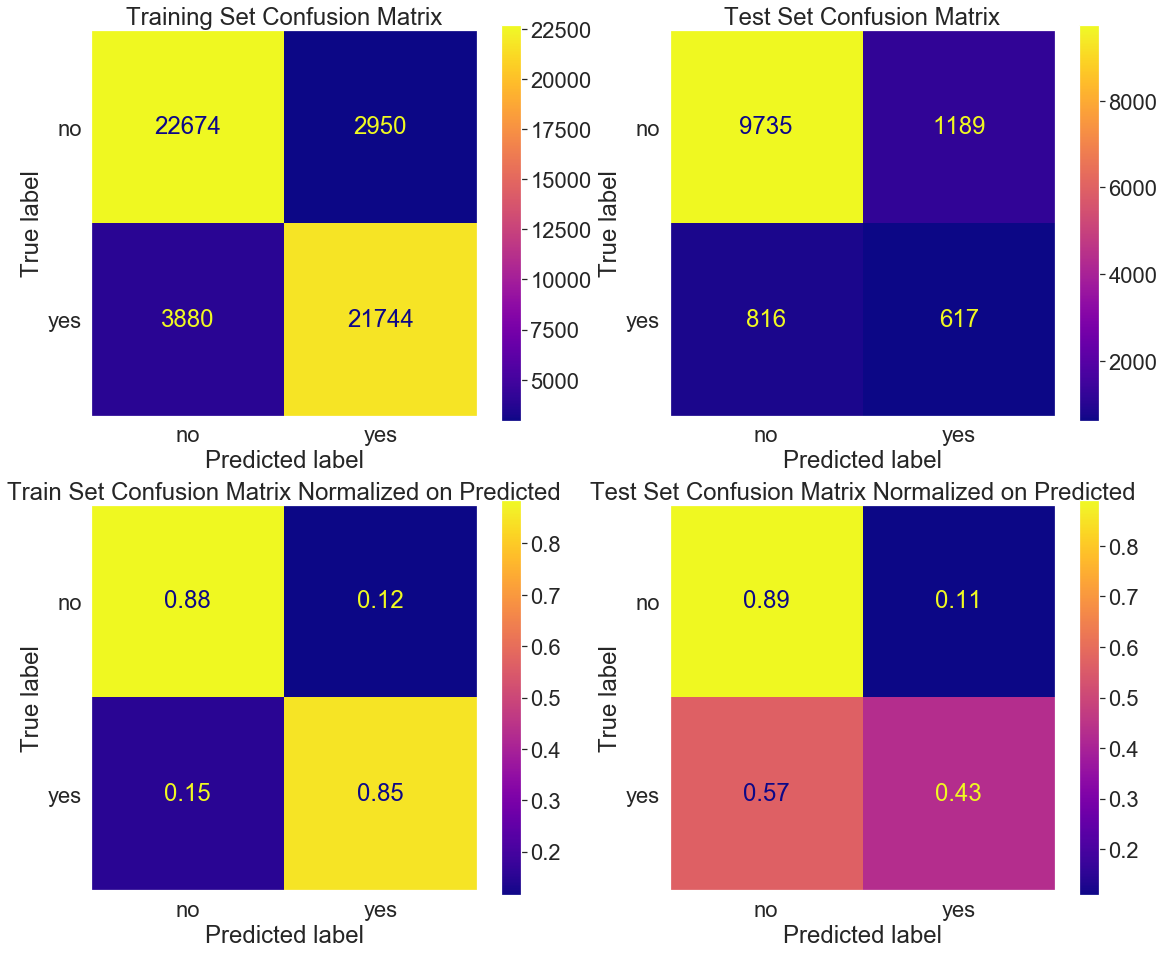

In [485]:
confusion_plot(pipe1, X_train_resampled, y_train_resampled, processed_X_test_30_imp, y_test_30)

Below we use Grid search for tuning the hypter parameters of the model.

In [279]:
#With Grid search
#Create new piepline that has no parameters
pipeGS = imPipeline([('mms', MinMaxScaler()),
                     ('sm', SMOTE(random_state=rand_state)),
                     ('logreg', LogisticRegression(random_state=rand_state))
                    ])


# Create the grid parameter
grid = [{'sm__k_neighbors' : np.array(range(1,21))},
        {'logreg__penalty' : ['l1', 'l2'],
         'logreg__C' : np.logspace(1, 19, 19),
         'logreg__solver' : ['liblinear']}
         ]


# Create the grid, with "pipe" as the estimator and f1 score as the scorer
f1_scorer = make_scorer(f1_score, pos_label="yes")
gridsearch = GridSearchCV(estimator=pipeGS, 
                          param_grid=grid, 
                          scoring=f1_scorer,
                          cv=5,
                          verbose=True,
                          n_jobs=-1)

# Fit using grid search to find best parameters for Logistic Regression model
GSCVlogreg = gridsearch.fit(X_train_resampled, y_train_resampled) #using SMOTE data

# Get Predictions
train_preds = gridsearch.predict(X_train_resampled)
test_preds = gridsearch.predict(processed_X_test_30_imp)

print('Classification Report for Train set')
print(classification_report(y_train_resampled, train_preds))
print('Classification Report for Test set')
print(classification_report(y_test_30, test_preds))

[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 290 out of 290 | elapsed:  9.3min finished


Classification Report for Train set
              precision    recall  f1-score   support

          no       0.85      0.88      0.87     25624
         yes       0.88      0.85      0.86     25624

    accuracy                           0.87     51248
   macro avg       0.87      0.87      0.87     51248
weighted avg       0.87      0.87      0.87     51248

Classification Report for Test set
              precision    recall  f1-score   support

          no       0.92      0.89      0.91     10924
         yes       0.34      0.43      0.38      1433

    accuracy                           0.84     12357
   macro avg       0.63      0.66      0.64     12357
weighted avg       0.86      0.84      0.85     12357



In [280]:
GSCVlogreg.best_estimator_.get_params() #These are the best parameters for the model

{'memory': None,
 'steps': [('mms', MinMaxScaler()),
  ('sm', SMOTE(random_state=24)),
  ('logreg',
   LogisticRegression(C=1000.0, random_state=24, solver='liblinear'))],
 'verbose': False,
 'mms': MinMaxScaler(),
 'sm': SMOTE(random_state=24),
 'logreg': LogisticRegression(C=1000.0, random_state=24, solver='liblinear'),
 'mms__copy': True,
 'mms__feature_range': (0, 1),
 'sm__k_neighbors': 5,
 'sm__n_jobs': None,
 'sm__random_state': 24,
 'sm__sampling_strategy': 'auto',
 'logreg__C': 1000.0,
 'logreg__class_weight': None,
 'logreg__dual': False,
 'logreg__fit_intercept': True,
 'logreg__intercept_scaling': 1,
 'logreg__l1_ratio': None,
 'logreg__max_iter': 100,
 'logreg__multi_class': 'auto',
 'logreg__n_jobs': None,
 'logreg__penalty': 'l2',
 'logreg__random_state': 24,
 'logreg__solver': 'liblinear',
 'logreg__tol': 0.0001,
 'logreg__verbose': 0,
 'logreg__warm_start': False}

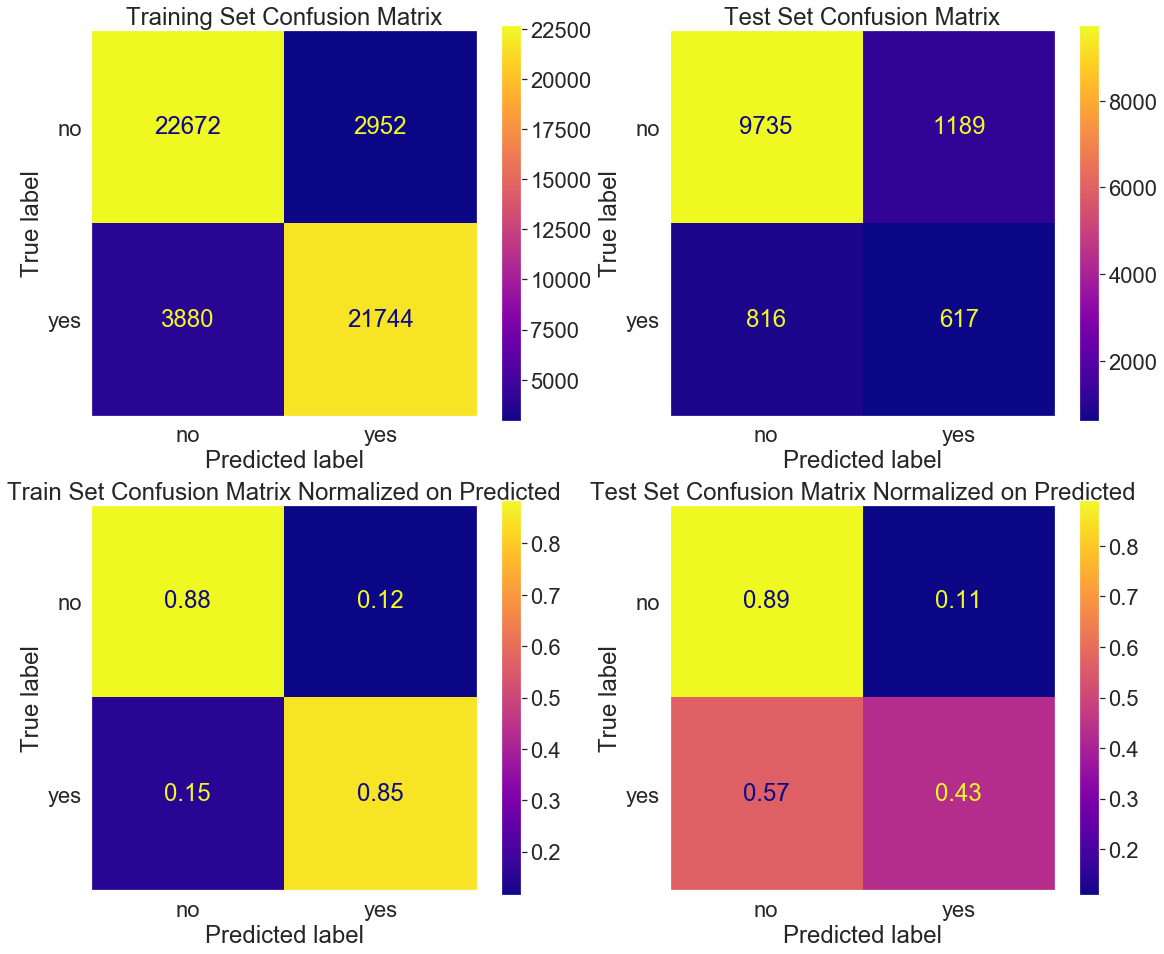

In [486]:
confusion_plot(GSCVlogreg, X_train_resampled, y_train_resampled, processed_X_test_30_imp, y_test_30)

ROC (probability) graphs allow us to determine optimal precision-recall tradeoff balances specific to the problem you are looking to solve, and AUC (degree or measure of separability) is an alternative comprehensive metric to confusion matrices that tells us the probabilty of a model being able to distiguish classes--in our case a 'yes' case from a 'no' case. 

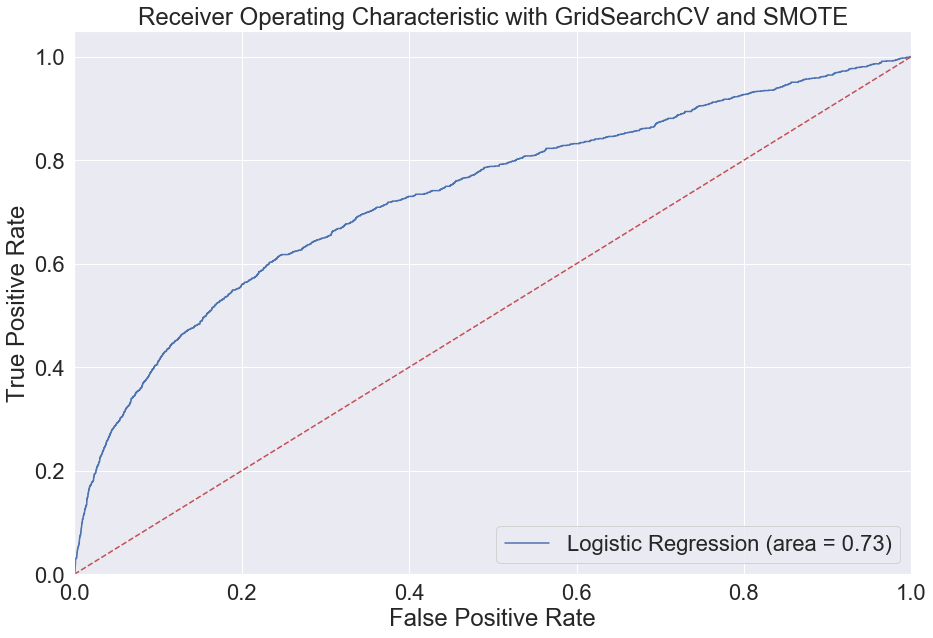

In [282]:
probs = GSCVlogreg.predict_proba(processed_X_test_30_imp)
preds = probs[:,1]
fpr_logreg, tpr_logreg, threshold_logreg = metrics.roc_curve(y_test_30, preds, pos_label='yes')
roc_auc_logreg = metrics.auc(fpr_logreg, tpr_logreg)

plt.figure(figsize=(15,10))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (area = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with GridSearchCV and SMOTE')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Finding the Best Model: K-Nearest Neighbor Model, Decision Tree, Random Forest Model, and Support Vector Matrix 
Now we will find the best performing model from different classifiers to use for our data.

In [283]:
# Create transfromer and sampler
mms = MinMaxScaler(copy=True, feature_range=(0, 1))
sm = SMOTE(n_jobs=None, random_state=rand_state, sampling_strategy='auto')

# Create the classifiers
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=rand_state)
RF = RandomForestClassifier(random_state=rand_state)
svc = svm.SVC(random_state=rand_state, probability=True)

# Create the grid parameter
grid_knn = [{'smote__k_neighbors' : [5, 10, 30]},
            {'kneighborsclassifier__n_neighbors': [11, 15, 20, 25],
             'kneighborsclassifier__weights': ['uniform', 'distance'],
             'kneighborsclassifier__p': [1, 3, 5]
            }]

grid_tree = [{'smote__k_neighbors' : [5, 10, 30]},
             {'decisiontreeclassifier__max_depth': [5, 25, 50],
              'decisiontreeclassifier__criterion': ['gini', 'entropy'],
              'decisiontreeclassifier__min_samples_split': [3, 5, 10],
              'decisiontreeclassifier__min_samples_leaf': [1, 3, 5],
              'decisiontreeclassifier__splitter': ['best', 'random']
            }]

grid_RF = [{'smote__k_neighbors' : [5, 10, 30]},
           {'randomforestclassifier__max_depth': [10, 15, 20, 30],
            'randomforestclassifier__criterion': ['gini', 'entropy'],
            'randomforestclassifier__n_estimators': [50, 100, 500],
            'randomforestclassifier__min_samples_split': [2, 3, 5, 10],
            'randomforestclassifier__min_samples_leaf': [5, 6, 8, 10]
           }]

grid_svc = [{'smote__k_neighbors' : [5, 10, 30]
            }]


# Set f1 score as the scorer
f1_scorer = make_scorer(f1_score, pos_label="yes")

##### K-Nearest Neighbor Model

An effective classification and regression algorithm that uses nearby points in order to generate a prediction; it implicitly assumes that the smaller the distance between two points, the more similar they are. Like a voting system.

In [284]:
pipe_knn = impipemaker(mms, sm, knn)

#Create the grid, with "pipe" as the estimator and
gridsearch = GridSearchCV(estimator=pipe_knn, param_grid=grid_knn, 
                          scoring=f1_scorer, cv=5, verbose=True, n_jobs=-1)

# Fit gridsearch
GSCVknn = gridsearch.fit(processed_X_train_70_imp, y_train_70)

# Get Predictions
train_preds = gridsearch.predict(processed_X_train_70_imp)
test_preds = gridsearch.predict(processed_X_test_30_imp)

print('Classification Report for Train set')
print(classification_report(y_train_70, train_preds))
print('Classification Report for Test set')
print(classification_report(y_test_30, test_preds))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 15.9min finished


Classification Report for Train set
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     25624
         yes       1.00      0.96      0.98      3207

    accuracy                           1.00     28831
   macro avg       1.00      0.98      0.99     28831
weighted avg       1.00      1.00      1.00     28831

Classification Report for Test set
              precision    recall  f1-score   support

          no       0.93      0.85      0.89     10924
         yes       0.33      0.54      0.41      1433

    accuracy                           0.82     12357
   macro avg       0.63      0.70      0.65     12357
weighted avg       0.86      0.82      0.84     12357



In [285]:
GSCVknn.best_estimator_.get_params() #These are the best parameters for the model

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler()),
  ('smote', SMOTE(random_state=24)),
  ('kneighborsclassifier',
   KNeighborsClassifier(n_neighbors=25, p=1, weights='distance'))],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(),
 'smote': SMOTE(random_state=24),
 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=25, p=1, weights='distance'),
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'smote__k_neighbors': 5,
 'smote__n_jobs': None,
 'smote__random_state': 24,
 'smote__sampling_strategy': 'auto',
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 25,
 'kneighborsclassifier__p': 1,
 'kneighborsclassifier__weights': 'distance'}

In [286]:
#This is a simple Confusion Matrix that just shows the test set.
cm = confusion_matrix(y_test_30, test_preds)
sns.heatmap(cm, annot=True, fmt= 'g', yticklabels=['no', 'yes'], xticklabels=['no', 'yes'])
plt.title('Test Set Confusion Matrix')
plt.show()

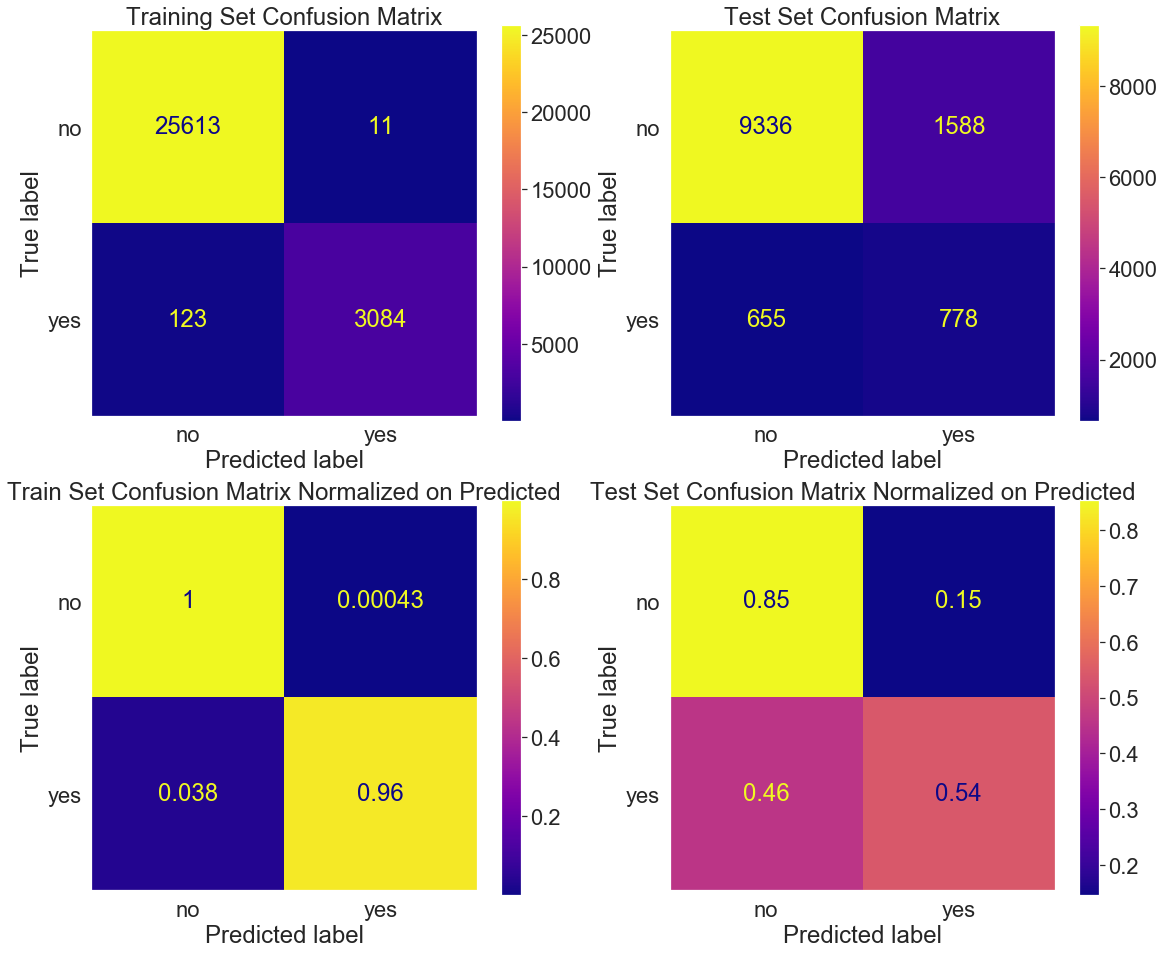

In [487]:
confusion_plot(GSCVknn.best_estimator_, processed_X_train_70_imp, y_train_70, processed_X_test_30_imp, y_test_30)

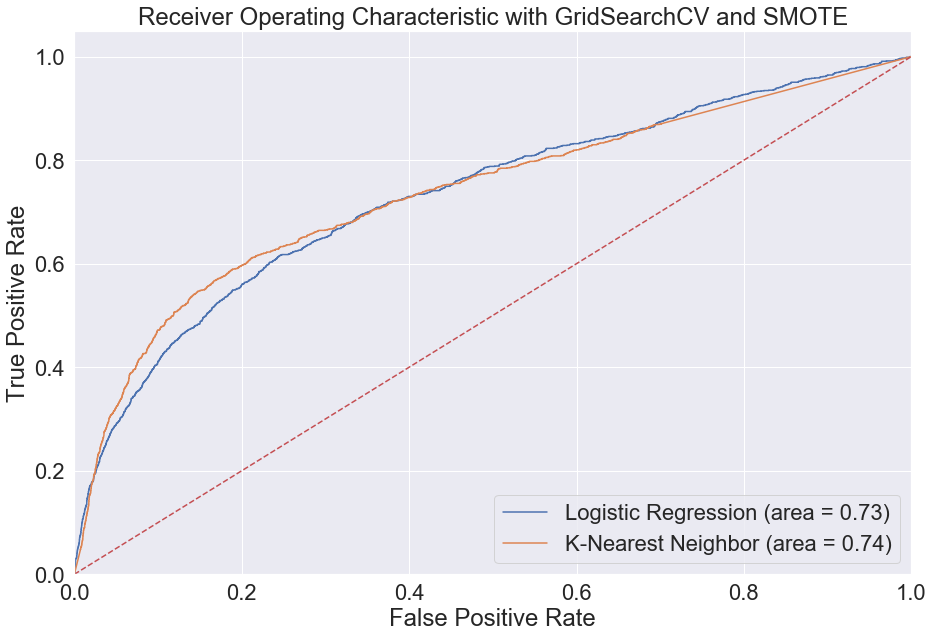

In [288]:
probs = GSCVknn.best_estimator_.predict_proba(processed_X_test_30_imp)
preds = probs[:,1]
fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(y_test_30, preds, pos_label='yes')
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)

plt.figure(figsize=(15,10))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (area = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbor (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with GridSearchCV and SMOTE')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##### Decision Tree Model

A decision Tree model classifies (or estimates continuous values) by partitioning the sample space as efficiently as possible into sets with similar data points until you get to (or close to) a homogenous set and can reasonably predict the value for new data points.

In [289]:
pipe_tree = impipemaker(mms, sm, tree)

#Create the grid, with "pipe" as the estimator and
gridsearch = GridSearchCV(estimator=pipe_tree, param_grid=grid_tree, 
                          scoring=f1_scorer, cv=5, verbose=True, n_jobs=-1)

# Fit gridsearch
GSCVtree = gridsearch.fit(processed_X_train_70_imp, y_train_70)

# Get Predictions
train_preds = gridsearch.predict(processed_X_train_70_imp)
test_preds = gridsearch.predict(processed_X_test_30_imp)

print('Classification Report for Train set')
print(classification_report(y_train_70, train_preds))
print('Classification Report for Test set')
print(classification_report(y_test_30, test_preds))

Fitting 5 folds for each of 111 candidates, totalling 555 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 555 out of 555 | elapsed:  1.1min finished


Classification Report for Train set
              precision    recall  f1-score   support

          no       0.94      0.93      0.93     25624
         yes       0.47      0.53      0.50      3207

    accuracy                           0.88     28831
   macro avg       0.71      0.73      0.72     28831
weighted avg       0.89      0.88      0.88     28831

Classification Report for Test set
              precision    recall  f1-score   support

          no       0.94      0.93      0.93     10924
         yes       0.48      0.53      0.50      1433

    accuracy                           0.88     12357
   macro avg       0.71      0.73      0.72     12357
weighted avg       0.88      0.88      0.88     12357



In [290]:
GSCVtree.best_estimator_.get_params() #These are the best parameters for the model

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler()),
  ('smote', SMOTE(random_state=24)),
  ('decisiontreeclassifier',
   DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=3,
                          random_state=24))],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(),
 'smote': SMOTE(random_state=24),
 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=3,
                        random_state=24),
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'smote__k_neighbors': 5,
 'smote__n_jobs': None,
 'smote__random_state': 24,
 'smote__sampling_strategy': 'auto',
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 '

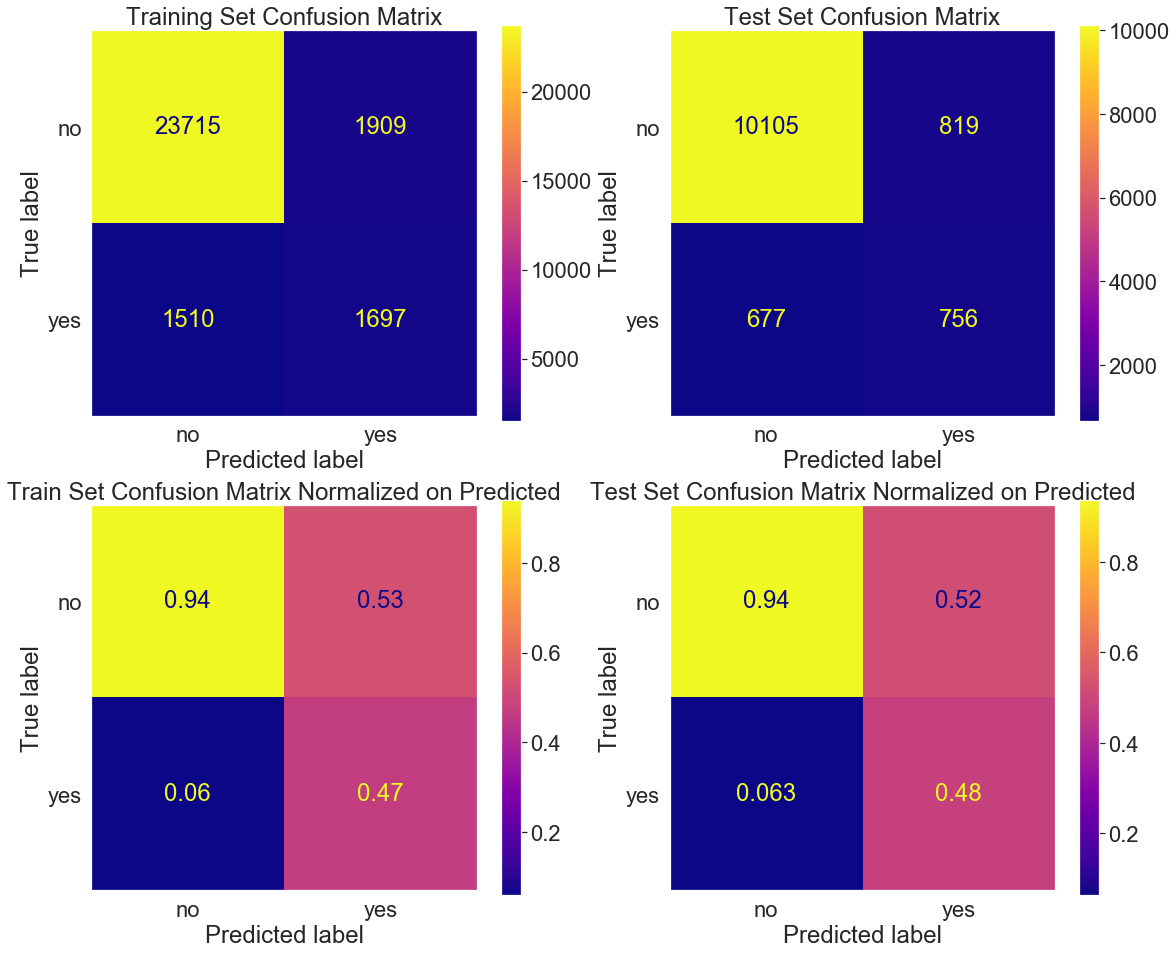

In [291]:
confusion_plot(GSCVtree.best_estimator_, processed_X_train_70_imp, y_train_70, processed_X_test_30_imp, y_test_30)

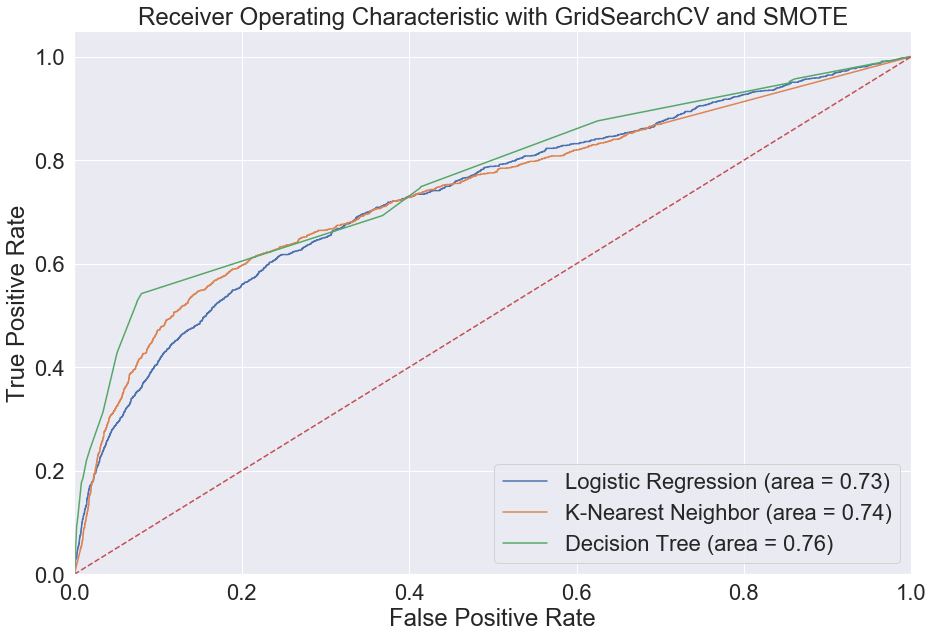

In [292]:
probs = GSCVtree.best_estimator_.predict_proba(processed_X_test_30_imp)
preds = probs[:,1]
fpr_tree, tpr_tree, threshold_tree = metrics.roc_curve(y_test_30, preds, pos_label='yes')
roc_auc_tree = metrics.auc(fpr_tree, tpr_tree)

plt.figure(figsize=(15,10))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (area = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbor (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (area = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with GridSearchCV and SMOTE')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##### Random Forest Model

The random forest model is a collection of uncorrelated decision trees that vote. That is, each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

In [293]:
pipe_RF = impipemaker(mms, sm, RF)

#Create the grid, with "pipe" as the estimator and
gridsearch = GridSearchCV(estimator=pipe_RF, param_grid=grid_RF, 
                          scoring=f1_scorer, cv=5, verbose=True, n_jobs=-1)

# Fit gridsearch
GSCV_RF = gridsearch.fit(processed_X_train_70_imp, y_train_70)

# Get Predictions
train_preds = gridsearch.predict(processed_X_train_70_imp)
test_preds = gridsearch.predict(processed_X_test_30_imp)

print('Classification Report for Train set')
print(classification_report(y_train_70, train_preds))
print('Classification Report for Test set')
print(classification_report(y_test_30, test_preds))

Fitting 5 folds for each of 387 candidates, totalling 1935 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 1935 out of 1935 | elapsed: 43.3min finished


Classification Report for Train set
              precision    recall  f1-score   support

          no       0.95      0.93      0.94     25624
         yes       0.50      0.59      0.54      3207

    accuracy                           0.89     28831
   macro avg       0.72      0.76      0.74     28831
weighted avg       0.90      0.89      0.89     28831

Classification Report for Test set
              precision    recall  f1-score   support

          no       0.94      0.92      0.93     10924
         yes       0.47      0.56      0.51      1433

    accuracy                           0.88     12357
   macro avg       0.71      0.74      0.72     12357
weighted avg       0.89      0.88      0.88     12357



In [294]:
GSCV_RF.best_estimator_.get_params() #These are the best parameters for the model

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler()),
  ('smote', SMOTE(random_state=24)),
  ('randomforestclassifier',
   RandomForestClassifier(max_depth=15, min_samples_leaf=8, n_estimators=500,
                          random_state=24))],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(),
 'smote': SMOTE(random_state=24),
 'randomforestclassifier': RandomForestClassifier(max_depth=15, min_samples_leaf=8, n_estimators=500,
                        random_state=24),
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'smote__k_neighbors': 5,
 'smote__n_jobs': None,
 'smote__random_state': 24,
 'smote__sampling_strategy': 'auto',
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforest

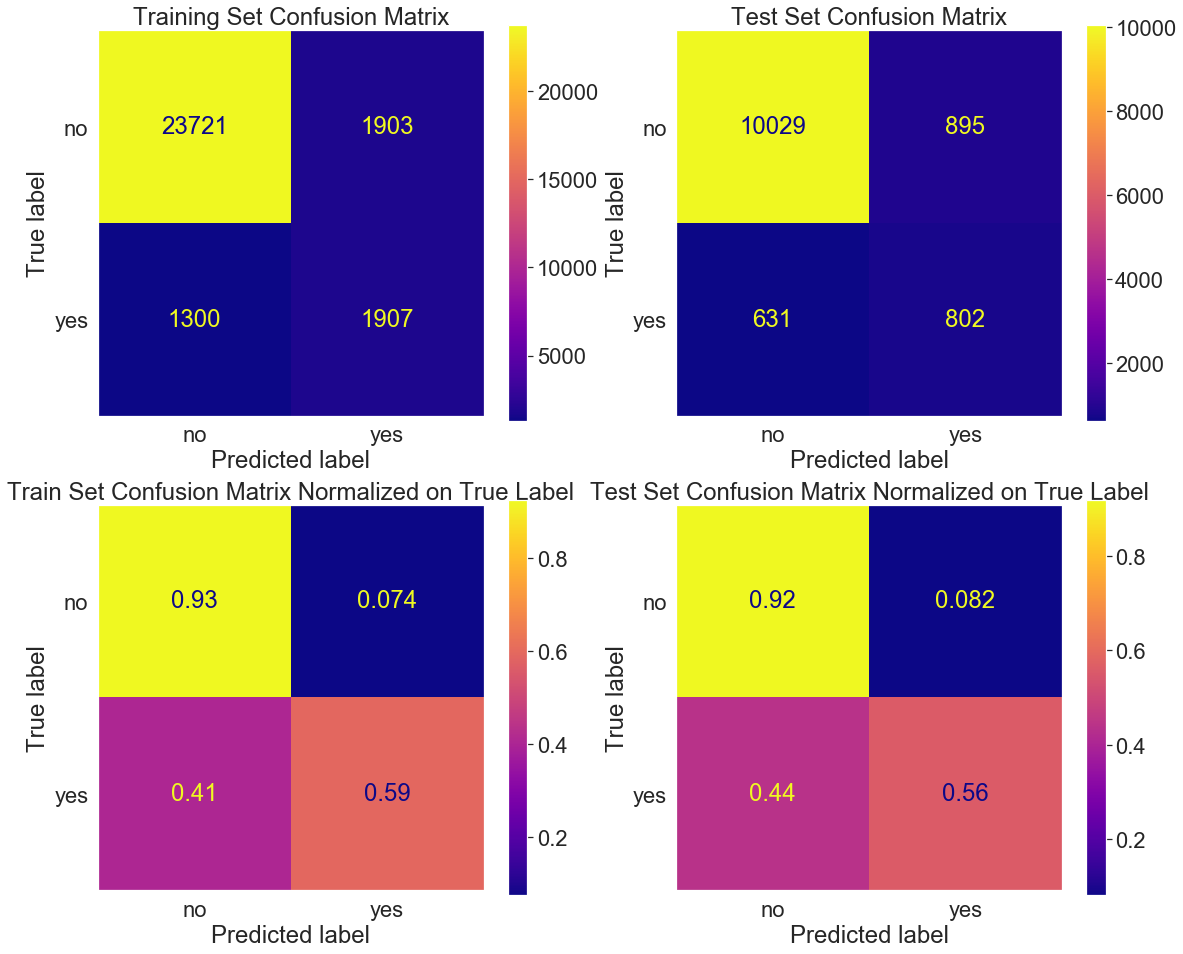

In [511]:
confusion_plot(GSCV_RF.best_estimator_, processed_X_train_70_imp, y_train_70, processed_X_test_30_imp, y_test_30)

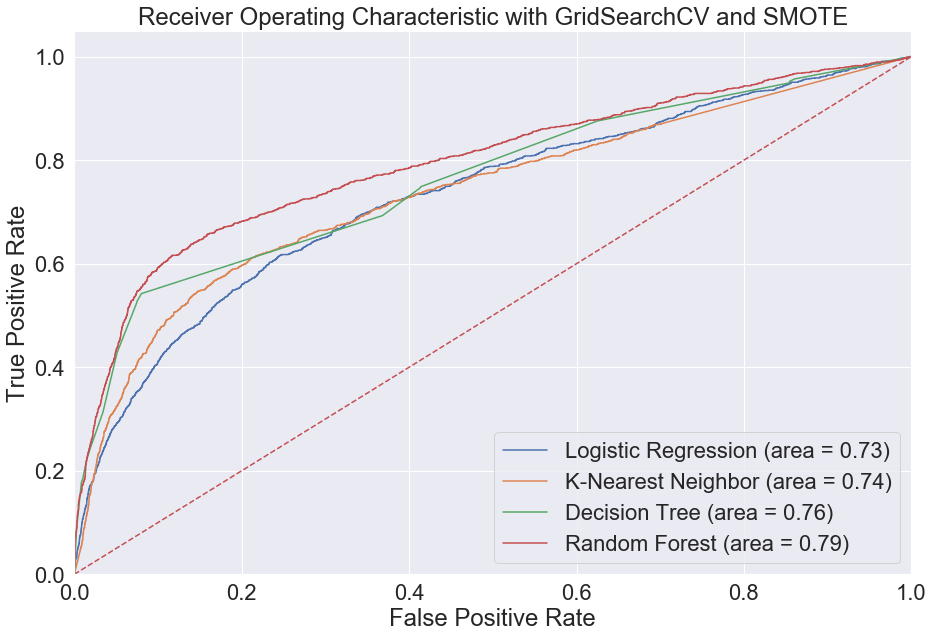

In [296]:
probs = GSCV_RF.best_estimator_.predict_proba(processed_X_test_30_imp)
preds = probs[:,1]
fpr_RF, tpr_RF, threshold_RF = metrics.roc_curve(y_test_30, preds, pos_label='yes')
roc_auc_RF = metrics.auc(fpr_RF, tpr_RF)

plt.figure(figsize=(15,10))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (area = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbor (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (area = %0.2f)' % roc_auc_tree)
plt.plot(fpr_RF, tpr_RF, label='Random Forest (area = %0.2f)' % roc_auc_RF)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with GridSearchCV and SMOTE')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##### Support Vector Model
Thi is a type of classifier which modifies the loss function for optimization to not only take into account overall accuracy metrics of the resulting predictions, but also to maximize the decision boundary between the data points. In essence, this further helps tune the classifier as a good balance between underfitting and overfitting.

In [297]:
pipe_svc = impipemaker(mms, sm, svc)

#Create the grid, with "pipe" as the estimator and
gridsearch = GridSearchCV(estimator=pipe_svc, param_grid=grid_svc, 
                          scoring=f1_scorer, cv=5, verbose=True, n_jobs=-1)

# Fit gridsearch
GSCVsvc = gridsearch.fit(processed_X_train_70_imp, y_train_70)

# Get Predictions
train_preds = gridsearch.predict(processed_X_train_70_imp)
test_preds = gridsearch.predict(processed_X_test_30_imp)

print('Classification Report for Train set')
print(classification_report(y_train_70, train_preds))
print('Classification Report for Test set')
print(classification_report(y_test_30, test_preds))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 24.3min finished


Classification Report for Train set
              precision    recall  f1-score   support

          no       0.94      0.94      0.94     25624
         yes       0.54      0.53      0.54      3207

    accuracy                           0.90     28831
   macro avg       0.74      0.74      0.74     28831
weighted avg       0.90      0.90      0.90     28831

Classification Report for Test set
              precision    recall  f1-score   support

          no       0.93      0.94      0.93     10924
         yes       0.48      0.44      0.46      1433

    accuracy                           0.88     12357
   macro avg       0.71      0.69      0.70     12357
weighted avg       0.88      0.88      0.88     12357



In [298]:
GSCVsvc.best_estimator_.get_params() #These are the best parameters for the model

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler()),
  ('smote', SMOTE(k_neighbors=10, random_state=24)),
  ('svc', SVC(probability=True, random_state=24))],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(),
 'smote': SMOTE(k_neighbors=10, random_state=24),
 'svc': SVC(probability=True, random_state=24),
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'smote__k_neighbors': 10,
 'smote__n_jobs': None,
 'smote__random_state': 24,
 'smote__sampling_strategy': 'auto',
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': True,
 'svc__random_state': 24,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

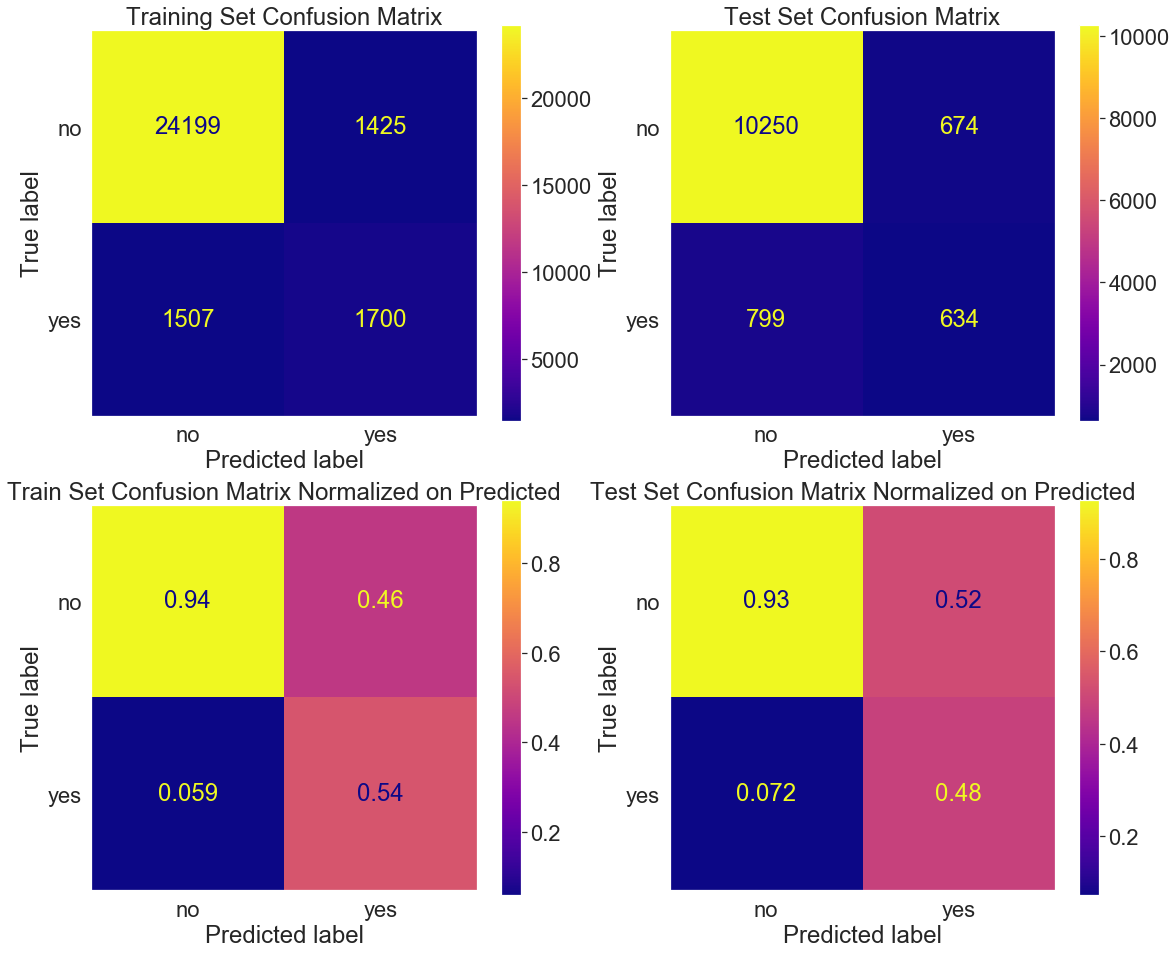

In [299]:
confusion_plot(GSCVsvc.best_estimator_, processed_X_train_70_imp, y_train_70, processed_X_test_30_imp, y_test_30)

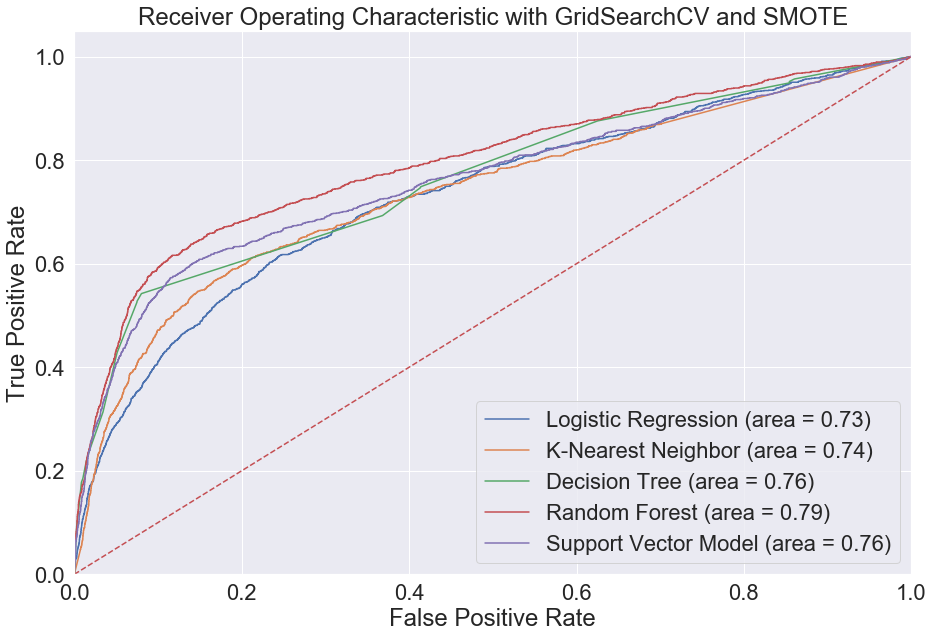

In [300]:
probs = GSCVsvc.best_estimator_.predict_proba(processed_X_test_30_imp)
preds = probs[:,1]
fpr_svc, tpr_svc, threshold_svc = metrics.roc_curve(y_test_30, preds, pos_label='yes')
roc_auc_svc = metrics.auc(fpr_svc, tpr_svc)

plt.figure(figsize=(15,10))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (area = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbor (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (area = %0.2f)' % roc_auc_tree)
plt.plot(fpr_RF, tpr_RF, label='Random Forest (area = %0.2f)' % roc_auc_RF)
plt.plot(fpr_svc, tpr_svc, label='Support Vector Model (area = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with GridSearchCV and SMOTE')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Features of Top Model
From the above, we see that the best model to focus on is the random forest one since it resulted in a AUC of 0.79 in our ROC Curve Graph and has the highest F1 and recall score out of all the models. We have talked about F1 and recall score, but we have not discused what AUC means for our model. Generally, the higher the AUC, better the model is at distinguishing between clients that will subscribe and will not. So an AUC of 0.79 means that there is 79% chance that the model will be able to distinguish between 'yes' class and 'no' class. Below, we look at the features that are most important to our model to classify if a cient will subscribe:

In [341]:
# Here we extract the feature importances
feature_importances = GSCV_RF.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
feature_importances

array([0.02398685, 0.09675783, 0.02758721, 0.08343495, 0.04133857,
       0.04532282, 0.15523752, 0.13125407, 0.01501413, 0.00261356,
       0.00187417, 0.00455488, 0.00499704, 0.00222855, 0.00708232,
       0.00291508, 0.0053886 , 0.00127544, 0.00821318, 0.00696195,
       0.00339845, 0.00675335, 0.0054805 , 0.00388381, 0.00694349,
       0.00299168, 0.03726209, 0.02649512, 0.01843151, 0.04339863,
       0.00212421, 0.00020024, 0.00344991, 0.00306856, 0.00645692,
       0.02328298, 0.00325144, 0.00781332, 0.00167209, 0.01541773,
       0.01421749, 0.01243272, 0.0175264 , 0.02531418, 0.04069448])

In [488]:
# Here we convert our feature names into an array
feature_labels = np.array(feature_names)
feature_labels

array(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_professional.course',
       'education_university.degree', 'education_unknown',
       'default_unknown', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype=object)

In [340]:
#prints all the predictors used for the model
for predictor in feature_labels:
    print(predictor)

age
campaign
previous
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
job_blue-collar
job_entrepreneur
job_housemaid
job_management
job_retired
job_self-employed
job_services
job_student
job_technician
job_unemployed
marital_married
marital_single
education_basic.6y
education_basic.9y
education_high.school
education_professional.course
education_university.degree
education_unknown
default_unknown
housing_yes
loan_yes
contact_telephone
month_aug
month_dec
month_jul
month_jun
month_mar
month_may
month_nov
month_oct
month_sep
day_of_week_mon
day_of_week_thu
day_of_week_tue
day_of_week_wed
poutcome_nonexistent
poutcome_success


In [362]:
# Here we combine the feature names and importances of the model into a dataframe
importanceDict = {'Feature':feature_labels, 'Importance': feature_importances}
importance_df = pd.DataFrame(importanceDict)
importance_df.head()

Feature  Importance
0             age    0.023987
1        campaign    0.096758
2        previous    0.027587
3    emp.var.rate    0.083435
4  cons.price.idx    0.041339

In [366]:
# Here we sort the importances
importance_df.sort_values(by='Importance', ascending=False)#shows which features were highly impactful

Feature  Importance
6                       euribor3m    0.155238
7                     nr.employed    0.131254
1                        campaign    0.096758
3                    emp.var.rate    0.083435
5                   cons.conf.idx    0.045323
29              contact_telephone    0.043399
4                  cons.price.idx    0.041339
44               poutcome_success    0.040694
26                default_unknown    0.037262
2                        previous    0.027587
27                    housing_yes    0.026495
43           poutcome_nonexistent    0.025314
0                             age    0.023987
35                      month_may    0.023283
28                       loan_yes    0.018432
42                day_of_week_wed    0.017526
39                day_of_week_mon    0.015418
8                 job_blue-collar    0.015014
40                day_of_week_thu    0.014217
41                day_of_week_tue    0.012433
18                marital_married    0.008213
37                      month_oct    0.007813
14                   job_services    0.007082
19                 marital_single    0.006962
24    education_university.degree    0.006943
21             education_basic.9y    0.006753
34                      month_mar    0.006457
22          education_high.school    0.005480
16                 job_technician    0.005389
12                    job_retired    0.004997
11                 job_management    0.004555
23  education_professional.course    0.003884
32                      month_jul    0.003450
20             education_basic.6y    0.003398
36                      month_nov    0.003251
33                      month_jun    0.003069
25              education_unknown    0.002992
15                    job_student    0.002915
9                job_entrepreneur    0.002614
13              job_self-employed    0.002229
30                      month_aug    0.002124
10                  job_housemaid    0.001874
38                      month_sep    0.001672
17                 job_unemployed    0.001275
31                      month_dec    0.000200

In [365]:
importance_df.sort_values(by='Importance', ascending=False).head(10) #Shows top ten features

Feature  Importance
6           euribor3m    0.155238
7         nr.employed    0.131254
1            campaign    0.096758
3        emp.var.rate    0.083435
5       cons.conf.idx    0.045323
29  contact_telephone    0.043399
4      cons.price.idx    0.041339
44   poutcome_success    0.040694
26    default_unknown    0.037262
2            previous    0.027587

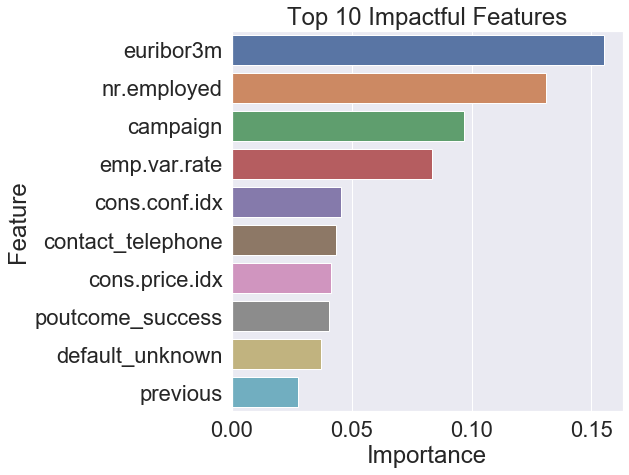

In [382]:
#Here we plot the top 10 features
plt.figure(figsize=(7,7))
sns.barplot(y='Feature', x='Importance', data=importance_df.sort_values(by='Importance', ascending=False).head(10), orient='h')
plt.title('Top 10 Impactful Features')
plt.show()

## Model Visualization and Conclusion
Finally, we will plot our model in action for a random sample of test data.

In [384]:
y_pred = GSCV_RF.best_estimator_.predict(processed_X_test_30_imp) #get prediction y values
y_pred

array(['yes', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

With the code found from Nagesh [Resource 3](#Resources:), we are able to visualize our actual vs prediction values:

In [385]:
# Here we put actual and predicted results next to each other in a dataframe
df_model = pd.DataFrame({'Actual': y_test_30, 'Predicted': y_pred})
df_model

Actual Predicted
39914    yes       yes
24892     no        no
27073     no        no
37574     no       yes
39211    yes       yes
...      ...       ...
8658      no        no
40550     no       yes
17928     no        no
4157      no        no
3010      no        no

[12357 rows x 2 columns]

In [495]:
# Convert those 'yes's and 'no's to visual numbers
df_final = df_model.where(cond=df_model=='yes', other=0.05).where(cond=df_model!='yes', other=1)
df_final

Actual Predicted
39914      1         1
24892   0.05      0.05
27073   0.05      0.05
37574   0.05         1
39211      1         1
...      ...       ...
8658    0.05      0.05
40550   0.05         1
17928   0.05      0.05
4157    0.05      0.05
3010    0.05      0.05

[12357 rows x 2 columns]

<Figure size 1080x1080 with 0 Axes>

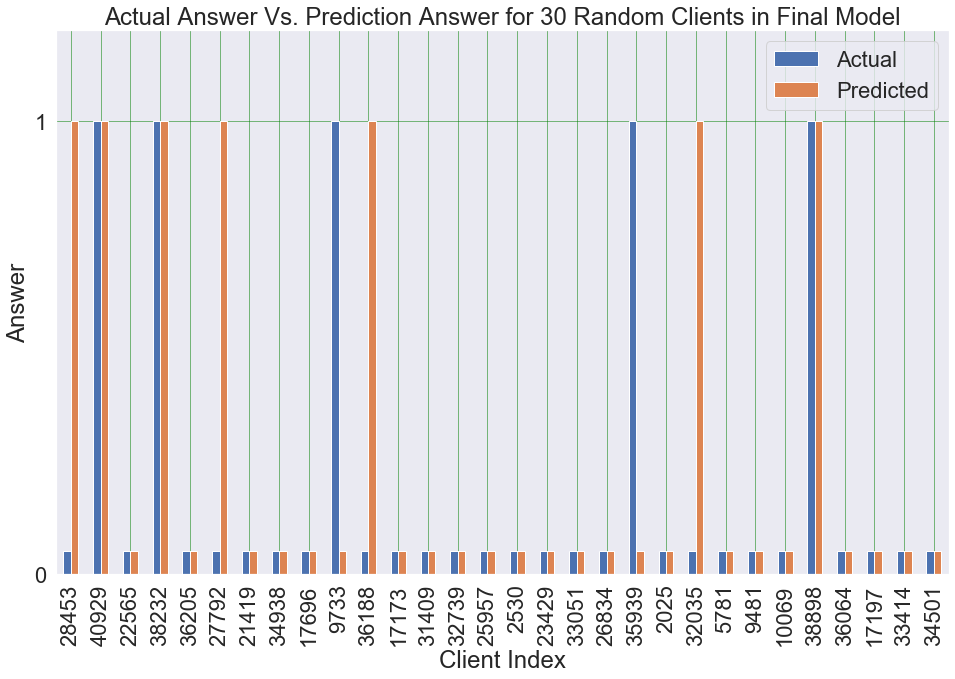

In [503]:
df1 = df_final.sample(n=30, random_state=rand_state)
plt.figure(figsize=(15,15))
df1.plot(kind='bar',figsize=(16,10), ylim=[0, 1.2], yticks= [0, 1])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual Answer Vs. Prediction Answer for 30 Random Clients in Final Model')
plt.ylabel('Answer')
plt.xlabel('Client Index')
plt.show()

In [477]:
# Get Prediction
test_preds = GSCV_RF.best_estimator_.predict(processed_X_test_30_imp)

print('Classification Report for Test set')
print(classification_report(y_test_30, test_preds))

Classification Report for Test set
              precision    recall  f1-score   support

          no       0.94      0.92      0.93     10924
         yes       0.47      0.56      0.51      1433

    accuracy                           0.88     12357
   macro avg       0.71      0.74      0.72     12357
weighted avg       0.89      0.88      0.88     12357



In [513]:
# Get parameters from final model
GSCV_RF.best_estimator_.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('smote', SMOTE(random_state=24)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=8,
                                        n_estimators=500, random_state=24))])>

In [515]:
# Create final model pipe
pipeFinal = imPipeline(steps=[('minmaxscaler', MinMaxScaler()),
                              ('smote', SMOTE(random_state=24)),
                              ('randomforestclassifier', RandomForestClassifier(max_depth=15, min_samples_leaf=8
                                                                                , n_estimators=500, random_state=24))
                           ])

### Conclusion
From the above, we see that the best model is the random forest model because of its highest f1-score of 0.51 for 'yes', recall score of 0.56 for 'yes', and AUC of 0.79. From this model, we can conclude that our top features are the following: 

euribor3m
nr.employed
campaign
emp.var.rate
cons.conf.idx
contact_telephone
cons.price.idx
poutcome_success
default_unknown
previous

With this model and our total analysis, we can produce three business recommendations:

1. **Conduct more calls before a campaign and during**
2. **Focus on students who have an education level at 'basic.4y', 'basic.9y', 'high.school', 'professional.course', and 'basic.6y' and an age between 20-30 years old**
3. **Conduct calls in the Fall, Winter, and March**

## Other Resources:
* https://towardsdatascience.com/understanding-random-forest-58381e0602d2
* https://www.semanticscholar.org/paper/Using-data-mining-for-bank-direct-marketing%3A-an-of-Moro-Laureano/a175aeb08734fd669beaffd3d185a424a6f03b84
* https://pdfs.semanticscholar.org/1999/417377ec21ecf7f7f55af62975065f785fb2.pdf
